# Microsoft Malware detection



<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>

1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>


<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

#**Installing Kaggle and getting the files**

In [ ]:
!pip install kaggle
from google.colab import files
from datetime import datetime

In [ ]:
from google.colab import files
files = files.upload()


Saving trainLabels.csv to trainLabels.csv


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c 'malware-classification'

100% 35.3G/35.3G [04:11<00:00, 191MB/s]
100% 35.3G/35.3G [04:11<00:00, 151MB/s]


In [ ]:
!unzip malware-classification.zip

Archive:  malware-classification.zip
  inflating: dataSample.7z           
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


**Extracting Byte Files**

In [ ]:
!7z e train.7z -o/content/Bytefiles *.bytes -r


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 18810691091 bytes (18 GiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 18810691091
Headers Size = 339764
Method = LZMA:24
Solid = +
Blocks = 94

  0%      0% . train/kQEbWRHa04gOYDqM1NJ6.asm                                       0% 1 . train/KqEgONxfHdP5lLaBIGQk.asm                                         0% 2 . train/kqiOdVbRQlB2s907GLMv.asm                                         0% 5 . train/kQsiVxDbAXt23wRWal57.asm

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Removal of address in front of every line in a byte file

In [ ]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('Bytefiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file1=file.split('.')[0]
        text_file = open('Bytefiles/'+file1+".txt", 'w+')
        with open('Bytefiles/'+file,"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]  #['56', '8D', '44', '24', '08', '50', '8B', 'F1', 'E8', '1C', '1B', '00', '00', 'C7', '06', '08']
                b=' '.join(a)  #56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('Bytefiles/'+file)
        text_file.close()



```
# This is formatted as code
```

#Defining the function to get unigrams and bigrams 

In [ ]:
from tqdm import tqdm
from nltk.util import ngrams

def calculate_uni_bigrams(file):
  list_with_unigrams_bigrams=[]
  with open('Bytefiles/'+file,"r") as byte_file:

    list_with_all_line=[]

    for lines in byte_file:
      line=lines.rstrip().split(" ")  #['56', '8D', '44', '24', '08', '50', '8B', 'F1', 'E8', '1C', '1B', '00', '00', 'C7', '06', '08']
      list_with_all_line.extend(line) #list which contains each and every word in the file

      #unigrams
      for hex_code in line:
        list_with_unigrams_bigrams.append(hex_code.lower()) #Converting every hex code to small alphabet letters
      
    list_with_unigrams_bigrams=list(set(list_with_unigrams_bigrams)) # Getttin the unique unigram words in the list

    #Bigrams
    Bigram = [' '.join(i) for i in list(ngrams(list_with_all_line,2))]  # getting 2 words sequentially from the list 
    for hex_code in Bigram:
      list_with_unigrams_bigrams.append(hex_code.lower()) #Converting every hex code to small alphabet letters
    
    list_with_unigrams_bigrams=list(set(list_with_unigrams_bigrams)) # Getttin the unique bigram words in the list

  return list_with_unigrams_bigrams

In [ ]:
byte_files = os.listdir('Bytefiles')
print(byte_files)

['c1X3j2Lat7Eo4I8GWFD5.txt', '4m1Gsx5JvMFgATY7LOz0.txt', '2xlhAE5LO8RFfczB6ep3.txt', '5y4KkCXDrLHbgTwSfdqm.txt', 'Fznamk4GOtlcB91EK0qD.txt', '9XZWSgoYzHci4Q2INbdr.txt', 'cCtXa0KsdmPuFIgfBN9M.txt', 'IETGJWiuU7As6SPewtOk.txt', 'Jt9wHfF0M8PNQKSO4mZy.txt', 'kbSHVK3rjdaW7wlL0MF1.txt', 'iqmZ5yUfJnBVhYGjLXxz.txt', 'iTEz2rB6XdsZIG8g07lK.txt', 'cAK1HjqnlsSFpP0Ivw7x.txt', 'anbzmJ7dC1EM3B9QcPDv.txt', 'JQHf0c52agNmervIpCkT.txt', 'HPONF4CalK7MzhrRtewg.txt', 'hHMbnm8juIizgTR7LAWC.txt', 'CARP1OEijlQVXYxZa0tH.txt', 'JoU0zHnMXLS3pRCxbFaY.txt', '418XPavxNpslKmeoTUwJ.txt', '3SdTQDpt7X4C0NkgamMA.txt', 'ipjWCvhBI3UO6sr1gGZE.txt', 'E5wAy6O7Dp3IrsukthZS.txt', '4nEqldNaweD7j806tbhk.txt', 'efKbsRXGgy15NPHW8tI4.txt', '0rlkeuBLpWm15TyFRHUJ.txt', 'ftdnVB0K7JzRA8FUwIjD.txt', 'gXHqfj9eSQTA74aE1x3G.txt', 'dQYLG7IkjvbDJENTMWAa.txt', '3sKkO0hxBNy6MILz8gia.txt', 'CynZDa3JPgzdGSY6AOmX.txt', 'gwXl3eWLKuyCDncbaMk2.txt', 'GnHh2cK7j9iZq01bBplw.txt', 'bWHnGtLmyoK0de1vJB3S.txt', 'C2spzDaAf6rwHJ4tBgFv.txt', 'JmRCrDBGEzfgISdvNs

In [ ]:
print(len(byte_files))

10868


In [ ]:
Features_uni_bigrams=[]
byte_files = os.listdir('Bytefiles')

for file in tqdm(byte_files):
    Features_uni_bigrams.extend(calculate_uni_bigrams(file))
    Features_uni_bigrams = list(set(Features_uni_bigrams))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle as pkl
with open('Features_uni_bigrams.pkl','wb') as f:          # dumping everything in a pickle file 
    pkl.dump(Features_uni_bigrams,f)

In [ ]:
!cp Features_uni_bigrams.pkl /content/drive/MyDrive # Copying it to drive

<h1>Now importing pickle file (Containing all features)</h1>

In [ ]:
#https://www.journaldev.com/15638/python-pickle-example#:~:text=Python%20Pickle%20load%20To%20retrieve%20pickled%20data%2C%20the,by%20opening%20the%20file%20in%20read-binary%20%28rb%29%20mode.?msclkid=67e79975cb2311eca2aa585aaafb3aad
import io
import pickle as pkl
f = open('/content/drive/MyDrive/mmd-files/Features_uni_bigrams.pkl', 'rb')
Features_uni_bigrams = pkl.load(f)

In [ ]:
print(len(Features_uni_bigrams))

66306


#Creating sparse feature vectors

In [ ]:
from tqdm import tqdm
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
Byte_files = os.listdir('Bytefiles')
import scipy.sparse

vector = CountVectorizer(lowercase=False, ngram_range=(2,2), vocabulary = Features_uni_bigrams)
matrix = csr_matrix((len(Byte_files),len(Features_uni_bigrams)))

    
for i, file in tqdm(enumerate(Byte_files)):
    fname = open('Bytefiles/'+file)
    matrix[i,:]+=csr_matrix(vector.fit_transform([fname.read().replace('\n',' ').lower()]))
    fname.close()
    
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.save_npz.html

scipy.sparse.save_npz("bigram_matrix.npz",matrix)

10868it [17:01:30,  5.64s/it]


In [ ]:
!cp bigram_matrix.npz /content/drive/MyDrive/mmd-files-new # Copying it to drive

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import scipy.sparse

In [ ]:
bigram_matrix = scipy.sparse.load_npz("/content/drive/MyDrive/mmd-files-new/bigram_matrix.npz")

In [ ]:
from sklearn.preprocessing import normalize
bigram_matrix_normalized = normalize(bigram_matrix,axis=0)

In [ ]:
print(bigram_matrix_normalized[50].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
bigram_matrix_normalized.shape

(10868, 66306)

In [ ]:
print((Features_uni_bigrams))

['5e 60', '9b 6c', '37 65', '21 27', 'ae 7b', '65 8f', 'd6 5b', '0a 98', '5c 85', 'de 69', '45 5b', 'e2 e3', '51 f3', 'fc d1', '94 75', 'd7 7c', '45 ac', '1b ba', '4d 5b', '87 07', '33 ae', 'c5 76', '1c c0', '4d 04', '5c 0d', '07 3f', 'e7 cb', 'a1 18', 'af c6', 'fa 97', 'd2 b9', '33 19', '1e 8e', 'a3 32', 'df 30', '2c 1a', 'bd 9a', 'e7 70', '12 42', 'd0 c8', '93 20', '34 27', '38 70', '30 ef', '34 05', '22 64', 'bc 46', 'f5 71', '06 d0', '55 df', '8b 1f', 'e1 7e', 'f7 4f', '51 a3', 'e6 d8', '3b e5', '9e 2a', '7e d9', 'd8 84', '3c a8', 'df 50', '41 b6', '41 33', '70 27', 'e6 b5', 'e2 56', '54 42', 'fd 3b', '69 c1', '41 35', 'cd 3c', 'b8 da', '05 61', '96 77', '01 9d', '91 16', 'b7 37', '7a a5', '8b 4e', 'b0 27', '18 e1', '5d d0', '92 1b', '7f c1', '33 7d', '1e 4f', '87 0a', 'd0 be', '35 0c', '25 0b', '73 c2', '83 7c', '9f 64', '51 1b', 'a2 2c', 'c6 f2', '79 27', '1a 5c', 'ba 6a', 'd2 a8', 'd4 9e', 'd7 d5', '88 b3', 'eb cc', '25 c6', '1f ec', 'da fb', '19 29', '27 7d', '5e 59', '0c fc', 

In [ ]:
Bigrams_Unigrams_df = pd.DataFrame(data=bigram_matrix_normalized.todense(),columns = Features_uni_bigrams)
Bigrams_Unigrams_df


5e 60     9b 6c     37 65     21 27     ae 7b     65 8f     d6 5b  \
0      0.000937  0.013169  0.010654  0.000723  0.014899  0.024121  0.015451   
1      0.001406  0.009407  0.011541  0.000890  0.009641  0.007035  0.012140   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.001015  0.005644  0.011541  0.001335  0.002629  0.015076  0.015451   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000234  0.000000  0.006215  0.000056  0.000000  0.002010  0.004415   
10864  0.001562  0.011288  0.014205  0.000723  0.006135  0.008040  0.007726   
10865  0.000078  0.000941  0.000000  0.000000  0.000000  0.001005  0.000000   
10866  0.000547  0.009407  0.017756  0.000334  0.004382  0.002010  0.005518   
10867  0.000000  0.000000  0.000000  0.000000  0.000000  0.001005  0.000000   

          0a 98     5c 85     de 69  ...     dd 2b     59 04     93 ae  \
0      0.000435  0.000898  0.000808  ...  0.004767  0.000313  0.001932   
1      0.000543  0.001026  0.000700  ...  0.006356  0.000146  0.001932   
2      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000000  0.000064  0.000000  ...  0.000000  0.000250  0.000000   
4      0.000471  0.001154  0.000862  ...  0.006885  0.000417  0.001757   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000072  0.000000  0.000054  ...  0.000530  0.000000  0.000176   
10864  0.000398  0.000705  0.000915  ...  0.004237  0.000334  0.002284   
10865  0.000036  0.000321  0.000000  ...  0.003707  0.001815  0.000000   
10866  0.000435  0.000449  0.000754  ...  0.007945  0.000229  0.000703   
10867  0.000000  0.000513  0.000000  ...  0.000000  0.000292  0.000000   

          fc 93     6c f3     7f e9     9c 7e     53 d5     e6 93     51 94  
0      0.005948  0.007456  0.014526  0.006103  0.005894  0.019291  0.000122  
1      0.007434  0.011183  0.017249  0.017292  0.008841  0.011348  0.000122  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3      0.000000  0.000000  0.002724  0.000000  0.000000  0.000000  0.000000  
4      0.005948  0.010251  0.015434  0.015258  0.007367  0.020426  0.000146  
...         ...       ...       ...       ...       ...       ...       ...  
10863  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
10864  0.010408  0.011183  0.009986  0.009155  0.005894  0.009078  0.000231  
10865  0.000000  0.000000  0.000908  0.000000  0.000737  0.000000  0.000000  
10866  0.002230  0.008388  0.007263  0.009155  0.005894  0.004539  0.000134  
10867  0.002230  0.000932  0.000908  0.001017  0.000000  0.002270  0.000000  

[10868 rows x 66306 columns]

In [ ]:
Bigrams_Unigrams_df['Byte-files']=byte_files
Bigrams_Unigrams_df

5e 60     9b 6c     37 65     21 27     ae 7b     65 8f     d6 5b  \
0      0.000937  0.013169  0.010654  0.000723  0.014899  0.024121  0.015451   
1      0.001406  0.009407  0.011541  0.000890  0.009641  0.007035  0.012140   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.001015  0.005644  0.011541  0.001335  0.002629  0.015076  0.015451   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000234  0.000000  0.006215  0.000056  0.000000  0.002010  0.004415   
10864  0.001562  0.011288  0.014205  0.000723  0.006135  0.008040  0.007726   
10865  0.000078  0.000941  0.000000  0.000000  0.000000  0.001005  0.000000   
10866  0.000547  0.009407  0.017756  0.000334  0.004382  0.002010  0.005518   
10867  0.000000  0.000000  0.000000  0.000000  0.000000  0.001005  0.000000   

          0a 98     5c 85     de 69  ...     59 04     93 ae     fc 93  \
0      0.000435  0.000898  0.000808  ...  0.000313  0.001932  0.005948   
1      0.000543  0.001026  0.000700  ...  0.000146  0.001932  0.007434   
2      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000000  0.000064  0.000000  ...  0.000250  0.000000  0.000000   
4      0.000471  0.001154  0.000862  ...  0.000417  0.001757  0.005948   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000072  0.000000  0.000054  ...  0.000000  0.000176  0.000000   
10864  0.000398  0.000705  0.000915  ...  0.000334  0.002284  0.010408   
10865  0.000036  0.000321  0.000000  ...  0.001815  0.000000  0.000000   
10866  0.000435  0.000449  0.000754  ...  0.000229  0.000703  0.002230   
10867  0.000000  0.000513  0.000000  ...  0.000292  0.000000  0.002230   

          6c f3     7f e9     9c 7e     53 d5     e6 93     51 94  \
0      0.007456  0.014526  0.006103  0.005894  0.019291  0.000122   
1      0.011183  0.017249  0.017292  0.008841  0.011348  0.000122   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.002724  0.000000  0.000000  0.000000  0.000000   
4      0.010251  0.015434  0.015258  0.007367  0.020426  0.000146   
...         ...       ...       ...       ...       ...       ...   
10863  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10864  0.011183  0.009986  0.009155  0.005894  0.009078  0.000231   
10865  0.000000  0.000908  0.000000  0.000737  0.000000  0.000000   
10866  0.008388  0.007263  0.009155  0.005894  0.004539  0.000134   
10867  0.000932  0.000908  0.001017  0.000000  0.002270  0.000000   

                     Byte-files  
0      c1X3j2Lat7Eo4I8GWFD5.txt  
1      4m1Gsx5JvMFgATY7LOz0.txt  
2      2xlhAE5LO8RFfczB6ep3.txt  
3      5y4KkCXDrLHbgTwSfdqm.txt  
4      Fznamk4GOtlcB91EK0qD.txt  
...                         ...  
10863  9N7hmb2VQnZoJBvLTWlt.txt  
10864  Hps7JhzwjlOAkMXKP92n.txt  
10865  dB90CQlLWSpv1myr45G8.txt  
10866  iBwVcOQ6hltTIaZp1SFk.txt  
10867  0XEmjdgVyY6hWfKulvCi.txt  

[10868 rows x 66307 columns]

In [ ]:
Byte_files = os.listdir('Bytefiles')
print(Byte_files)

['c1X3j2Lat7Eo4I8GWFD5.txt', '4m1Gsx5JvMFgATY7LOz0.txt', '2xlhAE5LO8RFfczB6ep3.txt', '5y4KkCXDrLHbgTwSfdqm.txt', 'Fznamk4GOtlcB91EK0qD.txt', '9XZWSgoYzHci4Q2INbdr.txt', 'cCtXa0KsdmPuFIgfBN9M.txt', 'IETGJWiuU7As6SPewtOk.txt', 'Jt9wHfF0M8PNQKSO4mZy.txt', 'kbSHVK3rjdaW7wlL0MF1.txt', 'iqmZ5yUfJnBVhYGjLXxz.txt', 'iTEz2rB6XdsZIG8g07lK.txt', 'cAK1HjqnlsSFpP0Ivw7x.txt', 'anbzmJ7dC1EM3B9QcPDv.txt', 'JQHf0c52agNmervIpCkT.txt', 'HPONF4CalK7MzhrRtewg.txt', 'hHMbnm8juIizgTR7LAWC.txt', 'CARP1OEijlQVXYxZa0tH.txt', 'JoU0zHnMXLS3pRCxbFaY.txt', '418XPavxNpslKmeoTUwJ.txt', '3SdTQDpt7X4C0NkgamMA.txt', 'ipjWCvhBI3UO6sr1gGZE.txt', 'E5wAy6O7Dp3IrsukthZS.txt', '4nEqldNaweD7j806tbhk.txt', 'efKbsRXGgy15NPHW8tI4.txt', '0rlkeuBLpWm15TyFRHUJ.txt', 'ftdnVB0K7JzRA8FUwIjD.txt', 'gXHqfj9eSQTA74aE1x3G.txt', 'dQYLG7IkjvbDJENTMWAa.txt', '3sKkO0hxBNy6MILz8gia.txt', 'CynZDa3JPgzdGSY6AOmX.txt', 'gwXl3eWLKuyCDncbaMk2.txt', 'GnHh2cK7j9iZq01bBplw.txt', 'bWHnGtLmyoK0de1vJB3S.txt', 'C2spzDaAf6rwHJ4tBgFv.txt', 'JmRCrDBGEzfgISdvNs

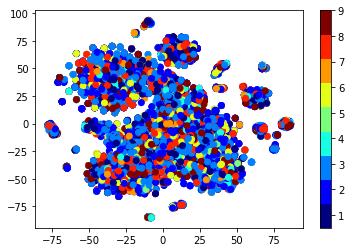

In [ ]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(Bigrams_Unigrams_df)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_i, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

#LABELS DATAFRAME

In [ ]:
Train_labels = pd.read_csv("trainLabels.csv")
Train_labels.head()

Id  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1
3  05rJTUWYAKNegBk2wE8X      1
4  0AnoOZDNbPXIr2MRBSCJ      1

In [ ]:
Train_labels.shape

(10868, 2)

In [ ]:
Train_labels["Byte_files with .txt"] = Train_labels['Id'].astype(str)+'.txt'


In [ ]:
Train_labels.head()

Id  Class      Byte_files with .txt
0  01kcPWA9K2BOxQeS5Rju      1  01kcPWA9K2BOxQeS5Rju.txt
1  04EjIdbPV5e1XroFOpiN      1  04EjIdbPV5e1XroFOpiN.txt
2  05EeG39MTRrI6VY21DPd      1  05EeG39MTRrI6VY21DPd.txt
3  05rJTUWYAKNegBk2wE8X      1  05rJTUWYAKNegBk2wE8X.txt
4  0AnoOZDNbPXIr2MRBSCJ      1  0AnoOZDNbPXIr2MRBSCJ.txt

In [ ]:
Train_labels.drop('Id',axis=1,inplace=True)

In [ ]:
Train_labels

Class      Byte_files with .txt
0          1  01kcPWA9K2BOxQeS5Rju.txt
1          1  04EjIdbPV5e1XroFOpiN.txt
2          1  05EeG39MTRrI6VY21DPd.txt
3          1  05rJTUWYAKNegBk2wE8X.txt
4          1  0AnoOZDNbPXIr2MRBSCJ.txt
...      ...                       ...
10863      9  KFrZ0Lop1WDGwUtkusCi.txt
10864      9  kg24YRJTB8DNdKMXpwOH.txt
10865      9  kG29BLiFYPgWtpb350sO.txt
10866      9  kGITL4OJxYMWEQ1bKBiP.txt
10867      9  KGorN9J6XAC4bOEkmyup.txt

[10868 rows x 2 columns]

In [ ]:
Train_labels.rename(columns = {'Byte_files with .txt':'Byte files'}, inplace = True)

In [ ]:
Train_labels

Class                Byte files
0          1  01kcPWA9K2BOxQeS5Rju.txt
1          1  04EjIdbPV5e1XroFOpiN.txt
2          1  05EeG39MTRrI6VY21DPd.txt
3          1  05rJTUWYAKNegBk2wE8X.txt
4          1  0AnoOZDNbPXIr2MRBSCJ.txt
...      ...                       ...
10863      9  KFrZ0Lop1WDGwUtkusCi.txt
10864      9  kg24YRJTB8DNdKMXpwOH.txt
10865      9  kG29BLiFYPgWtpb350sO.txt
10866      9  kGITL4OJxYMWEQ1bKBiP.txt
10867      9  KGorN9J6XAC4bOEkmyup.txt

[10868 rows x 2 columns]

In [ ]:
byte_files = os.listdir('Bytefiles')

In [ ]:
Temp_df = pd.DataFrame(data={'Byte files':byte_files}) # Making a new dataframe for different operations

In [ ]:
Temp_df

Byte files
0      c1X3j2Lat7Eo4I8GWFD5.txt
1      4m1Gsx5JvMFgATY7LOz0.txt
2      2xlhAE5LO8RFfczB6ep3.txt
3      5y4KkCXDrLHbgTwSfdqm.txt
4      Fznamk4GOtlcB91EK0qD.txt
...                         ...
10863  9N7hmb2VQnZoJBvLTWlt.txt
10864  Hps7JhzwjlOAkMXKP92n.txt
10865  dB90CQlLWSpv1myr45G8.txt
10866  iBwVcOQ6hltTIaZp1SFk.txt
10867  0XEmjdgVyY6hWfKulvCi.txt

[10868 rows x 1 columns]

In [ ]:
Temp_df = pd.merge(Temp_df, Train_labels, on='Byte files', how='left') # merging the dataframe

In [ ]:
Temp_df

Byte files  Class
0      c1X3j2Lat7Eo4I8GWFD5.txt      3
1      4m1Gsx5JvMFgATY7LOz0.txt      3
2      2xlhAE5LO8RFfczB6ep3.txt      7
3      5y4KkCXDrLHbgTwSfdqm.txt      2
4      Fznamk4GOtlcB91EK0qD.txt      3
...                         ...    ...
10863  9N7hmb2VQnZoJBvLTWlt.txt      8
10864  Hps7JhzwjlOAkMXKP92n.txt      3
10865  dB90CQlLWSpv1myr45G8.txt      2
10866  iBwVcOQ6hltTIaZp1SFk.txt      6
10867  0XEmjdgVyY6hWfKulvCi.txt      2

[10868 rows x 2 columns]

In [ ]:
Temp_df.isna().any(axis=None) # checking if there is any null value

False

#Making a dataframe for Bytes files with its feature vector

In [ ]:
print(type(bigram_matrix_normalized))

<class 'scipy.sparse.csc.csc_matrix'>


In [ ]:
Byte_files = os.listdir('Bytefiles')

In [ ]:
byte_vector_combo_df = pd.DataFrame(data={'Byte_files':Byte_files, 'sparse_vectors':bigram_matrix_normalized}) # Making a new dataframe for different operations

In [ ]:
byte_vector_combo_df_with_class_labels = pd.merge(byte_vector_combo_df, Train_labels, on='Byte_files', how='left') # merging the dataframe

In [ ]:
byte_vector_combo_df_with_class_labels

Byte_files  \
0      7upD1xywIeOmibLNPSo4.txt   
1      Fc7z9kKf5ZUwpyqC8L21.txt   
2      3suymN9GSHAtvYZ71Kaw.txt   
3      gKlJ0CFirsA3cOZUmWDe.txt   
4      gkOUScAXws6TNM7R4CPe.txt   
...                         ...   
10863  FiGCD4zX3Nrlo8QPsK6c.txt   
10864  HJt1Mc578nYFBDdKNkVu.txt   
10865  89v2baCuULMreOmyNKlW.txt   
10866  B17Ru4gs0vhqyMjCtLZw.txt   
10867  5ghsiExd6LZpW3GzHyJ1.txt   

                                          sparse_vectors  Class  
0        (0, 1)\t0.0009406671769664154\n  (0, 2)\t0.0...      1  
1        (0, 0)\t0.00015621852872160666\n  (0, 1)\t0....      9  
2        (0, 0)\t0.0003124370574432133\n  (0, 2)\t0.0...      3  
3        (0, 2)\t0.005326782131707921\n  (0, 3)\t0.00...      2  
4        (0, 0)\t7.810926436080333e-05\n  (0, 1)\t0.0...      2  
...                                                  ...    ...  
10863    (0, 0)\t7.810926436080333e-05\n  (0, 1)\t0.0...      2  
10864    (0, 0)\t0.00015621852872160666\n  (0, 2)\t0....      8  
10865    (0, 0)\t0.00140596675849446\n  (0, 1)\t0.008...      3  
10866    (0, 0)\t0.0010935297010512466\n  (0, 1)\t0.0...      9  
10867    (0, 7)\t7.244607773506261e-05\n  (0, 10)\t1....      2  

[10868 rows x 3 columns]

#SELECTING TOP 2000 FEATURES USING RANDOM FOREST

#NOW SELECTING TOP 2000 FEATURES USING RANDOM FOREST

In [ ]:
y_i = Temp_df['Class']

In [ ]:
def top_bigram_indexes(x_i,y_i,bigrams_limit):
    model = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
    model.fit(x_i,y_i)
    
    #sorting the bigrams in descending order 
    #Bigrams with highest feature importance comes first
    top_bigram_indices = np.argsort(model.feature_importances_)[::-1]
   
    return top_bigram_indices[:bigrams_limit]

In [ ]:
top_bigram_indices = top_bigram_indexes(bigram_matrix_normalized,y_i,2000)

In [ ]:
import pickle as pkl
with open('top_bigram_indices_2000.pkl','wb') as f:          # dumping everything in a pickle file 
    pkl.dump(top_bigram_indices,f)

In [ ]:
!cp top_bigram_indices_2000.pkl /content/drive/MyDrive/mmd-files-new # Copying it to drive

In [ ]:
top_bigram_indices

array([23238, 64381, 51388, ..., 58253, 25335, 47736])

#Stacking the Data Frame with Top bigram feature vectors

In [ ]:
Best_Bigram_features = np.zeros((10868,0))
for i in top_bigram_indices:
    Best_bigram_matrix_normalized = bigram_matrix_normalized[:,i].todense()
    Best_Bigram_features = np.hstack([Best_Bigram_features,Best_bigram_matrix_normalized])

In [ ]:

Best_Bigrams_Unigrams_df = pd.DataFrame(Best_Bigram_features,columns = np.take(Features_uni_bigrams,top_bigram_indices))
Best_Bigrams_Unigrams_df

96 86     f5 a9     bb e2     7d c9     80 7d     5f c9     c0 74  \
0      0.015539  0.014993  0.015830  0.006805  0.002762  0.005487  0.000472   
1      0.026330  0.009370  0.021107  0.018713  0.002565  0.006983  0.000337   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.007103  0.009477  0.007693   
4      0.008633  0.013119  0.022162  0.009356  0.001973  0.011971  0.000304   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.000937  0.002111  0.002552  0.000000  0.000998  0.000034   
10864  0.023741  0.020615  0.012664  0.017012  0.002762  0.006484  0.000607   
10865  0.000432  0.000000  0.000000  0.000000  0.007497  0.008978  0.005297   
10866  0.005611  0.010308  0.004221  0.006805  0.001381  0.000998  0.000304   
10867  0.000000  0.000000  0.000000  0.000000  0.008287  0.008978  0.006748   

          02 c1     59 e8     5a 52  ...     33 46     56 55     f6 8d  \
0      0.000215  0.000611  0.001804  ...  0.000447  0.001029  0.004501   
1      0.000366  0.000778  0.001412  ...  0.000670  0.001029  0.005626   
2      0.000022  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000086  0.000722  0.000000  ...  0.000000  0.000000  0.000000   
4      0.000345  0.000945  0.002118  ...  0.000760  0.000882  0.005626   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000043  0.000056  0.000078  ...  0.000089  0.000147  0.000563   
10864  0.000302  0.000834  0.001020  ...  0.000581  0.001226  0.005626   
10865  0.002369  0.000722  0.000078  ...  0.000000  0.000098  0.000000   
10866  0.000151  0.000445  0.000314  ...  0.000402  0.000392  0.000563   
10867  0.000280  0.000778  0.000000  ...  0.000000  0.000147  0.001688   

          f5 9e     ff be     27 a4     4c 7a     ea 6c     07 46     3c 68  
0      0.011473  0.002867  0.006113  0.003335  0.007100  0.000606  0.000507  
1      0.016254  0.002457  0.007471  0.010005  0.014200  0.000326  0.000950  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3      0.000000  0.000102  0.000000  0.000000  0.000000  0.000047  0.000000  
4      0.011473  0.003686  0.010867  0.006670  0.017243  0.000792  0.000317  
...         ...       ...       ...       ...       ...       ...       ...  
10863  0.002868  0.000614  0.000000  0.002668  0.002029  0.000047  0.000063  
10864  0.009561  0.002150  0.008150  0.006670  0.019271  0.000373  0.001077  
10865  0.000000  0.011467  0.000000  0.000000  0.001014  0.004239  0.000000  
10866  0.003824  0.001433  0.008829  0.006670  0.006086  0.000186  0.000887  
10867  0.000000  0.000205  0.000000  0.000000  0.000000  0.000047  0.000063  

[10868 rows x 2000 columns]

In [ ]:
Best_Bigrams_Unigrams_df['Byte-files']=byte_files
Best_Bigrams_Unigrams_df

96 86     f5 a9     bb e2     7d c9     80 7d     5f c9     c0 74  \
0      0.015539  0.014993  0.015830  0.006805  0.002762  0.005487  0.000472   
1      0.026330  0.009370  0.021107  0.018713  0.002565  0.006983  0.000337   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.007103  0.009477  0.007693   
4      0.008633  0.013119  0.022162  0.009356  0.001973  0.011971  0.000304   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.000937  0.002111  0.002552  0.000000  0.000998  0.000034   
10864  0.023741  0.020615  0.012664  0.017012  0.002762  0.006484  0.000607   
10865  0.000432  0.000000  0.000000  0.000000  0.007497  0.008978  0.005297   
10866  0.005611  0.010308  0.004221  0.006805  0.001381  0.000998  0.000304   
10867  0.000000  0.000000  0.000000  0.000000  0.008287  0.008978  0.006748   

          02 c1     59 e8     5a 52  ...     56 55     f6 8d     f5 9e  \
0      0.000215  0.000611  0.001804  ...  0.001029  0.004501  0.011473   
1      0.000366  0.000778  0.001412  ...  0.001029  0.005626  0.016254   
2      0.000022  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000086  0.000722  0.000000  ...  0.000000  0.000000  0.000000   
4      0.000345  0.000945  0.002118  ...  0.000882  0.005626  0.011473   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000043  0.000056  0.000078  ...  0.000147  0.000563  0.002868   
10864  0.000302  0.000834  0.001020  ...  0.001226  0.005626  0.009561   
10865  0.002369  0.000722  0.000078  ...  0.000098  0.000000  0.000000   
10866  0.000151  0.000445  0.000314  ...  0.000392  0.000563  0.003824   
10867  0.000280  0.000778  0.000000  ...  0.000147  0.001688  0.000000   

          ff be     27 a4     4c 7a     ea 6c     07 46     3c 68  \
0      0.002867  0.006113  0.003335  0.007100  0.000606  0.000507   
1      0.002457  0.007471  0.010005  0.014200  0.000326  0.000950   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000102  0.000000  0.000000  0.000000  0.000047  0.000000   
4      0.003686  0.010867  0.006670  0.017243  0.000792  0.000317   
...         ...       ...       ...       ...       ...       ...   
10863  0.000614  0.000000  0.002668  0.002029  0.000047  0.000063   
10864  0.002150  0.008150  0.006670  0.019271  0.000373  0.001077   
10865  0.011467  0.000000  0.000000  0.001014  0.004239  0.000000   
10866  0.001433  0.008829  0.006670  0.006086  0.000186  0.000887   
10867  0.000205  0.000000  0.000000  0.000000  0.000047  0.000063   

                     Byte-files  
0      c1X3j2Lat7Eo4I8GWFD5.txt  
1      4m1Gsx5JvMFgATY7LOz0.txt  
2      2xlhAE5LO8RFfczB6ep3.txt  
3      5y4KkCXDrLHbgTwSfdqm.txt  
4      Fznamk4GOtlcB91EK0qD.txt  
...                         ...  
10863  9N7hmb2VQnZoJBvLTWlt.txt  
10864  Hps7JhzwjlOAkMXKP92n.txt  
10865  dB90CQlLWSpv1myr45G8.txt  
10866  iBwVcOQ6hltTIaZp1SFk.txt  
10867  0XEmjdgVyY6hWfKulvCi.txt  

[10868 rows x 2001 columns]

In [ ]:
Best_Bigrams_Unigrams_df.to_csv('Best_Bigrams_Unigrams_df_2000.csv')

In [ ]:
!cp Best_Bigrams_Unigrams_df_2000.csv /content/drive/MyDrive/mmd-files-new # Copying it to drive

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [ ]:
#file sizes of byte files
Y=pd.read_csv("trainLabels.csv")
files=os.listdir('Bytefiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('Bytefiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  c1X3j2Lat7Eo4I8GWFD5  6.714844      3
1  4m1Gsx5JvMFgATY7LOz0  6.714844      3
2  2xlhAE5LO8RFfczB6ep3  4.183594      7
3  5y4KkCXDrLHbgTwSfdqm  0.363281      2
4  Fznamk4GOtlcB91EK0qD  6.703125      3


In [ ]:
data_size_byte.drop('Class',axis=1,inplace=True)

In [ ]:
print (data_size_byte.head())

                     ID      size
0  c1X3j2Lat7Eo4I8GWFD5  6.714844
1  4m1Gsx5JvMFgATY7LOz0  6.714844
2  2xlhAE5LO8RFfczB6ep3  4.183594
3  5y4KkCXDrLHbgTwSfdqm  0.363281
4  Fznamk4GOtlcB91EK0qD  6.703125


In [ ]:
data_size_byte["ID.txt"] = data_size_byte['ID'].astype(str)+'.txt'

In [ ]:
print (data_size_byte.head())

                     ID      size                    ID.txt
0  c1X3j2Lat7Eo4I8GWFD5  6.714844  c1X3j2Lat7Eo4I8GWFD5.txt
1  4m1Gsx5JvMFgATY7LOz0  6.714844  4m1Gsx5JvMFgATY7LOz0.txt
2  2xlhAE5LO8RFfczB6ep3  4.183594  2xlhAE5LO8RFfczB6ep3.txt
3  5y4KkCXDrLHbgTwSfdqm  0.363281  5y4KkCXDrLHbgTwSfdqm.txt
4  Fznamk4GOtlcB91EK0qD  6.703125  Fznamk4GOtlcB91EK0qD.txt


In [ ]:
data_size_byte.drop('ID',axis=1,inplace=True)

In [ ]:
print (data_size_byte.head())

       size                    ID.txt
0  6.714844  c1X3j2Lat7Eo4I8GWFD5.txt
1  6.714844  4m1Gsx5JvMFgATY7LOz0.txt
2  4.183594  2xlhAE5LO8RFfczB6ep3.txt
3  0.363281  5y4KkCXDrLHbgTwSfdqm.txt
4  6.703125  Fznamk4GOtlcB91EK0qD.txt


In [ ]:
data_size_byte.rename(columns = {'ID.txt':'Byte files'}, inplace = True)

In [ ]:
Temp_df = pd.merge(Temp_df, data_size_byte, on='Byte files', how='left') # merging the dataframe

In [ ]:
Temp_df

Byte files  Class      size
0      c1X3j2Lat7Eo4I8GWFD5.txt      3  6.714844
1      4m1Gsx5JvMFgATY7LOz0.txt      3  6.714844
2      2xlhAE5LO8RFfczB6ep3.txt      7  4.183594
3      5y4KkCXDrLHbgTwSfdqm.txt      2  0.363281
4      Fznamk4GOtlcB91EK0qD.txt      3  6.703125
...                         ...    ...       ...
10863  9N7hmb2VQnZoJBvLTWlt.txt      8  0.363281
10864  Hps7JhzwjlOAkMXKP92n.txt      3  6.714844
10865  dB90CQlLWSpv1myr45G8.txt      2  2.765625
10866  iBwVcOQ6hltTIaZp1SFk.txt      6  1.605469
10867  0XEmjdgVyY6hWfKulvCi.txt      2  1.347656

[10868 rows x 3 columns]

In [ ]:
Temp_df.to_csv('Temp_df_new.csv')

In [ ]:
!cp Temp_df_new.csv /content/drive/MyDrive/mmd-files-new # Copying it to drive

In [ ]:
Best_Bigrams_Unigrams_df['size']=list(Temp_df['size'])

In [ ]:
Best_Bigrams_Unigrams_df

96 86     f5 a9     bb e2     7d c9     80 7d     5f c9     c0 74  \
0      0.015539  0.014993  0.015830  0.006805  0.002762  0.005487  0.000472   
1      0.026330  0.009370  0.021107  0.018713  0.002565  0.006983  0.000337   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.007103  0.009477  0.007693   
4      0.008633  0.013119  0.022162  0.009356  0.001973  0.011971  0.000304   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.000937  0.002111  0.002552  0.000000  0.000998  0.000034   
10864  0.023741  0.020615  0.012664  0.017012  0.002762  0.006484  0.000607   
10865  0.000432  0.000000  0.000000  0.000000  0.007497  0.008978  0.005297   
10866  0.005611  0.010308  0.004221  0.006805  0.001381  0.000998  0.000304   
10867  0.000000  0.000000  0.000000  0.000000  0.008287  0.008978  0.006748   

          02 c1     59 e8     5a 52  ...     f6 8d     f5 9e     ff be  \
0      0.000215  0.000611  0.001804  ...  0.004501  0.011473  0.002867   
1      0.000366  0.000778  0.001412  ...  0.005626  0.016254  0.002457   
2      0.000022  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000086  0.000722  0.000000  ...  0.000000  0.000000  0.000102   
4      0.000345  0.000945  0.002118  ...  0.005626  0.011473  0.003686   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000043  0.000056  0.000078  ...  0.000563  0.002868  0.000614   
10864  0.000302  0.000834  0.001020  ...  0.005626  0.009561  0.002150   
10865  0.002369  0.000722  0.000078  ...  0.000000  0.000000  0.011467   
10866  0.000151  0.000445  0.000314  ...  0.000563  0.003824  0.001433   
10867  0.000280  0.000778  0.000000  ...  0.001688  0.000000  0.000205   

          27 a4     4c 7a     ea 6c     07 46     3c 68  \
0      0.006113  0.003335  0.007100  0.000606  0.000507   
1      0.007471  0.010005  0.014200  0.000326  0.000950   
2      0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000047  0.000000   
4      0.010867  0.006670  0.017243  0.000792  0.000317   
...         ...       ...       ...       ...       ...   
10863  0.000000  0.002668  0.002029  0.000047  0.000063   
10864  0.008150  0.006670  0.019271  0.000373  0.001077   
10865  0.000000  0.000000  0.001014  0.004239  0.000000   
10866  0.008829  0.006670  0.006086  0.000186  0.000887   
10867  0.000000  0.000000  0.000000  0.000047  0.000063   

                     Byte-files      size  
0      c1X3j2Lat7Eo4I8GWFD5.txt  6.714844  
1      4m1Gsx5JvMFgATY7LOz0.txt  6.714844  
2      2xlhAE5LO8RFfczB6ep3.txt  4.183594  
3      5y4KkCXDrLHbgTwSfdqm.txt  0.363281  
4      Fznamk4GOtlcB91EK0qD.txt  6.703125  
...                         ...       ...  
10863  9N7hmb2VQnZoJBvLTWlt.txt  0.363281  
10864  Hps7JhzwjlOAkMXKP92n.txt  6.714844  
10865  dB90CQlLWSpv1myr45G8.txt  2.765625  
10866  iBwVcOQ6hltTIaZp1SFk.txt  1.605469  
10867  0XEmjdgVyY6hWfKulvCi.txt  1.347656  

[10868 rows x 2002 columns]

In [ ]:
#Normalizing the size column in the datadrame
column = 'size'
Best_Bigrams_Unigrams_df[column] = (Best_Bigrams_Unigrams_df[column] - Best_Bigrams_Unigrams_df[column].min()) / (Best_Bigrams_Unigrams_df[column].max() - Best_Bigrams_Unigrams_df[column].min())    

In [ ]:
Best_Bigrams_Unigrams_df

96 86     f5 a9     bb e2     7d c9     80 7d     5f c9     c0 74  \
0      0.015539  0.014993  0.015830  0.006805  0.002762  0.005487  0.000472   
1      0.026330  0.009370  0.021107  0.018713  0.002565  0.006983  0.000337   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.007103  0.009477  0.007693   
4      0.008633  0.013119  0.022162  0.009356  0.001973  0.011971  0.000304   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.000937  0.002111  0.002552  0.000000  0.000998  0.000034   
10864  0.023741  0.020615  0.012664  0.017012  0.002762  0.006484  0.000607   
10865  0.000432  0.000000  0.000000  0.000000  0.007497  0.008978  0.005297   
10866  0.005611  0.010308  0.004221  0.006805  0.001381  0.000998  0.000304   
10867  0.000000  0.000000  0.000000  0.000000  0.008287  0.008978  0.006748   

          02 c1     59 e8     5a 52  ...     f6 8d     f5 9e     ff be  \
0      0.000215  0.000611  0.001804  ...  0.004501  0.011473  0.002867   
1      0.000366  0.000778  0.001412  ...  0.005626  0.016254  0.002457   
2      0.000022  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000086  0.000722  0.000000  ...  0.000000  0.000000  0.000102   
4      0.000345  0.000945  0.002118  ...  0.005626  0.011473  0.003686   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000043  0.000056  0.000078  ...  0.000563  0.002868  0.000614   
10864  0.000302  0.000834  0.001020  ...  0.005626  0.009561  0.002150   
10865  0.002369  0.000722  0.000078  ...  0.000000  0.000000  0.011467   
10866  0.000151  0.000445  0.000314  ...  0.000563  0.003824  0.001433   
10867  0.000280  0.000778  0.000000  ...  0.001688  0.000000  0.000205   

          27 a4     4c 7a     ea 6c     07 46     3c 68  \
0      0.006113  0.003335  0.007100  0.000606  0.000507   
1      0.007471  0.010005  0.014200  0.000326  0.000950   
2      0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000047  0.000000   
4      0.010867  0.006670  0.017243  0.000792  0.000317   
...         ...       ...       ...       ...       ...   
10863  0.000000  0.002668  0.002029  0.000047  0.000063   
10864  0.008150  0.006670  0.019271  0.000373  0.001077   
10865  0.000000  0.000000  0.001014  0.004239  0.000000   
10866  0.008829  0.006670  0.006086  0.000186  0.000887   
10867  0.000000  0.000000  0.000000  0.000047  0.000063   

                     Byte-files      size  
0      c1X3j2Lat7Eo4I8GWFD5.txt  0.150520  
1      4m1Gsx5JvMFgATY7LOz0.txt  0.150520  
2      2xlhAE5LO8RFfczB6ep3.txt  0.093018  
3      5y4KkCXDrLHbgTwSfdqm.txt  0.006233  
4      Fznamk4GOtlcB91EK0qD.txt  0.150254  
...                         ...       ...  
10863  9N7hmb2VQnZoJBvLTWlt.txt  0.006233  
10864  Hps7JhzwjlOAkMXKP92n.txt  0.150520  
10865  dB90CQlLWSpv1myr45G8.txt  0.060807  
10866  iBwVcOQ6hltTIaZp1SFk.txt  0.034452  
10867  0XEmjdgVyY6hWfKulvCi.txt  0.028595  

[10868 rows x 2002 columns]

In [ ]:
Best_Bigrams_Unigrams_df.to_csv('Best_Bigrams_Unigrams_df_2000_with_size.csv')

In [ ]:
!cp Best_Bigrams_Unigrams_df_2000_with_size.csv /content/drive/MyDrive/mmd-files-new # Copying it to drive

In [ ]:
Best_Bigrams_Unigrams_df = pd.read_csv("/content/drive/MyDrive/mmd-files/Best_Bigrams_Unigrams_df_2000_with_size.csv")

In [ ]:
Temp_df = pd.read_csv("/content/drive/MyDrive/mmd-files-new/Temp_df_new.csv")

In [ ]:
y_i = Temp_df['Class']

#Multivariate analysis

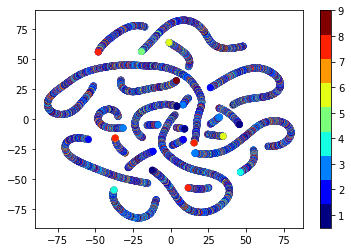

In [ ]:
#multivariate analysis on byte files
#this is with perplexity 50

xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(Best_Bigrams_Unigrams_df.drop(['Byte-files'],axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_i, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

Text(0.5, 1.0, 'With perplexity = 50, n_iter=5000')

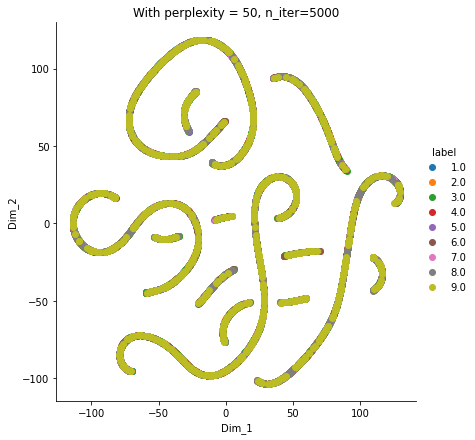

In [ ]:
# TSNE

from sklearn.manifold import TSNE
import seaborn as sn

model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(Best_Bigrams_Unigrams_df) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_i)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

#Train - Test Split

In [ ]:
%matplotlib notebook


In [ ]:
%matplotlib inline

In [ ]:

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(Best_Bigrams_Unigrams_df, y_i,stratify=y_i,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


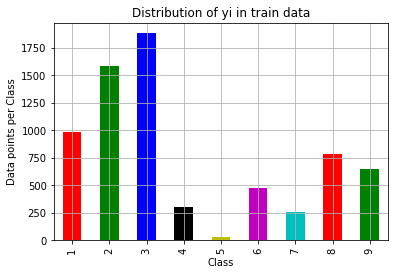

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


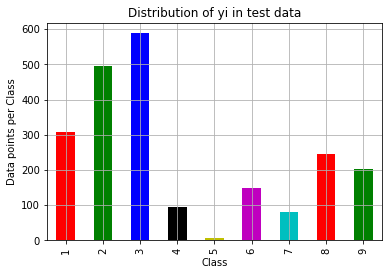

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


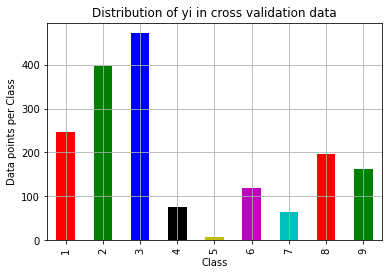

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [ ]:
# it returns a dict, keys as class labels and values as the number of data points in that class
import pandas as pd
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  #red, green, blue, black, 'yellow', 'magenta' & 'cyan'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  #red, green, blue, black, 'yellow', 'magenta' & 'cyan'
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  #red, green, blue, black, 'yellow', 'magenta' & 'cyan'
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1> Machine Learning Models</h1>

<h2> Machine Leaning Models on bytes files</h2>

<h3>Random Model</h3>

In [ ]:
# To fix the display of plots
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Log loss on Cross Validation Data using Random Model 2.4806282749639132
Log loss on Test Data using Random Model 2.4900416431471544
Number of misclassified points  88.59245630174793
-------------------------------------------------- Confusion matrix --------------------------------------------------


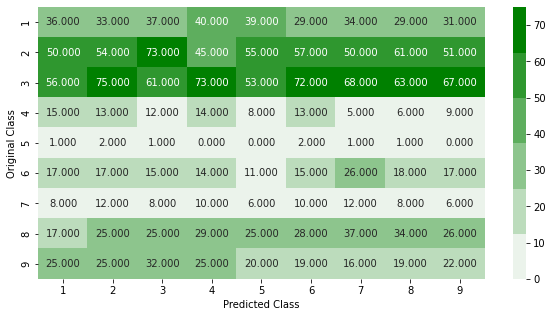

-------------------------------------------------- Precision matrix --------------------------------------------------


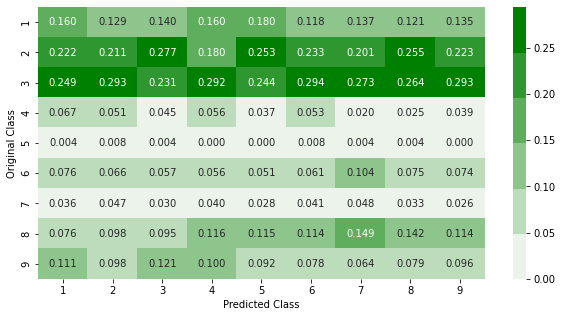

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


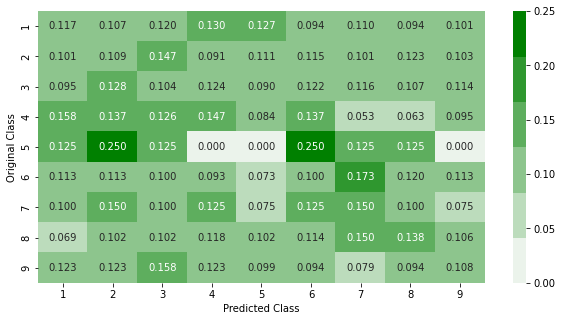

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3> K Nearest Neighbour Classification</h3>

KNeighborsClassifier(n_neighbors=1)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=1))

KNeighborsClassifier(n_neighbors=3)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=3))

KNeighborsClassifier()

CalibratedClassifierCV(base_estimator=KNeighborsClassifier())

KNeighborsClassifier(n_neighbors=7)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=7))

KNeighborsClassifier(n_neighbors=9)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=9))

KNeighborsClassifier(n_neighbors=11)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=11))

KNeighborsClassifier(n_neighbors=13)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=13))

log_loss for k =  1 is 1.902118045504686
log_loss for k =  3 is 1.901727642494829
log_loss for k =  5 is 1.9015913597662977
log_loss for k =  7 is 1.9015126844236991
log_loss for k =  9 is 1.901335557549328
log_loss for k =  11 is 1.900923767712535
log_loss for k =  13 is 1.9011216963042479


Text(1, 1.902118045504686, '(1, 1.902)')

Text(3, 1.901727642494829, '(3, 1.902)')

Text(5, 1.9015913597662977, '(5, 1.902)')

Text(7, 1.9015126844236991, '(7, 1.902)')

Text(9, 1.901335557549328, '(9, 1.901)')

Text(11, 1.900923767712535, '(11, 1.901)')

Text(13, 1.9011216963042479, '(13, 1.901)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

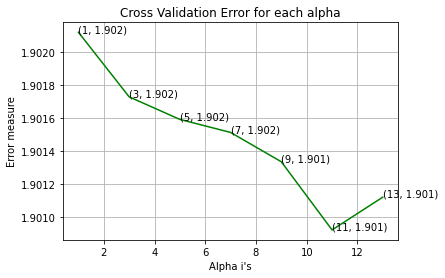

KNeighborsClassifier(n_neighbors=11)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=11))

For values of best alpha =  11 The train log loss is: 1.9158279349267384
For values of best alpha =  11 The cross validation log loss is: 1.900923767712535
For values of best alpha =  11 The test log loss is: 1.8998166690364335
Number of misclassified points  72.95308187672494
-------------------------------------------------- Confusion matrix --------------------------------------------------


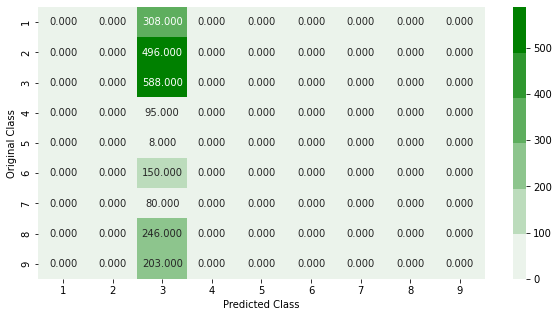

-------------------------------------------------- Precision matrix --------------------------------------------------


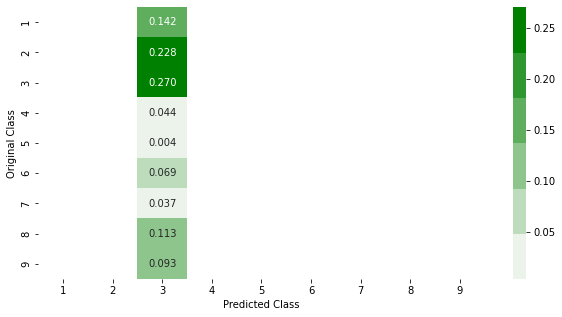

Sum of columns in precision matrix [nan nan  1. nan nan nan nan nan nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


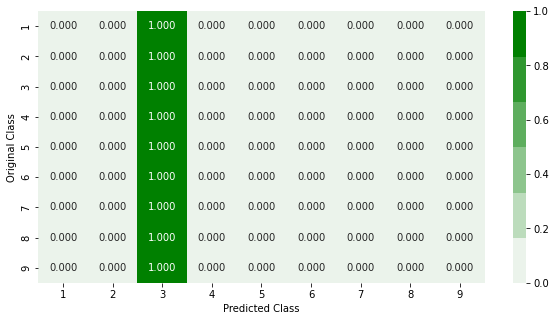

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> Logistic Regression</h3>

LogisticRegression(C=1e-05, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1e-05,
                                                         class_weight='balanced'))

LogisticRegression(C=0.0001, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.0001,
                                                         class_weight='balanced'))

LogisticRegression(C=0.001, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.001,
                                                         class_weight='balanced'))

LogisticRegression(C=0.01, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.01,
                                                         class_weight='balanced'))

LogisticRegression(C=0.1, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.1,
                                                         class_weight='balanced'))

LogisticRegression(C=1, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1,
                                                         class_weight='balanced'))

LogisticRegression(C=10, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=10,
                                                         class_weight='balanced'))

LogisticRegression(C=100, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=100,
                                                         class_weight='balanced'))

LogisticRegression(C=1000, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1000,
                                                         class_weight='balanced'))

log_loss for c =  1e-05 is 1.9004191568509357
log_loss for c =  0.0001 is 1.9004191568508284
log_loss for c =  0.001 is 1.9004191568508177
log_loss for c =  0.01 is 1.9004191568508166
log_loss for c =  0.1 is 1.9004191568508166
log_loss for c =  1 is 1.9004191568508166
log_loss for c =  10 is 1.9004191568508166
log_loss for c =  100 is 1.9004191568508166
log_loss for c =  1000 is 1.9004191568508166


Text(1e-05, 1.9004191568509357, '(1e-05, 1.9)')

Text(0.0001, 1.9004191568508284, '(0.0001, 1.9)')

Text(0.001, 1.9004191568508177, '(0.001, 1.9)')

Text(0.01, 1.9004191568508166, '(0.01, 1.9)')

Text(0.1, 1.9004191568508166, '(0.1, 1.9)')

Text(1, 1.9004191568508166, '(1, 1.9)')

Text(10, 1.9004191568508166, '(10, 1.9)')

Text(100, 1.9004191568508166, '(100, 1.9)')

Text(1000, 1.9004191568508166, '(1000, 1.9)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

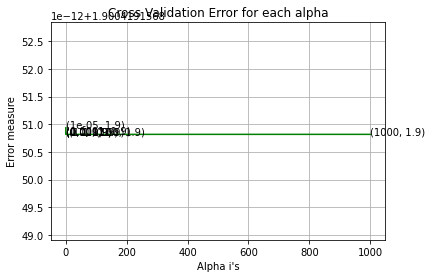

LogisticRegression(C=0.01, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.01,
                                                         class_weight='balanced'))

log loss for train data 1.8988815306183002
log loss for cv data 1.9004191568508166
log loss for test data 1.9000763101776432
Number of misclassified points  72.95308187672494
-------------------------------------------------- Confusion matrix --------------------------------------------------


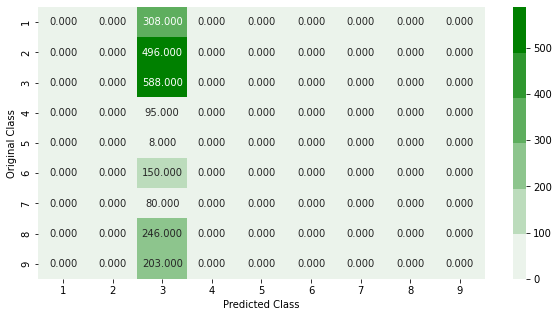

-------------------------------------------------- Precision matrix --------------------------------------------------


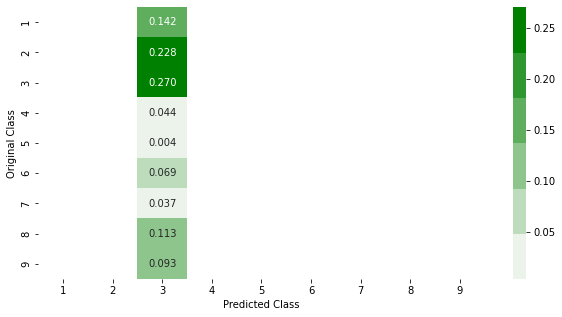

Sum of columns in precision matrix [nan nan  1. nan nan nan nan nan nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


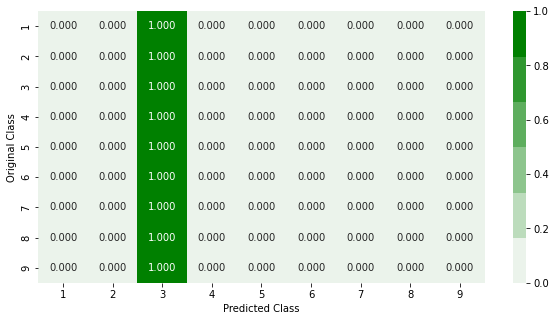

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> Random Forest Classifier </h3>

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=10,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=50,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=500,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=2000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=3000,
                                                             n_jobs=-1,
                                                             random_state=42))

log_loss for c =  10 is 1.6771472370456038
log_loss for c =  50 is 1.5937258012701567
log_loss for c =  100 is 1.5326086176846814
log_loss for c =  500 is 1.5305618221092527
log_loss for c =  1000 is 1.5290773233608428
log_loss for c =  2000 is 1.52493261137738
log_loss for c =  3000 is 1.5268867629249694


Text(10, 1.6771472370456038, '(10, 1.677)')

Text(50, 1.5937258012701567, '(50, 1.594)')

Text(100, 1.5326086176846814, '(100, 1.533)')

Text(500, 1.5305618221092527, '(500, 1.531)')

Text(1000, 1.5290773233608428, '(1000, 1.529)')

Text(2000, 1.52493261137738, '(2000, 1.525)')

Text(3000, 1.5268867629249694, '(3000, 1.527)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

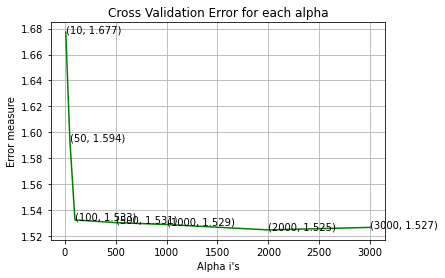

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=2000,
                                                             n_jobs=-1,
                                                             random_state=42))

For values of best alpha =  2000 The train log loss is: 0.5232616909536456
For values of best alpha =  2000 The cross validation log loss is: 1.52493261137738
For values of best alpha =  2000 The test log loss is: 1.5270225743163912
Number of misclassified points  55.703771849126035
-------------------------------------------------- Confusion matrix --------------------------------------------------


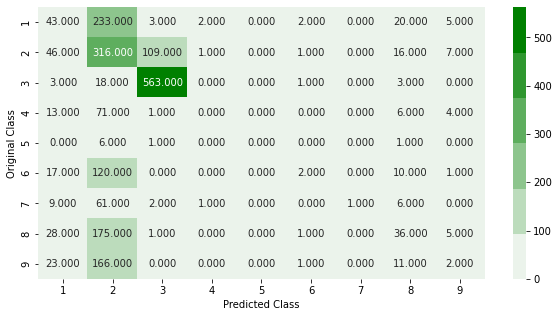

-------------------------------------------------- Precision matrix --------------------------------------------------


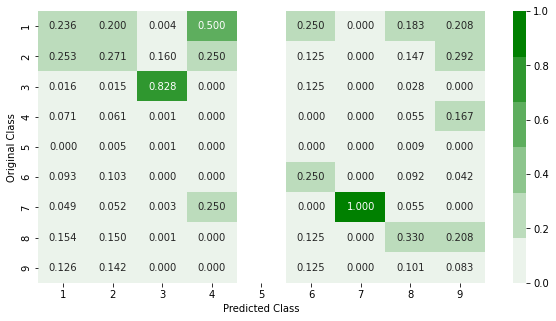

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


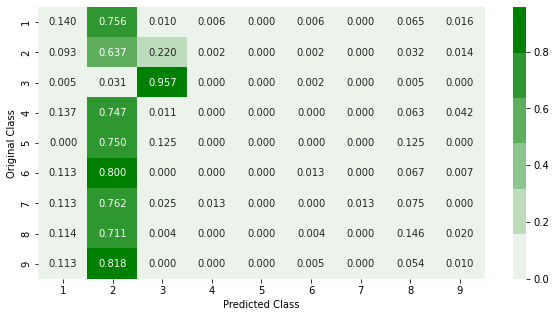

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

#CONCLUSION:

<h3> Bigrams are the still an important features as The test log loss using Random Forest  is: 1.5270225743163912</h3>



#Getting ASM Features

In [ ]:
!7z e train.7z -o/content/asmFiles *.asm -r


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 18810691091 bytes (18 GiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 18810691091
Headers Size = 339764
Method = LZMA:24
Solid = +
Blocks = 94

  0%      0% - train/01azqd4InC7m9JpocGv5.asm                                       0% 1 - train/01IsoiSMh5gxyDYTl4CB.asm                                         0% 2 - train/01jsnpXSAlgw6aPeDxrU.asm                                         0% 6 - train/02JqQ7H3yEoD8viYWlmS.asm

#ASM Pre-defined FEATURES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Y = pd.read_csv("trainLabels.csv")
Y.head()

Id  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1
3  05rJTUWYAKNegBk2wE8X      1
4  0AnoOZDNbPXIr2MRBSCJ      1

In [ ]:
asmout = pd.read_csv("/content/drive/MyDrive/mmd-files/asmoutputfile.csv")

In [ ]:
asmout

ID  HEADER:  .text:  .Pav:  .idata:   .data:  .bss:  \
0      01kcPWA9K2BOxQeS5Rju       19     744      0      127       57      0   
1      1E93CpP60RHFNiT5Qfvn       17     838      0      103       49      0   
2      3ekVow2ajZHbTnBcsDfX       17     427      0       50       43      0   
3      3X2nY7iQaPBIWDrAZqJe       17     227      0       43       19      0   
4      46OZzdsSKDCFV8h7XWxf       17     402      0       59      170      0   
...                     ...      ...     ...    ...      ...      ...    ...   
10863  kqvJp5E0wbWgu9mnzSQB        0    5062      0      303     3772      0   
10864  KQwj9O6dlPxNyf8zW0gp        0    3520      0      458   463638      0   
10865  KRNHAm094TC7OJfEPp8h        0   82940      0      397    36052      0   
10866  ksKnqcBVTC0a3zSGoveR        0   13682      0      454   842620      0   
10867  kSNnYl3ZLvB2WI7V4iEt        0    6003      0      466  1643010      0   

       .rdata:  .edata:  .rsrc:  ...  :dword   edx    esi   eax   ebx   ecx  \
0          323        0       3  ...     137    18     66    15    43    83   
1            0        0       3  ...     130    18     29    48    82    12   
2          145        0       3  ...      84    13     42    10    67    14   
3            0        0       3  ...      25     6      8    14     7     2   
4            0        0       3  ...      18    12      9    18    29     5   
...        ...      ...     ...  ...     ...   ...    ...   ...   ...   ...   
10863  1940232        0       0  ...     833   224    705   277   338   237   
10864        0        0       0  ...     819   177    627   158   209    89   
10865  1281543        0       0  ...   16956  4337  10719  5197  4842  7343   
10866    39570        0       0  ...    3106   447   1394   742  1352   342   
10867    27450        0       0  ...    1081   210    781   350   696   273   

       edi  ebp  esp  eip  
0        0   17   48   29  
1        0   14    0   20  
2        0   11    0    9  
3        0    8    0    6  
4        0   11    0   11  
...    ...  ...  ...  ...  
10863    0    7   22   81  
10864    0   13    0  167  
10865    0    3   36  154  
10866    0    4   30  116  
10867    0   18   22  155  

[10868 rows x 52 columns]

In [ ]:
check_for_nan = asmout.isnull().values.any()
print(check_for_nan)

False


#File size of each asm file

In [ ]:

import array
from tqdm import tqdm

In [ ]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  1aJLj5T8sUYbM2trvX4n   0.265284      3
1  hGrRVejLFzNtXcBW6s2p   0.963938      8
2  IRdfwEvMDHeQVSa1pntx   0.169212      3
3  4TmkY68NvzbcRIuOACK0  32.693406      3
4  hDNYlkuFK3cOtqEywM6f  32.695734      3


In [ ]:
print(len(list(asm_size_byte['ID'])))

10868


In [ ]:
asmout=pd.merge(asmout,asm_size_byte,on="ID",how="left")

In [ ]:
asmout

ID  HEADER:  .text:  .Pav:  .idata:   .data:  .bss:  \
0      01kcPWA9K2BOxQeS5Rju       19     744      0      127       57      0   
1      1E93CpP60RHFNiT5Qfvn       17     838      0      103       49      0   
2      3ekVow2ajZHbTnBcsDfX       17     427      0       50       43      0   
3      3X2nY7iQaPBIWDrAZqJe       17     227      0       43       19      0   
4      46OZzdsSKDCFV8h7XWxf       17     402      0       59      170      0   
...                     ...      ...     ...    ...      ...      ...    ...   
10863  kqvJp5E0wbWgu9mnzSQB        0    5062      0      303     3772      0   
10864  KQwj9O6dlPxNyf8zW0gp        0    3520      0      458   463638      0   
10865  KRNHAm094TC7OJfEPp8h        0   82940      0      397    36052      0   
10866  ksKnqcBVTC0a3zSGoveR        0   13682      0      454   842620      0   
10867  kSNnYl3ZLvB2WI7V4iEt        0    6003      0      466  1643010      0   

       .rdata:  .edata:  .rsrc:  ...    esi   eax   ebx   ecx  edi  ebp  esp  \
0          323        0       3  ...     66    15    43    83    0   17   48   
1            0        0       3  ...     29    48    82    12    0   14    0   
2          145        0       3  ...     42    10    67    14    0   11    0   
3            0        0       3  ...      8    14     7     2    0    8    0   
4            0        0       3  ...      9    18    29     5    0   11    0   
...        ...      ...     ...  ...    ...   ...   ...   ...  ...  ...  ...   
10863  1940232        0       0  ...    705   277   338   237    0    7   22   
10864        0        0       0  ...    627   158   209    89    0   13    0   
10865  1281543        0       0  ...  10719  5197  4842  7343    0    3   36   
10866    39570        0       0  ...   1394   742  1352   342    0    4   30   
10867    27450        0       0  ...    781   350   696   273    0   18   22   

       eip       size  Class  
0       29   0.078190      1  
1       20   0.063400      1  
2        9   0.041695      1  
3        6   0.018757      1  
4       11   0.037567      1  
...    ...        ...    ...  
10863   81  70.039114      2  
10864  167  19.246181      2  
10865  154  53.143422      2  
10866  116  37.075758      2  
10867  155  68.806014      2  

[10868 rows x 54 columns]

In [ ]:
check_for_nan = asmout.isnull().values.any()
print(check_for_nan)

False


In [ ]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


In [ ]:

adv_features = normalize(asmout)
adv_features.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip      size  Class  
0  0.0  0.030797  0.001468  0.003173  0.000432      1  
1  0.0  0.025362  0.000000  0.002188  0.000327      1  
2  0.0  0.019928  0.000000  0.000985  0.000172      1  
3  0.0  0.014493  0.000000  0.000657  0.000009      1  
4  0.0  0.019928  0.000000  0.001204  0.000143      1  

[5 rows x 54 columns]

In [ ]:
check_for_nan = adv_features.isnull().values.any()
print(check_for_nan)

True


In [ ]:
adv_features.to_csv('adv_features.csv')


In [ ]:
!cp adv_features.csv /content/drive/MyDrive/mmd-files # Copying it to drive

#ASM PIXEL INTENSITY FEATURES (IMAGE FEATURES)

In [ ]:
file = open('asmFiles/1aJLj5T8sUYbM2trvX4n.asm','rb')
a = array.array('B') # Empty unsigned char array
a.frombytes(file.read()) #contributing  bytes representation to array(a)

In [ ]:
print(a)

array('B', [72, 69, 65, 68, 69, 82, 58, 48, 48, 52, 48, 48, 48, 48, 48, 9, 9, 9, 9, 9, 9, 9, 59, 13, 10, 72, 69, 65, 68, 69, 82, 58, 48, 48, 52, 48, 48, 48, 48, 48, 9, 9, 9, 9, 9, 9, 9, 59, 32, 43, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 43, 13, 10, 72, 69, 65, 68, 69, 82, 58, 48, 48, 52, 48, 48, 48, 48, 48, 9, 9, 9, 9, 9, 9, 9, 59, 32, 124, 32, 32, 32, 84, 104, 105, 115, 32, 102, 105, 108, 101, 9, 104, 97, 115, 32, 98, 101, 101, 110, 32, 103, 101, 110, 101, 114, 97, 116, 101, 100, 32, 98, 121, 32, 84, 104, 101, 32, 73, 110, 116, 101, 114, 97, 99, 116, 105, 118, 101, 32, 68, 105, 115, 97, 115, 115, 101, 109, 98, 108, 101, 114, 32, 40, 73, 68, 65, 41, 32, 32, 32, 32, 124, 13, 10, 72, 69, 65, 68, 69, 82, 58, 48, 48, 52, 48, 48, 48, 48, 48, 

In [ ]:
print(len(a))

278170


In [ ]:
asp= np.zeros((len(asmFiles),800))

In [ ]:
asp[1] = a[:800] #Adding first 800 features to matrix
print(asp)

[[ 0.  0.  0. ...  0.  0.  0.]
 [72. 69. 65. ... 61. 61. 61.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [ ]:
print(asp[1][18])

9.0


In [ ]:
# reference :(https://www.youtube.com/watch?v=VLQTRlLGz5Y#t=13m11s) 
asmFiles = os.listdir("asmFiles")
all_files = []

asm_matrix = np.zeros((len(asmFiles),800))
for i, asm_file in tqdm(enumerate(asmFiles)):
  asm_filename = asm_file.split(".")[0]
  all_files.append(asm_filename)

  file = open('asmFiles/'+asm_file,'rb') #rb : Opens the file as read-only in binary format and starts reading from the beginning of the file
  a = array.array('B') # Empty unsigned char array
  a.frombytes(file.read()) #contributing  bytes representation to array(a)

  asm_matrix[i] = a[:800] #Adding first 800 features to matrix

10868it [16:04, 11.27it/s]


In [ ]:
#https://stackoverflow.com/a/40519894
#asm_matrix_with_ID = np.concatenate((np.array(all_files)[:, None], asm_matrix), axis = 1)

In [ ]:
#https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb
column_names = [('ASM_{:s}'.format(str(x)))for x in range(1,801)]

In [ ]:
asm_pixels_df = pd.DataFrame(asm_matrix, columns = column_names)

In [ ]:
asm_pixels_df

ASM_1  ASM_2  ASM_3  ASM_4  ASM_5  ASM_6  ASM_7  ASM_8  ASM_9  ASM_10  \
0       72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
1       72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
2       72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
3       72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
4       72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
10863   46.0  116.0  101.0  120.0  116.0   58.0   48.0   48.0   52.0    48.0   
10864   72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
10865   72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
10866   72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
10867   46.0  116.0  101.0  120.0  116.0   58.0   48.0   48.0   52.0    48.0   

       ...  ASM_791  ASM_792  ASM_793  ASM_794  ASM_795  ASM_796  ASM_797  \
0      ...     61.0     61.0     61.0     61.0     61.0     61.0     61.0   
1      ...     61.0     61.0     61.0     61.0     61.0     61.0     61.0   
2      ...    109.0    111.0    100.0    101.0    108.0     32.0    102.0   
3      ...    109.0    111.0    100.0    101.0    108.0     32.0    102.0   
4      ...    109.0    111.0    100.0    101.0    108.0     32.0    102.0   
...    ...      ...      ...      ...      ...      ...      ...      ...   
10863  ...     56.0     54.0     32.0     40.0     80.0     69.0     41.0   
10864  ...     61.0     61.0     61.0     61.0     61.0     61.0     61.0   
10865  ...     61.0     61.0     61.0     61.0     61.0     61.0     61.0   
10866  ...     61.0     61.0     61.0     61.0     61.0     61.0     61.0   
10867  ...     97.0    108.0     32.0     97.0    100.0    100.0    114.0   

       ASM_798  ASM_799  ASM_800  
0         61.0     61.0     61.0  
1         61.0     61.0     61.0  
2        108.0     97.0    116.0  
3        108.0     97.0    116.0  
4        108.0     97.0    116.0  
...        ...      ...      ...  
10863     13.0     10.0     46.0  
10864     61.0     61.0     61.0  
10865     61.0     61.0     61.0  
10866     61.0     61.0     61.0  
10867    101.0    115.0    115.0  

[10868 rows x 800 columns]

In [ ]:
asm_pixels_df['ID']=all_files

In [ ]:
asm_pixels_df

ASM_1  ASM_2  ASM_3  ASM_4  ASM_5  ASM_6  ASM_7  ASM_8  ASM_9  ASM_10  \
0       72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
1       72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
2       72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
3       72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
4       72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
10863   46.0  116.0  101.0  120.0  116.0   58.0   48.0   48.0   52.0    48.0   
10864   72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
10865   72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
10866   72.0   69.0   65.0   68.0   69.0   82.0   58.0   48.0   48.0    52.0   
10867   46.0  116.0  101.0  120.0  116.0   58.0   48.0   48.0   52.0    48.0   

       ...  ASM_792  ASM_793  ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  \
0      ...     61.0     61.0     61.0     61.0     61.0     61.0     61.0   
1      ...     61.0     61.0     61.0     61.0     61.0     61.0     61.0   
2      ...    111.0    100.0    101.0    108.0     32.0    102.0    108.0   
3      ...    111.0    100.0    101.0    108.0     32.0    102.0    108.0   
4      ...    111.0    100.0    101.0    108.0     32.0    102.0    108.0   
...    ...      ...      ...      ...      ...      ...      ...      ...   
10863  ...     54.0     32.0     40.0     80.0     69.0     41.0     13.0   
10864  ...     61.0     61.0     61.0     61.0     61.0     61.0     61.0   
10865  ...     61.0     61.0     61.0     61.0     61.0     61.0     61.0   
10866  ...     61.0     61.0     61.0     61.0     61.0     61.0     61.0   
10867  ...    108.0     32.0     97.0    100.0    100.0    114.0    101.0   

       ASM_799  ASM_800                    ID  
0         61.0     61.0  1aJLj5T8sUYbM2trvX4n  
1         61.0     61.0  hGrRVejLFzNtXcBW6s2p  
2         97.0    116.0  IRdfwEvMDHeQVSa1pntx  
3         97.0    116.0  4TmkY68NvzbcRIuOACK0  
4         97.0    116.0  hDNYlkuFK3cOtqEywM6f  
...        ...      ...                   ...  
10863     10.0     46.0  7z03lVS5IJ8wOCvQyFdZ  
10864     61.0     61.0  A5DnKNZrMEfGiyUWauSB  
10865     61.0     61.0  FamuZb1OtvK27HRgeUSM  
10866     61.0     61.0  JMaEzg6s2P0n4wSIyulO  
10867    115.0    115.0  e8uQB30WJNbqXEf9SaRI  

[10868 rows x 801 columns]

In [ ]:
asm_pixels_df.to_csv('asm_pixels_df.csv')

In [ ]:
!cp asm_pixels_df.csv /content/drive/MyDrive/mmd-files # Copying it to drive

#Combining asm pixel features and advance features

In [ ]:
advance_features = pd.read_csv("/content/drive/MyDrive/mmd-files/adv_features.csv")

In [ ]:
advance_features=pd.merge(advance_features,asm_pixels_df,on='ID',how='left')

In [ ]:
advance_features

Unnamed: 0                    ID   HEADER:    .text:  .Pav:   .idata:  \
0               0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761   
1               1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617   
2               2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300   
3               3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258   
4               4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353   
...           ...                   ...       ...       ...    ...       ...   
10863       10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431    0.0  0.001815   
10864       10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167    0.0  0.002744   
10865       10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757    0.0  0.002378   
10866       10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085    0.0  0.002720   
10867       10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812    0.0  0.002792   

         .data:  .bss:   .rdata:  .edata:  ...  ASM_791  ASM_792  ASM_793  \
0      0.000023    0.0  0.000084      0.0  ...    109.0    111.0    100.0   
1      0.000019    0.0  0.000000      0.0  ...     61.0     61.0     61.0   
2      0.000017    0.0  0.000038      0.0  ...     61.0     61.0     61.0   
3      0.000008    0.0  0.000000      0.0  ...     61.0     61.0     61.0   
4      0.000068    0.0  0.000000      0.0  ...     61.0     61.0     61.0   
...         ...    ...       ...      ...  ...      ...      ...      ...   
10863  0.001498    0.0  0.505305      0.0  ...     56.0     54.0     32.0   
10864  0.184147    0.0  0.000000      0.0  ...     97.0    108.0     32.0   
10865  0.014319    0.0  0.333759      0.0  ...     56.0     54.0     32.0   
10866  0.334671    0.0  0.010305      0.0  ...     56.0     54.0     32.0   
10867  0.652570    0.0  0.007149      0.0  ...     56.0     54.0     32.0   

       ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...  
10863     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 855 columns]

In [ ]:
check_for_nan = advance_features.isnull().values.any()
print(check_for_nan)

True


In [ ]:
advance_features.to_csv('asm_image+advance.csv')

In [ ]:
!cp asm_image+advance.csv /content/drive/MyDrive/mmd-files # Copying it to drive

In [ ]:
y_i=advance_features['Class']

In [ ]:
print(y_i.value_counts())

3    2942
2    2478
1    1541
8    1228
9    1013
6     751
4     475
7     398
5      42
Name: Class, dtype: int64


#Multivariate Analysis

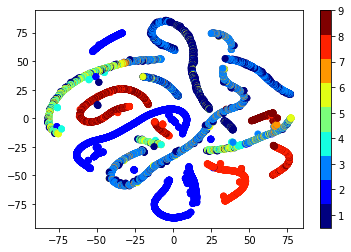

In [ ]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on asm files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(advance_features.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=y_i, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
advance_features_with_image = pd.read_csv("/content/drive/MyDrive/mmd-files/asm_image+advance.csv")

In [ ]:
advance_features_with_image

Unnamed: 0  Unnamed: 0.1                    ID   HEADER:    .text:  \
0               0             0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092   
1               1             1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230   
2               2             2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627   
3               3             3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333   
4               4             4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590   
...           ...           ...                   ...       ...       ...   
10863       10863         10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431   
10864       10864         10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167   
10865       10865         10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757   
10866       10866         10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085   
10867       10867         10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812   

       .Pav:   .idata:    .data:  .bss:   .rdata:  ...  ASM_791  ASM_792  \
0        0.0  0.000761  0.000023    0.0  0.000084  ...    109.0    111.0   
1        0.0  0.000617  0.000019    0.0  0.000000  ...     61.0     61.0   
2        0.0  0.000300  0.000017    0.0  0.000038  ...     61.0     61.0   
3        0.0  0.000258  0.000008    0.0  0.000000  ...     61.0     61.0   
4        0.0  0.000353  0.000068    0.0  0.000000  ...     61.0     61.0   
...      ...       ...       ...    ...       ...  ...      ...      ...   
10863    0.0  0.001815  0.001498    0.0  0.505305  ...     56.0     54.0   
10864    0.0  0.002744  0.184147    0.0  0.000000  ...     97.0    108.0   
10865    0.0  0.002378  0.014319    0.0  0.333759  ...     56.0     54.0   
10866    0.0  0.002720  0.334671    0.0  0.010305  ...     56.0     54.0   
10867    0.0  0.002792  0.652570    0.0  0.007149  ...     56.0     54.0   

       ASM_793  ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        100.0    101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...      ...  
10863     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     32.0     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 856 columns]

In [ ]:
advance_features_with_image = advance_features_with_image.drop("Unnamed: 0",axis=1)

In [ ]:
advance_features_with_image = advance_features_with_image.drop("Unnamed: 0.1",axis=1)

<h2>  Train and test split</h2>

In [ ]:
asm_y = advance_features_with_image['Class']
asm_x = advance_features_with_image.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [ ]:
print(xgb_y.value_counts())

2    2942
1    2478
0    1541
7    1228
8    1013
5     751
3     475
6     398
4      42
Name: Class, dtype: int64


In [ ]:
print(asm_y.value_counts())

3    2942
2    2478
1    1541
8    1228
9    1013
6     751
4     475
7     398
5      42
Name: Class, dtype: int64


In [ ]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [ ]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
           ...  
ASM_796    False
ASM_797    False
ASM_798    False
ASM_799    False
ASM_800    False
Length: 849, dtype: bool


<h2>  Machine Learning models on advance features + asm_image features</h2>

<h3>  K-Nearest Neigbors </h3>

KNeighborsClassifier(n_neighbors=1)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=1))

KNeighborsClassifier(n_neighbors=3)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=3))

KNeighborsClassifier()

CalibratedClassifierCV(base_estimator=KNeighborsClassifier())

KNeighborsClassifier(n_neighbors=7)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=7))

KNeighborsClassifier(n_neighbors=9)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=9))

KNeighborsClassifier(n_neighbors=11)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=11))

KNeighborsClassifier(n_neighbors=13)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=13))

KNeighborsClassifier(n_neighbors=15)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=15))

KNeighborsClassifier(n_neighbors=17)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=17))

KNeighborsClassifier(n_neighbors=19)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=19))

log_loss for k =  1 is 0.05024474477727611
log_loss for k =  3 is 0.05651666139837421
log_loss for k =  5 is 0.06004696369372465
log_loss for k =  7 is 0.06861763297623451
log_loss for k =  9 is 0.07641810553023452
log_loss for k =  11 is 0.08216768685346439
log_loss for k =  13 is 0.08699496304502453
log_loss for k =  15 is 0.09187681427414379
log_loss for k =  17 is 0.09550724611188094
log_loss for k =  19 is 0.09982859650552563


Text(1, 0.05024474477727611, '(1, 0.05)')

Text(3, 0.05651666139837421, '(3, 0.057)')

Text(5, 0.06004696369372465, '(5, 0.06)')

Text(7, 0.06861763297623451, '(7, 0.069)')

Text(9, 0.07641810553023452, '(9, 0.076)')

Text(11, 0.08216768685346439, '(11, 0.082)')

Text(13, 0.08699496304502453, '(13, 0.087)')

Text(15, 0.09187681427414379, '(15, 0.092)')

Text(17, 0.09550724611188094, '(17, 0.096)')

Text(19, 0.09982859650552563, '(19, 0.1)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

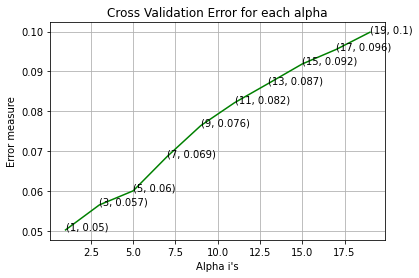

KNeighborsClassifier(n_neighbors=1)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=1))

log loss for train data 0.01559019772608553
log loss for cv data 0.05024474477727611
log loss for test data 0.03630400730998728
Number of misclassified points  0.45998160073597055
-------------------------------------------------- Confusion matrix --------------------------------------------------


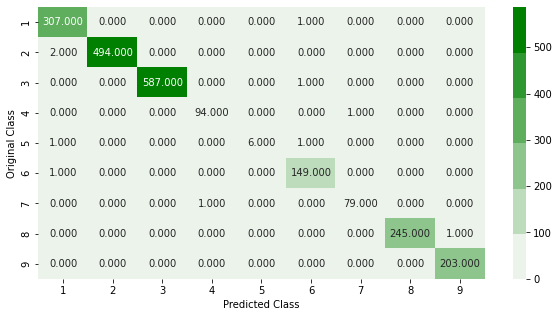

-------------------------------------------------- Precision matrix --------------------------------------------------


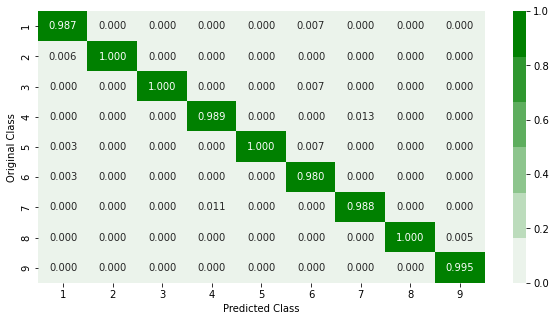

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


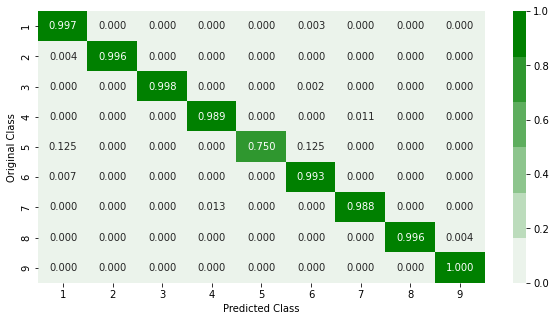

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3>  Logistic Regression </h3>

LogisticRegression(C=1e-05, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1e-05,
                                                         class_weight='balanced'))

LogisticRegression(C=0.0001, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.0001,
                                                         class_weight='balanced'))

LogisticRegression(C=0.001, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.001,
                                                         class_weight='balanced'))

LogisticRegression(C=0.01, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.01,
                                                         class_weight='balanced'))

LogisticRegression(C=0.1, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.1,
                                                         class_weight='balanced'))

LogisticRegression(C=1, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1,
                                                         class_weight='balanced'))

LogisticRegression(C=10, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=10,
                                                         class_weight='balanced'))

LogisticRegression(C=100, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=100,
                                                         class_weight='balanced'))

LogisticRegression(C=1000, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1000,
                                                         class_weight='balanced'))

log_loss for c =  1e-05 is 0.7564693321272579
log_loss for c =  0.0001 is 0.8100099615358181
log_loss for c =  0.001 is 0.726160467424954
log_loss for c =  0.01 is 0.7601466101995832
log_loss for c =  0.1 is 0.7531948438823156
log_loss for c =  1 is 0.748649728451815
log_loss for c =  10 is 0.7617517685035199
log_loss for c =  100 is 0.7489460817511993
log_loss for c =  1000 is 0.7547672720840408


Text(1e-05, 0.7564693321272579, '(1e-05, 0.756)')

Text(0.0001, 0.8100099615358181, '(0.0001, 0.81)')

Text(0.001, 0.726160467424954, '(0.001, 0.726)')

Text(0.01, 0.7601466101995832, '(0.01, 0.76)')

Text(0.1, 0.7531948438823156, '(0.1, 0.753)')

Text(1, 0.748649728451815, '(1, 0.749)')

Text(10, 0.7617517685035199, '(10, 0.762)')

Text(100, 0.7489460817511993, '(100, 0.749)')

Text(1000, 0.7547672720840408, '(1000, 0.755)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

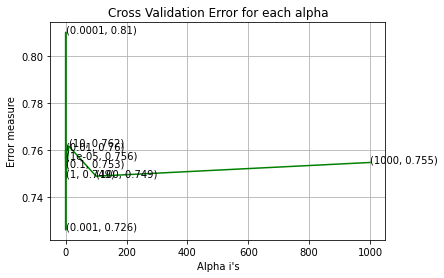

LogisticRegression(C=0.001, class_weight='balanced')

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.001,
                                                         class_weight='balanced'))

log loss for train data 0.7253242526672125
log loss for cv data 0.726160467424954
log loss for test data 0.7196432016616762
Number of misclassified points  32.474701011959525
-------------------------------------------------- Confusion matrix --------------------------------------------------


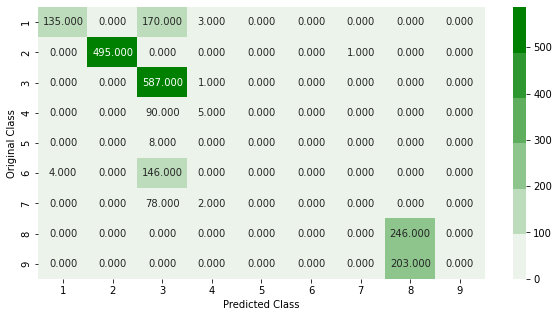

-------------------------------------------------- Precision matrix --------------------------------------------------


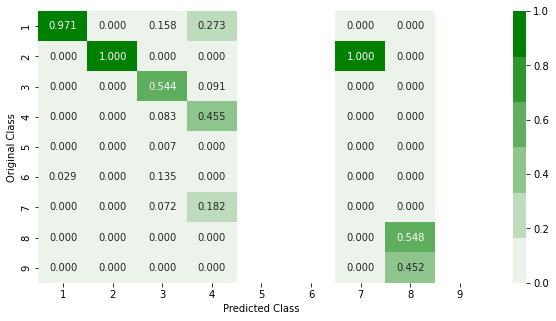

Sum of columns in precision matrix [ 1.  1.  1.  1. nan nan  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


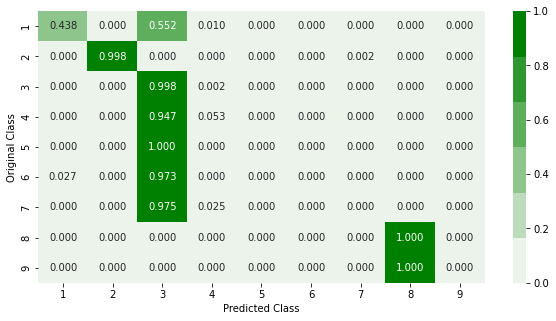

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> Random Forest Classifier</h3>

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=10,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=50,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=500,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=2000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=3000,
                                                             n_jobs=-1,
                                                             random_state=42))

log_loss for c =  10 is 0.03145507873563012
log_loss for c =  50 is 0.028834913473110034
log_loss for c =  100 is 0.02802289693946405
log_loss for c =  500 is 0.028167772575697213
log_loss for c =  1000 is 0.028308291815836894
log_loss for c =  2000 is 0.02845795469521529
log_loss for c =  3000 is 0.0286556862716798


Text(10, 0.03145507873563012, '(10, 0.031)')

Text(50, 0.028834913473110034, '(50, 0.029)')

Text(100, 0.02802289693946405, '(100, 0.028)')

Text(500, 0.028167772575697213, '(500, 0.028)')

Text(1000, 0.028308291815836894, '(1000, 0.028)')

Text(2000, 0.02845795469521529, '(2000, 0.028)')

Text(3000, 0.0286556862716798, '(3000, 0.029)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

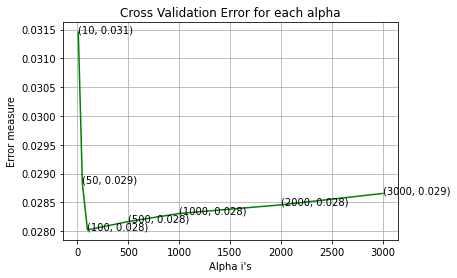

RandomForestClassifier(n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_jobs=-1,
                                                             random_state=42))

log loss for train data 0.01143858166983782
log loss for cv data 0.02802289693946405
log loss for test data 0.02606417454550536
Number of misclassified points  0.5059797608095675
-------------------------------------------------- Confusion matrix --------------------------------------------------


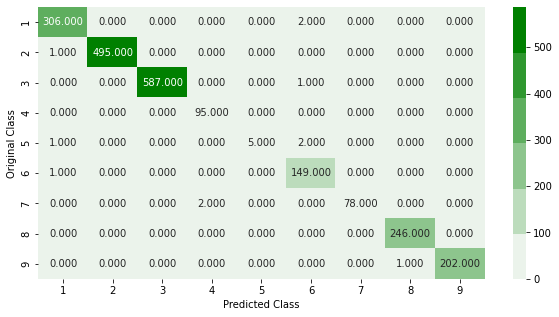

-------------------------------------------------- Precision matrix --------------------------------------------------


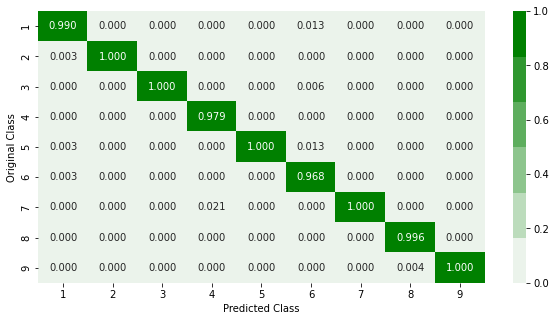

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


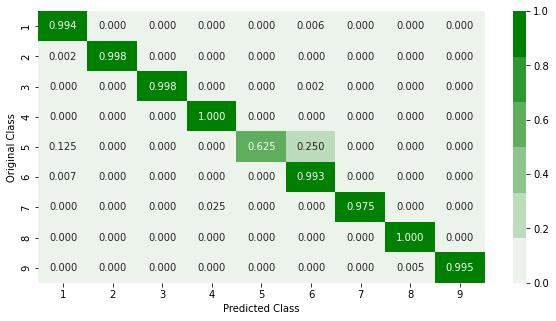

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> XgBoost Classifier</h3>

In [ ]:
pip uninstall xgboost

Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/xgboost-0.90.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xgboost/*
    /usr/local/xgboost/libxgboost.so
Proceed (y/n)? y
  Successfully uninstalled xgboost-0.90


In [ ]:
pip install xgboost 

     |████████████████████████████████| 192.9 MB 73 kB/s 


In [ ]:
xgb_x = advance_features_with_image.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)


In [ ]:
xgb_y = asm_y-1

In [ ]:
print(xgb_y.value_counts())

2    2942
1    2478
0    1541
7    1228
8    1013
5     751
3     475
6     398
4      42
Name: Class, dtype: int64


In [ ]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(xgb_x,xgb_y ,stratify=xgb_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=3000,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

log_loss for c =  10 is 0.033739246056759466
log_loss for c =  50 is 0.025366898289379033
log_loss for c =  100 is 0.02486458726080771
log_loss for c =  500 is 0.023389610304908607
log_loss for c =  1000 is 0.02337261829055661
log_loss for c =  2000 is 0.023358277366159256
log_loss for c =  3000 is 0.023350273214994686


Text(10, 0.033739246056759466, '(10, 0.034)')

Text(50, 0.025366898289379033, '(50, 0.025)')

Text(100, 0.02486458726080771, '(100, 0.025)')

Text(500, 0.023389610304908607, '(500, 0.023)')

Text(1000, 0.02337261829055661, '(1000, 0.023)')

Text(2000, 0.023358277366159256, '(2000, 0.023)')

Text(3000, 0.023350273214994686, '(3000, 0.023)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

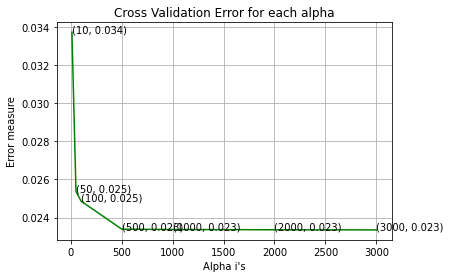

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=3000,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

For values of best alpha =  3000 The train log loss is: 0.01047146325891769
For values of best alpha =  3000 The cross validation log loss is: 0.023350273214994686
For values of best alpha =  3000 The test log loss is: 0.01797012706380642
Number of misclassified points  0.3219871205151794
-------------------------------------------------- Confusion matrix --------------------------------------------------


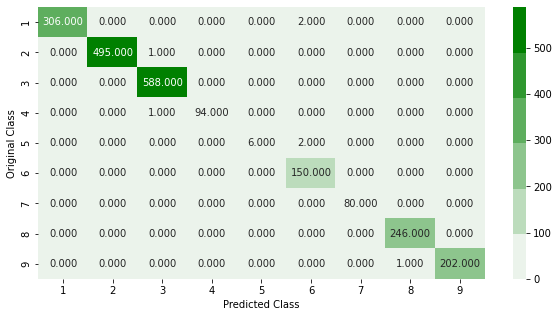

-------------------------------------------------- Precision matrix --------------------------------------------------


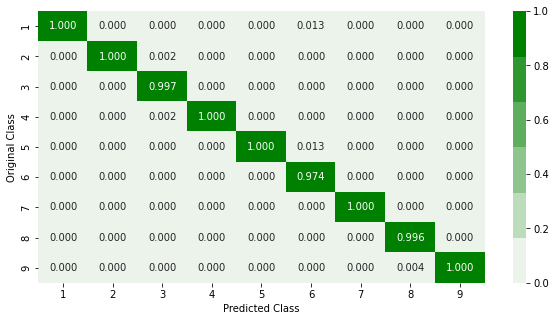

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


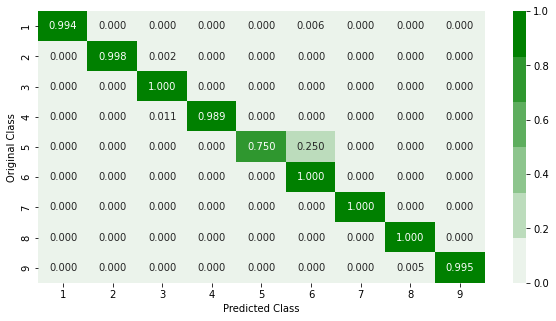

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> Xgboost Classifier with best hyperparameters</h3>

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           monotone_constraints=None,
                                           n

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.1}


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,subsample=1,learning_rate=0.2,colsample_bytree=0.1,max_depth=5)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                            

train loss 0.009257139911649219
cv loss 0.021653764951580695
test loss 0.020414568849659073


#Conclusion of ASM Features : 

#ASM features are most imporatant ones as the test log loss is reduced to 0.02 using xgboost

#Combining   Unigram Byte features +  asm pixel intensity features(800) +  asm advance features

In [ ]:
advance_features_with_image = pd.read_csv("/content/drive/MyDrive/mmd-files/asm_image+advance.csv")

In [ ]:
advance_features_with_image

Unnamed: 0  Unnamed: 0.1                    ID   HEADER:    .text:  \
0               0             0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092   
1               1             1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230   
2               2             2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627   
3               3             3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333   
4               4             4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590   
...           ...           ...                   ...       ...       ...   
10863       10863         10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431   
10864       10864         10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167   
10865       10865         10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757   
10866       10866         10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085   
10867       10867         10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812   

       .Pav:   .idata:    .data:  .bss:   .rdata:  ...  ASM_791  ASM_792  \
0        0.0  0.000761  0.000023    0.0  0.000084  ...    109.0    111.0   
1        0.0  0.000617  0.000019    0.0  0.000000  ...     61.0     61.0   
2        0.0  0.000300  0.000017    0.0  0.000038  ...     61.0     61.0   
3        0.0  0.000258  0.000008    0.0  0.000000  ...     61.0     61.0   
4        0.0  0.000353  0.000068    0.0  0.000000  ...     61.0     61.0   
...      ...       ...       ...    ...       ...  ...      ...      ...   
10863    0.0  0.001815  0.001498    0.0  0.505305  ...     56.0     54.0   
10864    0.0  0.002744  0.184147    0.0  0.000000  ...     97.0    108.0   
10865    0.0  0.002378  0.014319    0.0  0.333759  ...     56.0     54.0   
10866    0.0  0.002720  0.334671    0.0  0.010305  ...     56.0     54.0   
10867    0.0  0.002792  0.652570    0.0  0.007149  ...     56.0     54.0   

       ASM_793  ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        100.0    101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...      ...  
10863     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     32.0     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 856 columns]

In [ ]:
Byte_unigram_features = pd.read_csv("/content/drive/MyDrive/mmd-files/result_with_size.csv")

In [ ]:
Byte_unigram_features

Unnamed: 0                    ID       0     1     2     3     4     5  \
0               0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242   
1               1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844   
2               2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330   
3               3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   
4               4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   
...           ...                   ...     ...   ...   ...   ...   ...   ...   
10863       10863  loIP1tiwELF9YNZQjSUO    5268  1177  1072  1222  1238  1159   
10864       10864  LOP6HaJKXpkic5dyuVnT    3032   298   248   293   274   213   
10865       10865  LOqA6FX02GWguYrI1Zbe    5671   221   270   323   313   155   
10866       10866  LoWgaidpb2IUM5ACcSGO    3637   437   453   506   511   390   
10867       10867  lS0IVqXeJrN6Dzi9Pap1    3534   373   385   432   495   399   

          6     7  ...    f9    fa    fb    fc    fd     fe     ff      ??  \
0      3650  3201  ...  3101  3211  3097  2758  3099   2759   5753    1824   
1      8420  7589  ...   439   281   302  7639   518  17001  54902    8588   
2      9007  2342  ...  2242  2885  2863  2471  2786   2680  49144     468   
3       550   523  ...   485   462   516  1133   471    761   7998   13940   
4       262   249  ...   350   209   239   653   221    242   2199    9008   
...     ...   ...  ...   ...   ...   ...   ...   ...    ...    ...     ...   
10863  1143  1126  ...  1094  1154  1088  1113  1114   1107   1178  347816   
10864   203   222  ...   202   202   215   208   195    196    336   14368   
10865   248   147  ...   159   247   163   249   149    226    231   11396   
10866   431   407  ...   377   376   352   543   361    330    440   85540   
10867   393   373  ...   376   328   338   479   337    350    392   78872   

           size  Class  
0      4.234863      9  
1      5.538818      2  
2      3.887939      9  
3      0.574219      1  
4      0.370850      8  
...         ...    ...  
10863  1.878174      4  
10864  0.215332      4  
10865  0.215332      4  
10866  0.550293      4  
10867  0.502441      4  

[10868 rows x 261 columns]

In [ ]:
Byte_unigram_features = Byte_unigram_features.drop("Unnamed: 0",axis=1)

In [ ]:
Byte_unigram_features.rename(columns = {'size':'size_bytes'}, inplace = True)

In [ ]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

Byte_unigram_features = normalize(Byte_unigram_features)


In [ ]:
Byte_unigram_features

ID         0         1         2         3         4  \
0      01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1      01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2      01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3      01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4      01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   
...                     ...       ...       ...       ...       ...       ...   
10863  loIP1tiwELF9YNZQjSUO  0.002300  0.001657  0.000596  0.000659  0.000758   
10864  LOP6HaJKXpkic5dyuVnT  0.001324  0.000420  0.000138  0.000158  0.000168   
10865  LOqA6FX02GWguYrI1Zbe  0.002476  0.000311  0.000150  0.000174  0.000192   
10866  LoWgaidpb2IUM5ACcSGO  0.001588  0.000615  0.000252  0.000273  0.000313   
10867  lS0IVqXeJrN6Dzi9Pap1  0.001543  0.000525  0.000214  0.000233  0.000303   

              5         6         7         8  ...        f9        fa  \
0      0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107   
1      0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147   
2      0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777   
3      0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886   
4      0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853   
...         ...       ...       ...       ...  ...       ...       ...   
10863  0.000656  0.000644  0.001036  0.001022  ...  0.004784  0.004711   
10864  0.000121  0.000114  0.000204  0.000229  ...  0.000883  0.000825   
10865  0.000088  0.000140  0.000135  0.000232  ...  0.000695  0.001008   
10866  0.000221  0.000243  0.000375  0.000360  ...  0.001649  0.001535   
10867  0.000226  0.000222  0.000343  0.000355  ...  0.001644  0.001339   

             fb        fc        fd        fe        ff        ??  size_bytes  \
0      0.013634  0.031724  0.014549  0.014348  0.007843  0.000129    0.092219   
1      0.001329  0.087867  0.002432  0.088411  0.074851  0.000606    0.121236   
2      0.012604  0.028423  0.013080  0.013937  0.067001  0.000033    0.084499   
3      0.002272  0.013032  0.002211  0.003957  0.010904  0.000984    0.010759   
4      0.001052  0.007511  0.001038  0.001258  0.002998  0.000636    0.006233   
...         ...       ...       ...       ...       ...       ...         ...   
10863  0.004790  0.012802  0.005230  0.005757  0.001606  0.024554    0.039776   
10864  0.000946  0.002393  0.000915  0.001019  0.000458  0.001014    0.002772   
10865  0.000718  0.002864  0.000700  0.001175  0.000315  0.000804    0.002772   
10866  0.001550  0.006246  0.001695  0.001716  0.000600  0.006039    0.010226   
10867  0.001488  0.005510  0.001582  0.001820  0.000534  0.005568    0.009162   

       Class  
0          9  
1          2  
2          9  
3          1  
4          8  
...      ...  
10863      4  
10864      4  
10865      4  
10866      4  
10867      4  

[10868 rows x 260 columns]

In [ ]:
advance_features_with_image

ID   HEADER:    .text:  .Pav:   .idata:    .data:  \
0      01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023   
1      1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019   
2      3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017   
3      3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008   
4      46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068   
...                     ...       ...       ...    ...       ...       ...   
10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431    0.0  0.001815  0.001498   
10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167    0.0  0.002744  0.184147   
10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757    0.0  0.002378  0.014319   
10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085    0.0  0.002720  0.334671   
10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812    0.0  0.002792  0.652570   

       .bss:   .rdata:  .edata:    .rsrc:  ...  ASM_791  ASM_792  ASM_793  \
0        0.0  0.000084      0.0  0.000072  ...    109.0    111.0    100.0   
1        0.0  0.000000      0.0  0.000072  ...     61.0     61.0     61.0   
2        0.0  0.000038      0.0  0.000072  ...     61.0     61.0     61.0   
3        0.0  0.000000      0.0  0.000072  ...     61.0     61.0     61.0   
4        0.0  0.000000      0.0  0.000072  ...     61.0     61.0     61.0   
...      ...       ...      ...       ...  ...      ...      ...      ...   
10863    0.0  0.505305      0.0  0.000000  ...     56.0     54.0     32.0   
10864    0.0  0.000000      0.0  0.000000  ...     97.0    108.0     32.0   
10865    0.0  0.333759      0.0  0.000000  ...     56.0     54.0     32.0   
10866    0.0  0.010305      0.0  0.000000  ...     56.0     54.0     32.0   
10867    0.0  0.007149      0.0  0.000000  ...     56.0     54.0     32.0   

       ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...  
10863     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 854 columns]

In [ ]:
advance_features_with_image.drop('Class', axis=1, inplace=True)

In [ ]:
all_features_combined= pd.merge(Byte_unigram_features,advance_features_with_image,on="ID",how="left")
all_features_combined

ID         0         1         2         3         4  \
0      01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1      01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2      01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3      01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4      01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   
...                     ...       ...       ...       ...       ...       ...   
10863  loIP1tiwELF9YNZQjSUO  0.002300  0.001657  0.000596  0.000659  0.000758   
10864  LOP6HaJKXpkic5dyuVnT  0.001324  0.000420  0.000138  0.000158  0.000168   
10865  LOqA6FX02GWguYrI1Zbe  0.002476  0.000311  0.000150  0.000174  0.000192   
10866  LoWgaidpb2IUM5ACcSGO  0.001588  0.000615  0.000252  0.000273  0.000313   
10867  lS0IVqXeJrN6Dzi9Pap1  0.001543  0.000525  0.000214  0.000233  0.000303   

              5         6         7         8  ...  ASM_791  ASM_792  ASM_793  \
0      0.001835  0.002058  0.002946  0.002638  ...     61.0     61.0     61.0   
1      0.003873  0.004747  0.006984  0.008267  ...     56.0     54.0     32.0   
2      0.005280  0.005078  0.002155  0.008104  ...     61.0     61.0     61.0   
3      0.000354  0.000310  0.000481  0.000959  ...    109.0    111.0    100.0   
4      0.000232  0.000148  0.000229  0.000376  ...     61.0     61.0     61.0   
...         ...       ...       ...       ...  ...      ...      ...      ...   
10863  0.000656  0.000644  0.001036  0.001022  ...     61.0     61.0     61.0   
10864  0.000121  0.000114  0.000204  0.000229  ...     61.0     61.0     61.0   
10865  0.000088  0.000140  0.000135  0.000232  ...     61.0     61.0     61.0   
10866  0.000221  0.000243  0.000375  0.000360  ...     61.0     61.0     61.0   
10867  0.000226  0.000222  0.000343  0.000355  ...     61.0     61.0     61.0   

       ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
1         40.0     80.0     69.0     41.0     13.0     10.0     46.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3        101.0    108.0     32.0    102.0    108.0     97.0    116.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...  
10863     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
10864     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
10865     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
10866     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
10867     61.0     61.0     61.0     61.0     61.0     61.0     61.0  

[10868 rows x 1112 columns]

In [ ]:
y_i_combined = all_features_combined['Class']

In [ ]:
all_features_combined.drop('Class', axis=1, inplace=True)

#Multivariate analysis

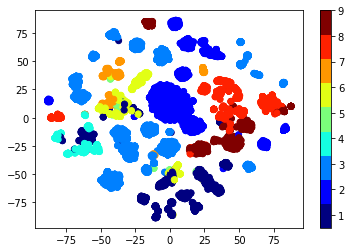

In [ ]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(all_features_combined.drop(['ID'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_i_combined, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
asm_y = y_i_combined 
asm_x = all_features_combined.drop(['ID','.BSS:','rtn','.CODE'], axis=1)

In [ ]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

<h3> Random Forest Classifier</h3>

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=10,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=50,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=500,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=2000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=3000,
                                                             n_jobs=-1,
                                                             random_state=42))

log_loss for c =  10 is 0.02541990810753491
log_loss for c =  50 is 0.022221350962755616
log_loss for c =  100 is 0.021159465223927074
log_loss for c =  500 is 0.022334305792622692
log_loss for c =  1000 is 0.022193205813839448
log_loss for c =  2000 is 0.022208761375252496
log_loss for c =  3000 is 0.022303727154065946


Text(10, 0.02541990810753491, '(10, 0.025)')

Text(50, 0.022221350962755616, '(50, 0.022)')

Text(100, 0.021159465223927074, '(100, 0.021)')

Text(500, 0.022334305792622692, '(500, 0.022)')

Text(1000, 0.022193205813839448, '(1000, 0.022)')

Text(2000, 0.022208761375252496, '(2000, 0.022)')

Text(3000, 0.022303727154065946, '(3000, 0.022)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

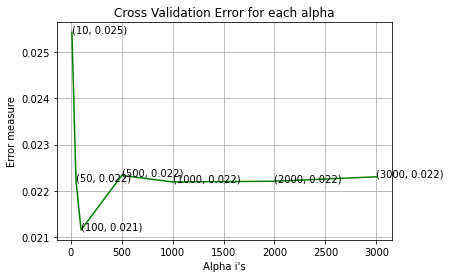

RandomForestClassifier(n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_jobs=-1,
                                                             random_state=42))

log loss for train data 0.011088031506683327
log loss for cv data 0.021159465223927074
log loss for test data 0.022167946383637078
Number of misclassified points  0.22999080036798528
-------------------------------------------------- Confusion matrix --------------------------------------------------


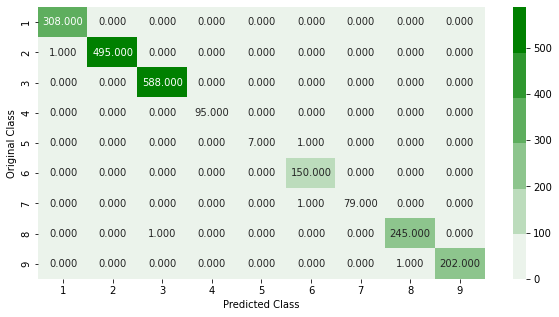

-------------------------------------------------- Precision matrix --------------------------------------------------


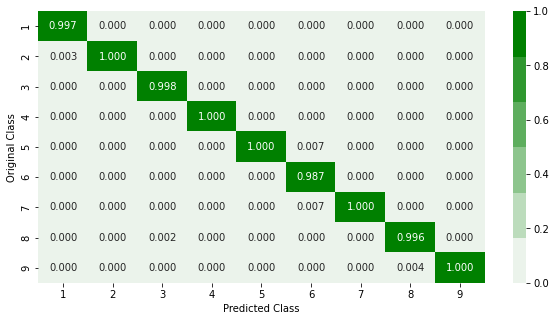

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


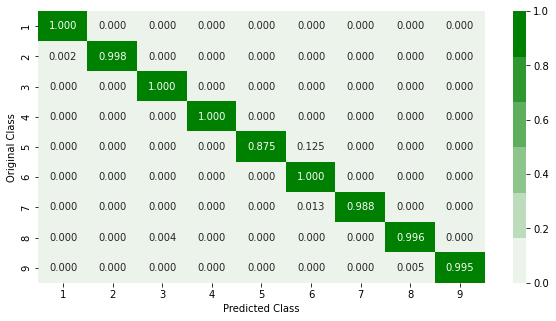

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

#Xgboost

In [ ]:
xgb_x = all_features_combined.drop(['ID','.BSS:','rtn','.CODE'], axis=1)

xgb_y = asm_y-1




0        8
1        1
2        8
3        0
4        7
        ..
10863    3
10864    3
10865    3
10866    3
10867    3
Name: Class, Length: 10868, dtype: int64

In [ ]:
print(xgb_y.value_counts())

2    2942
1    2478
0    1541
7    1228
8    1013
5     751
3     475
6     398
4      42
Name: Class, dtype: int64


In [ ]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(xgb_x,xgb_y ,stratify=xgb_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           monotone_constraints=None,
                                           n

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.1}


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,subsample=0.5,learning_rate=0.1,colsample_bytree=0.1,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                            

train loss 0.010048449441884655
cv loss 0.026056312078601252
test loss 0.022233112826870138


<h1>Unigram + Bigram (2000 features) + asm image + asm advance features

In [ ]:
advance_features_with_image = pd.read_csv("/content/drive/MyDrive/mmd-files/asm_image+advance.csv")
advance_features_with_image

In [ ]:
advance_features_with_image

Unnamed: 0  Unnamed: 0.1                    ID   HEADER:    .text:  \
0               0             0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092   
1               1             1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230   
2               2             2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627   
3               3             3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333   
4               4             4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590   
...           ...           ...                   ...       ...       ...   
10863       10863         10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431   
10864       10864         10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167   
10865       10865         10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757   
10866       10866         10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085   
10867       10867         10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812   

       .Pav:   .idata:    .data:  .bss:   .rdata:  ...  ASM_791  ASM_792  \
0        0.0  0.000761  0.000023    0.0  0.000084  ...    109.0    111.0   
1        0.0  0.000617  0.000019    0.0  0.000000  ...     61.0     61.0   
2        0.0  0.000300  0.000017    0.0  0.000038  ...     61.0     61.0   
3        0.0  0.000258  0.000008    0.0  0.000000  ...     61.0     61.0   
4        0.0  0.000353  0.000068    0.0  0.000000  ...     61.0     61.0   
...      ...       ...       ...    ...       ...  ...      ...      ...   
10863    0.0  0.001815  0.001498    0.0  0.505305  ...     56.0     54.0   
10864    0.0  0.002744  0.184147    0.0  0.000000  ...     97.0    108.0   
10865    0.0  0.002378  0.014319    0.0  0.333759  ...     56.0     54.0   
10866    0.0  0.002720  0.334671    0.0  0.010305  ...     56.0     54.0   
10867    0.0  0.002792  0.652570    0.0  0.007149  ...     56.0     54.0   

       ASM_793  ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        100.0    101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...      ...  
10863     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     32.0     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 856 columns]

In [ ]:
advance_features_with_image = advance_features_with_image.drop("Unnamed: 0",axis=1)
advance_features_with_image = advance_features_with_image.drop("Unnamed: 0.1",axis=1)
advance_features_with_image


ID   HEADER:    .text:  .Pav:   .idata:    .data:  \
0      01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023   
1      1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019   
2      3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017   
3      3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008   
4      46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068   
...                     ...       ...       ...    ...       ...       ...   
10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431    0.0  0.001815  0.001498   
10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167    0.0  0.002744  0.184147   
10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757    0.0  0.002378  0.014319   
10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085    0.0  0.002720  0.334671   
10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812    0.0  0.002792  0.652570   

       .bss:   .rdata:  .edata:    .rsrc:  ...  ASM_791  ASM_792  ASM_793  \
0        0.0  0.000084      0.0  0.000072  ...    109.0    111.0    100.0   
1        0.0  0.000000      0.0  0.000072  ...     61.0     61.0     61.0   
2        0.0  0.000038      0.0  0.000072  ...     61.0     61.0     61.0   
3        0.0  0.000000      0.0  0.000072  ...     61.0     61.0     61.0   
4        0.0  0.000000      0.0  0.000072  ...     61.0     61.0     61.0   
...      ...       ...      ...       ...  ...      ...      ...      ...   
10863    0.0  0.505305      0.0  0.000000  ...     56.0     54.0     32.0   
10864    0.0  0.000000      0.0  0.000000  ...     97.0    108.0     32.0   
10865    0.0  0.333759      0.0  0.000000  ...     56.0     54.0     32.0   
10866    0.0  0.010305      0.0  0.000000  ...     56.0     54.0     32.0   
10867    0.0  0.007149      0.0  0.000000  ...     56.0     54.0     32.0   

       ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...  
10863     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 854 columns]

In [ ]:
Byte_unigram_features = pd.read_csv("/content/drive/MyDrive/mmd-files/result_with_size.csv")
Byte_unigram_features

Unnamed: 0                    ID       0     1     2     3     4     5  \
0               0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242   
1               1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844   
2               2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330   
3               3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   
4               4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   
...           ...                   ...     ...   ...   ...   ...   ...   ...   
10863       10863  loIP1tiwELF9YNZQjSUO    5268  1177  1072  1222  1238  1159   
10864       10864  LOP6HaJKXpkic5dyuVnT    3032   298   248   293   274   213   
10865       10865  LOqA6FX02GWguYrI1Zbe    5671   221   270   323   313   155   
10866       10866  LoWgaidpb2IUM5ACcSGO    3637   437   453   506   511   390   
10867       10867  lS0IVqXeJrN6Dzi9Pap1    3534   373   385   432   495   399   

          6     7  ...    f9    fa    fb    fc    fd     fe     ff      ??  \
0      3650  3201  ...  3101  3211  3097  2758  3099   2759   5753    1824   
1      8420  7589  ...   439   281   302  7639   518  17001  54902    8588   
2      9007  2342  ...  2242  2885  2863  2471  2786   2680  49144     468   
3       550   523  ...   485   462   516  1133   471    761   7998   13940   
4       262   249  ...   350   209   239   653   221    242   2199    9008   
...     ...   ...  ...   ...   ...   ...   ...   ...    ...    ...     ...   
10863  1143  1126  ...  1094  1154  1088  1113  1114   1107   1178  347816   
10864   203   222  ...   202   202   215   208   195    196    336   14368   
10865   248   147  ...   159   247   163   249   149    226    231   11396   
10866   431   407  ...   377   376   352   543   361    330    440   85540   
10867   393   373  ...   376   328   338   479   337    350    392   78872   

           size  Class  
0      4.234863      9  
1      5.538818      2  
2      3.887939      9  
3      0.574219      1  
4      0.370850      8  
...         ...    ...  
10863  1.878174      4  
10864  0.215332      4  
10865  0.215332      4  
10866  0.550293      4  
10867  0.502441      4  

[10868 rows x 261 columns]

In [ ]:
Byte_unigram_features = Byte_unigram_features.drop("Unnamed: 0",axis=1)

In [ ]:
Byte_unigram_features.rename(columns = {'size':'size_bytes'}, inplace = True)

In [ ]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

Byte_unigram_features = normalize(Byte_unigram_features)

In [ ]:
Byte_unigram_features

ID         0         1         2         3         4  \
0      01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1      01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2      01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3      01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4      01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   
...                     ...       ...       ...       ...       ...       ...   
10863  loIP1tiwELF9YNZQjSUO  0.002300  0.001657  0.000596  0.000659  0.000758   
10864  LOP6HaJKXpkic5dyuVnT  0.001324  0.000420  0.000138  0.000158  0.000168   
10865  LOqA6FX02GWguYrI1Zbe  0.002476  0.000311  0.000150  0.000174  0.000192   
10866  LoWgaidpb2IUM5ACcSGO  0.001588  0.000615  0.000252  0.000273  0.000313   
10867  lS0IVqXeJrN6Dzi9Pap1  0.001543  0.000525  0.000214  0.000233  0.000303   

              5         6         7         8  ...        f9        fa  \
0      0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107   
1      0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147   
2      0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777   
3      0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886   
4      0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853   
...         ...       ...       ...       ...  ...       ...       ...   
10863  0.000656  0.000644  0.001036  0.001022  ...  0.004784  0.004711   
10864  0.000121  0.000114  0.000204  0.000229  ...  0.000883  0.000825   
10865  0.000088  0.000140  0.000135  0.000232  ...  0.000695  0.001008   
10866  0.000221  0.000243  0.000375  0.000360  ...  0.001649  0.001535   
10867  0.000226  0.000222  0.000343  0.000355  ...  0.001644  0.001339   

             fb        fc        fd        fe        ff        ??  size_bytes  \
0      0.013634  0.031724  0.014549  0.014348  0.007843  0.000129    0.092219   
1      0.001329  0.087867  0.002432  0.088411  0.074851  0.000606    0.121236   
2      0.012604  0.028423  0.013080  0.013937  0.067001  0.000033    0.084499   
3      0.002272  0.013032  0.002211  0.003957  0.010904  0.000984    0.010759   
4      0.001052  0.007511  0.001038  0.001258  0.002998  0.000636    0.006233   
...         ...       ...       ...       ...       ...       ...         ...   
10863  0.004790  0.012802  0.005230  0.005757  0.001606  0.024554    0.039776   
10864  0.000946  0.002393  0.000915  0.001019  0.000458  0.001014    0.002772   
10865  0.000718  0.002864  0.000700  0.001175  0.000315  0.000804    0.002772   
10866  0.001550  0.006246  0.001695  0.001716  0.000600  0.006039    0.010226   
10867  0.001488  0.005510  0.001582  0.001820  0.000534  0.005568    0.009162   

       Class  
0          9  
1          2  
2          9  
3          1  
4          8  
...      ...  
10863      4  
10864      4  
10865      4  
10866      4  
10867      4  

[10868 rows x 260 columns]

In [ ]:
advance_features_with_image.drop('Class', axis=1, inplace=True)

In [ ]:
all_features_combined= pd.merge(Byte_unigram_features,advance_features_with_image,on="ID",how="left")
all_features_combined

ID         0         1         2         3         4  \
0      01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1      01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2      01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3      01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4      01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   
...                     ...       ...       ...       ...       ...       ...   
10863  loIP1tiwELF9YNZQjSUO  0.002300  0.001657  0.000596  0.000659  0.000758   
10864  LOP6HaJKXpkic5dyuVnT  0.001324  0.000420  0.000138  0.000158  0.000168   
10865  LOqA6FX02GWguYrI1Zbe  0.002476  0.000311  0.000150  0.000174  0.000192   
10866  LoWgaidpb2IUM5ACcSGO  0.001588  0.000615  0.000252  0.000273  0.000313   
10867  lS0IVqXeJrN6Dzi9Pap1  0.001543  0.000525  0.000214  0.000233  0.000303   

              5         6         7         8  ...  ASM_791  ASM_792  ASM_793  \
0      0.001835  0.002058  0.002946  0.002638  ...     61.0     61.0     61.0   
1      0.003873  0.004747  0.006984  0.008267  ...     56.0     54.0     32.0   
2      0.005280  0.005078  0.002155  0.008104  ...     61.0     61.0     61.0   
3      0.000354  0.000310  0.000481  0.000959  ...    109.0    111.0    100.0   
4      0.000232  0.000148  0.000229  0.000376  ...     61.0     61.0     61.0   
...         ...       ...       ...       ...  ...      ...      ...      ...   
10863  0.000656  0.000644  0.001036  0.001022  ...     61.0     61.0     61.0   
10864  0.000121  0.000114  0.000204  0.000229  ...     61.0     61.0     61.0   
10865  0.000088  0.000140  0.000135  0.000232  ...     61.0     61.0     61.0   
10866  0.000221  0.000243  0.000375  0.000360  ...     61.0     61.0     61.0   
10867  0.000226  0.000222  0.000343  0.000355  ...     61.0     61.0     61.0   

       ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
1         40.0     80.0     69.0     41.0     13.0     10.0     46.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3        101.0    108.0     32.0    102.0    108.0     97.0    116.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...  
10863     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
10864     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
10865     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
10866     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
10867     61.0     61.0     61.0     61.0     61.0     61.0     61.0  

[10868 rows x 1112 columns]

In [ ]:
Best_Bigrams_Unigrams_df = pd.read_csv("/content/drive/MyDrive/mmd-files-new/Best_Bigrams_Unigrams_df_2000_with_size.csv")

In [ ]:
Best_Bigrams_Unigrams_df

Unnamed: 0     96 86     f5 a9     bb e2     7d c9     80 7d     5f c9  \
0               0  0.015539  0.014993  0.015830  0.006805  0.002762  0.005487   
1               1  0.026330  0.009370  0.021107  0.018713  0.002565  0.006983   
2               2  0.000432  0.000000  0.000000  0.000000  0.000000  0.000000   
3               3  0.000000  0.000000  0.000000  0.000000  0.007103  0.009477   
4               4  0.008633  0.013119  0.022162  0.009356  0.001973  0.011971   
...           ...       ...       ...       ...       ...       ...       ...   
10863       10863  0.000432  0.000937  0.002111  0.002552  0.000000  0.000998   
10864       10864  0.023741  0.020615  0.012664  0.017012  0.002762  0.006484   
10865       10865  0.000432  0.000000  0.000000  0.000000  0.007497  0.008978   
10866       10866  0.005611  0.010308  0.004221  0.006805  0.001381  0.000998   
10867       10867  0.000000  0.000000  0.000000  0.000000  0.008287  0.008978   

          c0 74     02 c1     59 e8  ...     f6 8d     f5 9e     ff be  \
0      0.000472  0.000215  0.000611  ...  0.004501  0.011473  0.002867   
1      0.000337  0.000366  0.000778  ...  0.005626  0.016254  0.002457   
2      0.000000  0.000022  0.000000  ...  0.000000  0.000000  0.000000   
3      0.007693  0.000086  0.000722  ...  0.000000  0.000000  0.000102   
4      0.000304  0.000345  0.000945  ...  0.005626  0.011473  0.003686   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000034  0.000043  0.000056  ...  0.000563  0.002868  0.000614   
10864  0.000607  0.000302  0.000834  ...  0.005626  0.009561  0.002150   
10865  0.005297  0.002369  0.000722  ...  0.000000  0.000000  0.011467   
10866  0.000304  0.000151  0.000445  ...  0.000563  0.003824  0.001433   
10867  0.006748  0.000280  0.000778  ...  0.001688  0.000000  0.000205   

          27 a4     4c 7a     ea 6c     07 46     3c 68  \
0      0.006113  0.003335  0.007100  0.000606  0.000507   
1      0.007471  0.010005  0.014200  0.000326  0.000950   
2      0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000047  0.000000   
4      0.010867  0.006670  0.017243  0.000792  0.000317   
...         ...       ...       ...       ...       ...   
10863  0.000000  0.002668  0.002029  0.000047  0.000063   
10864  0.008150  0.006670  0.019271  0.000373  0.001077   
10865  0.000000  0.000000  0.001014  0.004239  0.000000   
10866  0.008829  0.006670  0.006086  0.000186  0.000887   
10867  0.000000  0.000000  0.000000  0.000047  0.000063   

                     Byte-files      size  
0      c1X3j2Lat7Eo4I8GWFD5.txt  0.150520  
1      4m1Gsx5JvMFgATY7LOz0.txt  0.150520  
2      2xlhAE5LO8RFfczB6ep3.txt  0.093018  
3      5y4KkCXDrLHbgTwSfdqm.txt  0.006233  
4      Fznamk4GOtlcB91EK0qD.txt  0.150254  
...                         ...       ...  
10863  9N7hmb2VQnZoJBvLTWlt.txt  0.006233  
10864  Hps7JhzwjlOAkMXKP92n.txt  0.150520  
10865  dB90CQlLWSpv1myr45G8.txt  0.060807  
10866  iBwVcOQ6hltTIaZp1SFk.txt  0.034452  
10867  0XEmjdgVyY6hWfKulvCi.txt  0.028595  

[10868 rows x 2003 columns]

In [ ]:
Best_Bigrams_Unigrams_df['ID']=Best_Bigrams_Unigrams_df['Byte-files'].str.split('.').str.get(0)
Best_Bigrams_Unigrams_df

Unnamed: 0     96 86     f5 a9     bb e2     7d c9     80 7d     5f c9  \
0               0  0.015539  0.014993  0.015830  0.006805  0.002762  0.005487   
1               1  0.026330  0.009370  0.021107  0.018713  0.002565  0.006983   
2               2  0.000432  0.000000  0.000000  0.000000  0.000000  0.000000   
3               3  0.000000  0.000000  0.000000  0.000000  0.007103  0.009477   
4               4  0.008633  0.013119  0.022162  0.009356  0.001973  0.011971   
...           ...       ...       ...       ...       ...       ...       ...   
10863       10863  0.000432  0.000937  0.002111  0.002552  0.000000  0.000998   
10864       10864  0.023741  0.020615  0.012664  0.017012  0.002762  0.006484   
10865       10865  0.000432  0.000000  0.000000  0.000000  0.007497  0.008978   
10866       10866  0.005611  0.010308  0.004221  0.006805  0.001381  0.000998   
10867       10867  0.000000  0.000000  0.000000  0.000000  0.008287  0.008978   

          c0 74     02 c1     59 e8  ...     f5 9e     ff be     27 a4  \
0      0.000472  0.000215  0.000611  ...  0.011473  0.002867  0.006113   
1      0.000337  0.000366  0.000778  ...  0.016254  0.002457  0.007471   
2      0.000000  0.000022  0.000000  ...  0.000000  0.000000  0.000000   
3      0.007693  0.000086  0.000722  ...  0.000000  0.000102  0.000000   
4      0.000304  0.000345  0.000945  ...  0.011473  0.003686  0.010867   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000034  0.000043  0.000056  ...  0.002868  0.000614  0.000000   
10864  0.000607  0.000302  0.000834  ...  0.009561  0.002150  0.008150   
10865  0.005297  0.002369  0.000722  ...  0.000000  0.011467  0.000000   
10866  0.000304  0.000151  0.000445  ...  0.003824  0.001433  0.008829   
10867  0.006748  0.000280  0.000778  ...  0.000000  0.000205  0.000000   

          4c 7a     ea 6c     07 46     3c 68                Byte-files  \
0      0.003335  0.007100  0.000606  0.000507  c1X3j2Lat7Eo4I8GWFD5.txt   
1      0.010005  0.014200  0.000326  0.000950  4m1Gsx5JvMFgATY7LOz0.txt   
2      0.000000  0.000000  0.000000  0.000000  2xlhAE5LO8RFfczB6ep3.txt   
3      0.000000  0.000000  0.000047  0.000000  5y4KkCXDrLHbgTwSfdqm.txt   
4      0.006670  0.017243  0.000792  0.000317  Fznamk4GOtlcB91EK0qD.txt   
...         ...       ...       ...       ...                       ...   
10863  0.002668  0.002029  0.000047  0.000063  9N7hmb2VQnZoJBvLTWlt.txt   
10864  0.006670  0.019271  0.000373  0.001077  Hps7JhzwjlOAkMXKP92n.txt   
10865  0.000000  0.001014  0.004239  0.000000  dB90CQlLWSpv1myr45G8.txt   
10866  0.006670  0.006086  0.000186  0.000887  iBwVcOQ6hltTIaZp1SFk.txt   
10867  0.000000  0.000000  0.000047  0.000063  0XEmjdgVyY6hWfKulvCi.txt   

           size                    ID  
0      0.150520  c1X3j2Lat7Eo4I8GWFD5  
1      0.150520  4m1Gsx5JvMFgATY7LOz0  
2      0.093018  2xlhAE5LO8RFfczB6ep3  
3      0.006233  5y4KkCXDrLHbgTwSfdqm  
4      0.150254  Fznamk4GOtlcB91EK0qD  
...         ...                   ...  
10863  0.006233  9N7hmb2VQnZoJBvLTWlt  
10864  0.150520  Hps7JhzwjlOAkMXKP92n  
10865  0.060807  dB90CQlLWSpv1myr45G8  
10866  0.034452  iBwVcOQ6hltTIaZp1SFk  
10867  0.028595  0XEmjdgVyY6hWfKulvCi  

[10868 rows x 2004 columns]

In [ ]:
Best_Bigrams_Unigrams_df = Best_Bigrams_Unigrams_df.drop("Unnamed: 0",axis=1)

In [ ]:
Best_Bigrams_Unigrams_df = Best_Bigrams_Unigrams_df.drop("Byte-files",axis=1)
Best_Bigrams_Unigrams_df

96 86     f5 a9     bb e2     7d c9     80 7d     5f c9     c0 74  \
0      0.015539  0.014993  0.015830  0.006805  0.002762  0.005487  0.000472   
1      0.026330  0.009370  0.021107  0.018713  0.002565  0.006983  0.000337   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.007103  0.009477  0.007693   
4      0.008633  0.013119  0.022162  0.009356  0.001973  0.011971  0.000304   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.000937  0.002111  0.002552  0.000000  0.000998  0.000034   
10864  0.023741  0.020615  0.012664  0.017012  0.002762  0.006484  0.000607   
10865  0.000432  0.000000  0.000000  0.000000  0.007497  0.008978  0.005297   
10866  0.005611  0.010308  0.004221  0.006805  0.001381  0.000998  0.000304   
10867  0.000000  0.000000  0.000000  0.000000  0.008287  0.008978  0.006748   

          02 c1     59 e8     5a 52  ...     f6 8d     f5 9e     ff be  \
0      0.000215  0.000611  0.001804  ...  0.004501  0.011473  0.002867   
1      0.000366  0.000778  0.001412  ...  0.005626  0.016254  0.002457   
2      0.000022  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000086  0.000722  0.000000  ...  0.000000  0.000000  0.000102   
4      0.000345  0.000945  0.002118  ...  0.005626  0.011473  0.003686   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000043  0.000056  0.000078  ...  0.000563  0.002868  0.000614   
10864  0.000302  0.000834  0.001020  ...  0.005626  0.009561  0.002150   
10865  0.002369  0.000722  0.000078  ...  0.000000  0.000000  0.011467   
10866  0.000151  0.000445  0.000314  ...  0.000563  0.003824  0.001433   
10867  0.000280  0.000778  0.000000  ...  0.001688  0.000000  0.000205   

          27 a4     4c 7a     ea 6c     07 46     3c 68      size  \
0      0.006113  0.003335  0.007100  0.000606  0.000507  0.150520   
1      0.007471  0.010005  0.014200  0.000326  0.000950  0.150520   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.093018   
3      0.000000  0.000000  0.000000  0.000047  0.000000  0.006233   
4      0.010867  0.006670  0.017243  0.000792  0.000317  0.150254   
...         ...       ...       ...       ...       ...       ...   
10863  0.000000  0.002668  0.002029  0.000047  0.000063  0.006233   
10864  0.008150  0.006670  0.019271  0.000373  0.001077  0.150520   
10865  0.000000  0.000000  0.001014  0.004239  0.000000  0.060807   
10866  0.008829  0.006670  0.006086  0.000186  0.000887  0.034452   
10867  0.000000  0.000000  0.000000  0.000047  0.000063  0.028595   

                         ID  
0      c1X3j2Lat7Eo4I8GWFD5  
1      4m1Gsx5JvMFgATY7LOz0  
2      2xlhAE5LO8RFfczB6ep3  
3      5y4KkCXDrLHbgTwSfdqm  
4      Fznamk4GOtlcB91EK0qD  
...                     ...  
10863  9N7hmb2VQnZoJBvLTWlt  
10864  Hps7JhzwjlOAkMXKP92n  
10865  dB90CQlLWSpv1myr45G8  
10866  iBwVcOQ6hltTIaZp1SFk  
10867  0XEmjdgVyY6hWfKulvCi  

[10868 rows x 2002 columns]

In [ ]:
id_best=Best_Bigrams_Unigrams_df['ID']

In [ ]:
#new_Best_Bigrams_Unigrams_df= Best_Bigrams_Unigrams_df.iloc[: , :3500]
#new_Best_Bigrams_Unigrams_df


0f 7f     2a 2c     f5 a9     ba ee     ee a4     8f 9a     25 9a  \
0      0.000655  0.000000  0.000000  0.001028  0.000000  0.010674  0.000000   
1      0.000000  0.000365  0.000937  0.002056  0.000997  0.001423  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000371   
3      0.000409  0.007661  0.011245  0.013366  0.016944  0.014232  0.005563   
4      0.000000  0.000730  0.003748  0.003085  0.000997  0.002135  0.000742   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000818  0.001094  0.001874  0.002056  0.000000  0.001423  0.000371   
10864  0.000573  0.006931  0.012182  0.013366  0.009967  0.009963  0.005563   
10865  0.000205  0.001824  0.003748  0.006169  0.004984  0.002135  0.002225   
10866  0.001064  0.009485  0.018741  0.030845  0.027908  0.032735  0.002967   
10867  0.000000  0.000730  0.000000  0.000000  0.000000  0.002135  0.000742   

          52 36     8a 06     41 44  ...     26 71     50 10     15 5b  \
0      0.012637  0.000385  0.000076  ...  0.000000  0.000174  0.000000   
1      0.000743  0.000000  0.036787  ...  0.000000  0.000348  0.000021   
2      0.000000  0.000000  0.000302  ...  0.000000  0.000070  0.000000   
3      0.006690  0.000178  0.000831  ...  0.000193  0.000627  0.000310   
4      0.002973  0.000059  0.000302  ...  0.000043  0.000174  0.000103   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000000  0.000444  0.002342  ...  0.000011  0.000105  0.000021   
10864  0.014124  0.000133  0.000982  ...  0.000150  0.000558  0.000351   
10865  0.004460  0.000104  0.001058  ...  0.000032  0.000035  0.000144   
10866  0.017841  0.000474  0.001964  ...  0.000278  0.000767  0.000784   
10867  0.002230  0.000030  0.000076  ...  0.000011  0.000000  0.000021   

          7d 09     6a 74     ff 2e     9a 86     5a 22     c7 44     59 4a  
0      0.000000  0.000158  0.003609  0.000000  0.000000  0.000742  0.000084  
1      0.000264  0.000053  0.000000  0.002154  0.000065  0.000124  0.000042  
2      0.000000  0.000000  0.000000  0.001077  0.000000  0.000041  0.000042  
3      0.000880  0.000684  0.001152  0.011845  0.000916  0.000412  0.000627  
4      0.000264  0.000105  0.005376  0.003230  0.000131  0.000124  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
10863  0.000088  0.000000  0.000154  0.002154  0.000131  0.000082  0.000167  
10864  0.000792  0.000526  0.001536  0.018305  0.000720  0.000536  0.000460  
10865  0.000616  0.000684  0.000077  0.006461  0.000262  0.000247  0.000125  
10866  0.002111  0.001999  0.002611  0.019382  0.002094  0.000907  0.000836  
10867  0.000176  0.000053  0.000307  0.000000  0.000000  0.000041  0.000042  

[10868 rows x 3500 columns]

In [ ]:
#new_Best_Bigrams_Unigrams_df['ID']=id_best

In [ ]:
all_features_combined= pd.merge(all_features_combined,Best_Bigrams_Unigrams_df,on="ID",how="left")
all_features_combined

ID         0         1         2         3         4  \
0      01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1      01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2      01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3      01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4      01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   
...                     ...       ...       ...       ...       ...       ...   
10863  loIP1tiwELF9YNZQjSUO  0.002300  0.001657  0.000596  0.000659  0.000758   
10864  LOP6HaJKXpkic5dyuVnT  0.001324  0.000420  0.000138  0.000158  0.000168   
10865  LOqA6FX02GWguYrI1Zbe  0.002476  0.000311  0.000150  0.000174  0.000192   
10866  LoWgaidpb2IUM5ACcSGO  0.001588  0.000615  0.000252  0.000273  0.000313   
10867  lS0IVqXeJrN6Dzi9Pap1  0.001543  0.000525  0.000214  0.000233  0.000303   

              5         6         7         8  ...     56 55     f6 8d  \
0      0.001835  0.002058  0.002946  0.002638  ...  0.000441  0.005626   
1      0.003873  0.004747  0.006984  0.008267  ...  0.000000  0.000000   
2      0.005280  0.005078  0.002155  0.008104  ...  0.000637  0.010128   
3      0.000354  0.000310  0.000481  0.000959  ...  0.000588  0.004501   
4      0.000232  0.000148  0.000229  0.000376  ...  0.000049  0.000563   
...         ...       ...       ...       ...  ...       ...       ...   
10863  0.000656  0.000644  0.001036  0.001022  ...  0.000294  0.002251   
10864  0.000121  0.000114  0.000204  0.000229  ...  0.000098  0.000000   
10865  0.000088  0.000140  0.000135  0.000232  ...  0.000098  0.000563   
10866  0.000221  0.000243  0.000375  0.000360  ...  0.000098  0.000000   
10867  0.000226  0.000222  0.000343  0.000355  ...  0.000000  0.000563   

          f5 9e     ff be     27 a4     4c 7a     ea 6c     07 46     3c 68  \
0      0.004780  0.000614  0.005433  0.002001  0.002029  0.000373  0.000760   
1      0.000000  0.012695  0.000679  0.000000  0.001014  0.000047  0.000190   
2      0.004780  0.011057  0.004754  0.003335  0.008114  0.000233  0.000190   
3      0.000000  0.000819  0.002038  0.001334  0.001014  0.000093  0.000127   
4      0.000000  0.000307  0.000000  0.000000  0.000000  0.000000  0.000190   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.001912  0.000307  0.002038  0.002001  0.003043  0.000326  0.000443   
10864  0.000956  0.000102  0.000679  0.000000  0.000000  0.000000  0.000063   
10865  0.000956  0.000102  0.000000  0.000000  0.000000  0.000000  0.000253   
10866  0.000956  0.000102  0.002717  0.000000  0.000000  0.000140  0.000190   
10867  0.000956  0.000410  0.000000  0.002001  0.002029  0.000000  0.000000   

         size_y  
0      0.092219  
1      0.121236  
2      0.084499  
3      0.010759  
4      0.006233  
...         ...  
10863  0.039776  
10864  0.002772  
10865  0.002772  
10866  0.010226  
10867  0.009162  

[10868 rows x 3113 columns]

In [ ]:
y_i_combined = all_features_combined['Class']

In [ ]:
all_features_combined.drop('Class', axis=1, inplace=True)





#Multivariate Analysis

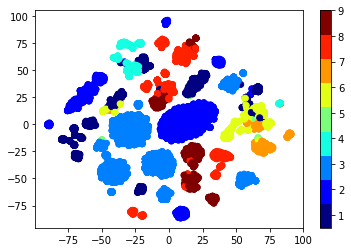

In [ ]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(all_features_combined.drop(['ID'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_i_combined, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
asm_y = y_i_combined 
asm_x = all_features_combined.drop(['ID','.BSS:','rtn','.CODE'], axis=1)

In [ ]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

#Random Forest

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=10,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=50,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=500,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=2000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=3000,
                                                             n_jobs=-1,
                                                             random_state=42))

log_loss for c =  10 is 0.018098640995451082
log_loss for c =  50 is 0.01649259381727995
log_loss for c =  100 is 0.016338831437275464
log_loss for c =  500 is 0.016237886344950648
log_loss for c =  1000 is 0.01628769765279442
log_loss for c =  2000 is 0.01621004909600443
log_loss for c =  3000 is 0.01617011430354867


Text(10, 0.018098640995451082, '(10, 0.018)')

Text(50, 0.01649259381727995, '(50, 0.016)')

Text(100, 0.016338831437275464, '(100, 0.016)')

Text(500, 0.016237886344950648, '(500, 0.016)')

Text(1000, 0.01628769765279442, '(1000, 0.016)')

Text(2000, 0.01621004909600443, '(2000, 0.016)')

Text(3000, 0.01617011430354867, '(3000, 0.016)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

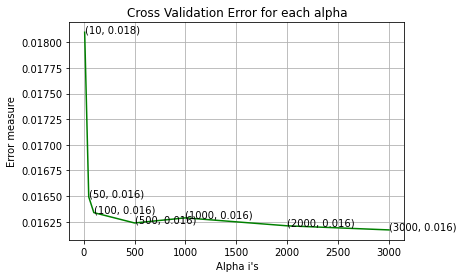

RandomForestClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=3000,
                                                             n_jobs=-1,
                                                             random_state=42))

log loss for train data 0.011375703079261069
log loss for cv data 0.01617011430354867
log loss for test data 0.021810857844198995


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))


Number of misclassified points  0.36798528058877644
-------------------------------------------------- Confusion matrix --------------------------------------------------


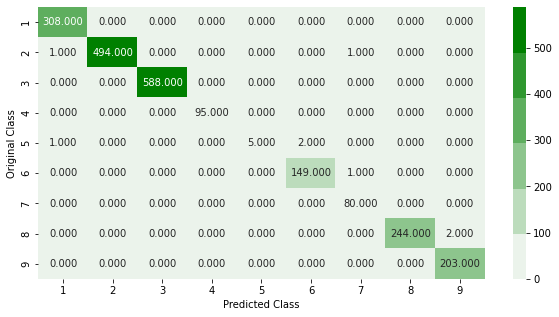

-------------------------------------------------- Precision matrix --------------------------------------------------


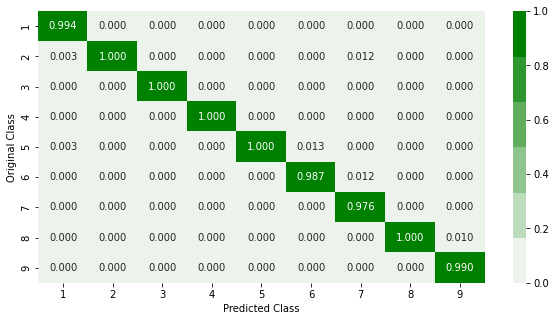

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


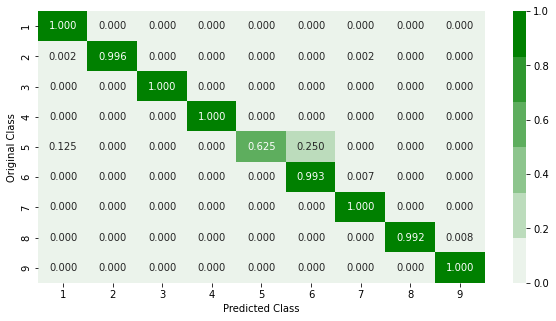

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

#Xgboost

In [ ]:
xgb_x = all_features_combined.drop(['ID','.BSS:','rtn','.CODE'], axis=1)

xgb_y = asm_y-1


In [ ]:
print(xgb_y.value_counts())

2    2942
1    2478
0    1541
7    1228
8    1013
5     751
3     475
6     398
4      42
Name: Class, dtype: int64


In [ ]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(xgb_x,xgb_y ,stratify=xgb_y,test_size=0.20)
X_train_xgb, X_cv_xgb, y_train_xgb, y_cv_xgb = train_test_split(X_train_xgb, y_train_xgb,stratify=y_train_xgb,test_size=0.20)

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_xgb,y_train_xgb)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   verbose=10)

{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.3}


In [ ]:
pip install scikit-learn==0.23.2

     |████████████████████████████████| 6.8 MB 33.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [ ]:
pip install xgboost --upgrade


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.2,colsample_bytree=0.3,max_depth=3)
x_cfl.fit(X_train_xgb,y_train_xgb)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_xgb,y_train_xgb)

predict_y = c_cfl.predict_proba(X_train_xgb)
print ('train loss',log_loss(y_train_xgb, predict_y))
predict_y = c_cfl.predict_proba(X_cv_xgb)
print ('cv loss',log_loss(y_cv_xgb, predict_y))
predict_y = c_cfl.predict_proba(X_test_xgb)
print ('test loss',log_loss(y_test_xgb, predict_y))

train loss 0.010118597492894474
cv loss 0.015841163840243727
test loss 0.023113636069321156


#Conclusion of Combination of Unigram Byte features + asm pixel intensity features(800) + asm advance features :

# By combining them we get the test log loss of 0.023 using xgboost which is more than 0.02 ( That we got only using ASM image + asm advance features)

#---------------------------------------------------------------------------------------------------------------------------------------------------------------

# Combining all features ( Unigrams + bigrams(2000) + asm image features(800)+ asm advance features (52) ) and then applying RFE on Top of it to get top 2450 Features

In [ ]:
y_i_combined 

0        9
1        2
2        9
3        1
4        8
        ..
10863    4
10864    4
10865    4
10866    4
10867    4
Name: Class, Length: 10868, dtype: int64

In [ ]:
all_features_combined

ID         0         1         2         3         4  \
0      01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1      01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2      01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3      01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4      01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   
...                     ...       ...       ...       ...       ...       ...   
10863  loIP1tiwELF9YNZQjSUO  0.002300  0.001657  0.000596  0.000659  0.000758   
10864  LOP6HaJKXpkic5dyuVnT  0.001324  0.000420  0.000138  0.000158  0.000168   
10865  LOqA6FX02GWguYrI1Zbe  0.002476  0.000311  0.000150  0.000174  0.000192   
10866  LoWgaidpb2IUM5ACcSGO  0.001588  0.000615  0.000252  0.000273  0.000313   
10867  lS0IVqXeJrN6Dzi9Pap1  0.001543  0.000525  0.000214  0.000233  0.000303   

              5         6         7         8  ...     56 55     f6 8d  \
0      0.001835  0.002058  0.002946  0.002638  ...  0.000441  0.005626   
1      0.003873  0.004747  0.006984  0.008267  ...  0.000000  0.000000   
2      0.005280  0.005078  0.002155  0.008104  ...  0.000637  0.010128   
3      0.000354  0.000310  0.000481  0.000959  ...  0.000588  0.004501   
4      0.000232  0.000148  0.000229  0.000376  ...  0.000049  0.000563   
...         ...       ...       ...       ...  ...       ...       ...   
10863  0.000656  0.000644  0.001036  0.001022  ...  0.000294  0.002251   
10864  0.000121  0.000114  0.000204  0.000229  ...  0.000098  0.000000   
10865  0.000088  0.000140  0.000135  0.000232  ...  0.000098  0.000563   
10866  0.000221  0.000243  0.000375  0.000360  ...  0.000098  0.000000   
10867  0.000226  0.000222  0.000343  0.000355  ...  0.000000  0.000563   

          f5 9e     ff be     27 a4     4c 7a     ea 6c     07 46     3c 68  \
0      0.004780  0.000614  0.005433  0.002001  0.002029  0.000373  0.000760   
1      0.000000  0.012695  0.000679  0.000000  0.001014  0.000047  0.000190   
2      0.004780  0.011057  0.004754  0.003335  0.008114  0.000233  0.000190   
3      0.000000  0.000819  0.002038  0.001334  0.001014  0.000093  0.000127   
4      0.000000  0.000307  0.000000  0.000000  0.000000  0.000000  0.000190   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.001912  0.000307  0.002038  0.002001  0.003043  0.000326  0.000443   
10864  0.000956  0.000102  0.000679  0.000000  0.000000  0.000000  0.000063   
10865  0.000956  0.000102  0.000000  0.000000  0.000000  0.000000  0.000253   
10866  0.000956  0.000102  0.002717  0.000000  0.000000  0.000140  0.000190   
10867  0.000956  0.000410  0.000000  0.002001  0.002029  0.000000  0.000000   

         size_y  
0      0.092219  
1      0.121236  
2      0.084499  
3      0.010759  
4      0.006233  
...         ...  
10863  0.039776  
10864  0.002772  
10865  0.002772  
10866  0.010226  
10867  0.009162  

[10868 rows x 3112 columns]

In [ ]:
all_features_combined_n=all_features_combined.drop(['ID'],axis=1).fillna(0)

In [ ]:
all_features_combined_n

0         1         2         3         4         5         6  \
0      0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1      0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2      0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3      0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4      0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.002300  0.001657  0.000596  0.000659  0.000758  0.000656  0.000644   
10864  0.001324  0.000420  0.000138  0.000158  0.000168  0.000121  0.000114   
10865  0.002476  0.000311  0.000150  0.000174  0.000192  0.000088  0.000140   
10866  0.001588  0.000615  0.000252  0.000273  0.000313  0.000221  0.000243   
10867  0.001543  0.000525  0.000214  0.000233  0.000303  0.000226  0.000222   

              7         8         9  ...     56 55     f6 8d     f5 9e  \
0      0.002946  0.002638  0.003531  ...  0.000441  0.005626  0.004780   
1      0.006984  0.008267  0.000394  ...  0.000000  0.000000  0.000000   
2      0.002155  0.008104  0.002707  ...  0.000637  0.010128  0.004780   
3      0.000481  0.000959  0.000521  ...  0.000588  0.004501  0.000000   
4      0.000229  0.000376  0.000246  ...  0.000049  0.000563  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.001036  0.001022  0.001257  ...  0.000294  0.002251  0.001912   
10864  0.000204  0.000229  0.000258  ...  0.000098  0.000000  0.000956   
10865  0.000135  0.000232  0.000172  ...  0.000098  0.000563  0.000956   
10866  0.000375  0.000360  0.000454  ...  0.000098  0.000000  0.000956   
10867  0.000343  0.000355  0.000376  ...  0.000000  0.000563  0.000956   

          ff be     27 a4     4c 7a     ea 6c     07 46     3c 68    size_y  
0      0.000614  0.005433  0.002001  0.002029  0.000373  0.000760  0.092219  
1      0.012695  0.000679  0.000000  0.001014  0.000047  0.000190  0.121236  
2      0.011057  0.004754  0.003335  0.008114  0.000233  0.000190  0.084499  
3      0.000819  0.002038  0.001334  0.001014  0.000093  0.000127  0.010759  
4      0.000307  0.000000  0.000000  0.000000  0.000000  0.000190  0.006233  
...         ...       ...       ...       ...       ...       ...       ...  
10863  0.000307  0.002038  0.002001  0.003043  0.000326  0.000443  0.039776  
10864  0.000102  0.000679  0.000000  0.000000  0.000000  0.000063  0.002772  
10865  0.000102  0.000000  0.000000  0.000000  0.000000  0.000253  0.002772  
10866  0.000102  0.002717  0.000000  0.000000  0.000140  0.000190  0.010226  
10867  0.000410  0.000000  0.002001  0.002029  0.000000  0.000000  0.009162  

[10868 rows x 3111 columns]

In [ ]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
selector = RFE(model, n_features_to_select=2450, step=1)
selector = selector.fit(all_features_combined_n, y_i_combined)

In [ ]:
filter = selector.support_
print(filter)

[ True  True  True ...  True  True  True]


In [ ]:
ranking = selector.ranking_

In [ ]:
ranking=list(ranking)

In [ ]:
c=0
for k in ranking:
  if k==1:
    c+=1

print(c)

2450


In [ ]:
features_to_select=all_features_combined_n.columns.tolist()

In [ ]:
print(len(ranking))
print(len(features_to_select))

3111
3111


In [ ]:
new_list=[]
for i in range(len(ranking)):
  if ranking[i]==1:
    new_list.append(features_to_select[i])


In [ ]:
data = all_features_combined_n[all_features_combined_n.columns.intersection(new_list)]
data


0         1         2         3         4         5         6  \
0      0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1      0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2      0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3      0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4      0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.002300  0.001657  0.000596  0.000659  0.000758  0.000656  0.000644   
10864  0.001324  0.000420  0.000138  0.000158  0.000168  0.000121  0.000114   
10865  0.002476  0.000311  0.000150  0.000174  0.000192  0.000088  0.000140   
10866  0.001588  0.000615  0.000252  0.000273  0.000313  0.000221  0.000243   
10867  0.001543  0.000525  0.000214  0.000233  0.000303  0.000226  0.000222   

              7         8         9  ...     56 55     f6 8d     f5 9e  \
0      0.002946  0.002638  0.003531  ...  0.000441  0.005626  0.004780   
1      0.006984  0.008267  0.000394  ...  0.000000  0.000000  0.000000   
2      0.002155  0.008104  0.002707  ...  0.000637  0.010128  0.004780   
3      0.000481  0.000959  0.000521  ...  0.000588  0.004501  0.000000   
4      0.000229  0.000376  0.000246  ...  0.000049  0.000563  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.001036  0.001022  0.001257  ...  0.000294  0.002251  0.001912   
10864  0.000204  0.000229  0.000258  ...  0.000098  0.000000  0.000956   
10865  0.000135  0.000232  0.000172  ...  0.000098  0.000563  0.000956   
10866  0.000375  0.000360  0.000454  ...  0.000098  0.000000  0.000956   
10867  0.000343  0.000355  0.000376  ...  0.000000  0.000563  0.000956   

          ff be     27 a4     4c 7a     ea 6c     07 46     3c 68    size_y  
0      0.000614  0.005433  0.002001  0.002029  0.000373  0.000760  0.092219  
1      0.012695  0.000679  0.000000  0.001014  0.000047  0.000190  0.121236  
2      0.011057  0.004754  0.003335  0.008114  0.000233  0.000190  0.084499  
3      0.000819  0.002038  0.001334  0.001014  0.000093  0.000127  0.010759  
4      0.000307  0.000000  0.000000  0.000000  0.000000  0.000190  0.006233  
...         ...       ...       ...       ...       ...       ...       ...  
10863  0.000307  0.002038  0.002001  0.003043  0.000326  0.000443  0.039776  
10864  0.000102  0.000679  0.000000  0.000000  0.000000  0.000063  0.002772  
10865  0.000102  0.000000  0.000000  0.000000  0.000000  0.000253  0.002772  
10866  0.000102  0.002717  0.000000  0.000000  0.000140  0.000190  0.010226  
10867  0.000410  0.000000  0.002001  0.002029  0.000000  0.000000  0.009162  

[10868 rows x 2450 columns]

In [ ]:
y_i_combined 

0        9
1        2
2        9
3        1
4        8
        ..
10863    4
10864    4
10865    4
10866    4
10867    4
Name: Class, Length: 10868, dtype: int64

Multivariate analysis

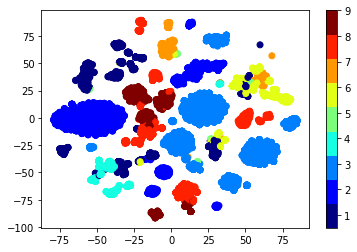

In [ ]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(data.fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_i_combined, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:
asm_y = y_i_combined 
asm_x = data

In [ ]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

#Random Forest

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=10,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=50,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=500,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=2000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=3000,
                                                             n_jobs=-1,
                                                             random_state=42))

log_loss for c =  10 is 0.025440017790276062
log_loss for c =  50 is 0.02593328787452861
log_loss for c =  100 is 0.025817634058111587
log_loss for c =  500 is 0.02599105275216519
log_loss for c =  1000 is 0.0258936233462822
log_loss for c =  2000 is 0.02586610116082732
log_loss for c =  3000 is 0.025757260572819775


Text(10, 0.025440017790276062, '(10, 0.025)')

Text(50, 0.02593328787452861, '(50, 0.026)')

Text(100, 0.025817634058111587, '(100, 0.026)')

Text(500, 0.02599105275216519, '(500, 0.026)')

Text(1000, 0.0258936233462822, '(1000, 0.026)')

Text(2000, 0.02586610116082732, '(2000, 0.026)')

Text(3000, 0.025757260572819775, '(3000, 0.026)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

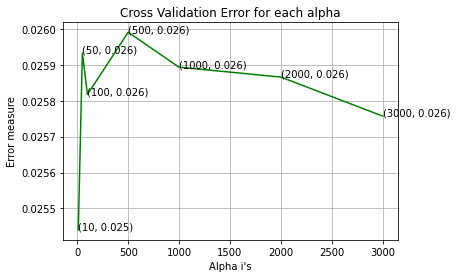

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=10,
                                                             n_jobs=-1,
                                                             random_state=42))

log loss for train data 0.012775392424583669
log loss for cv data 0.025440017790276062
log loss for test data 0.02012982596776222
Number of misclassified points  0.22999080036798528
-------------------------------------------------- Confusion matrix --------------------------------------------------


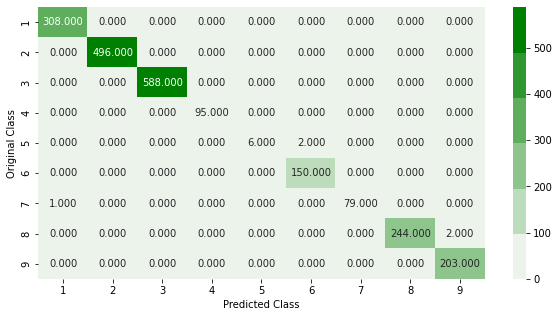

-------------------------------------------------- Precision matrix --------------------------------------------------


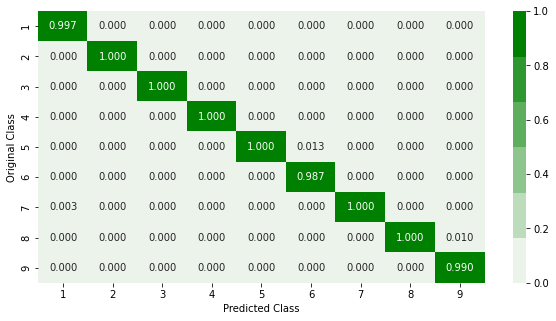

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


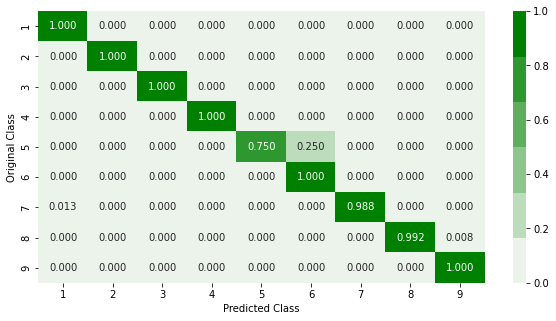

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

#XGBOOST

In [ ]:
xgb_x = data.drop(['.CODE'], axis=1)

xgb_y = asm_y-1

In [ ]:
print(xgb_y.value_counts())

2    2942
1    2478
0    1541
7    1228
8    1013
5     751
3     475
6     398
4      42
Name: Class, dtype: int64


In [ ]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(xgb_x,xgb_y ,stratify=xgb_y,test_size=0.20)
X_train_xgb, X_cv_xgb, y_train_xgb, y_cv_xgb = train_test_split(X_train_xgb, y_train_xgb,stratify=y_train_xgb,test_size=0.20)

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_xgb,y_train_xgb)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 58.0min remaining: 12.7min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 59.4min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 65.4min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           monotone_constraints=None,
                                           n

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1}


In [ ]:
import pickle as pkl
with open('yi_combined.pkl','wb') as f:          # dumping everything in a pickle file 
    pkl.dump(y_i_combined,f)

!cp yi_combined.pkl /content/drive/MyDrive/mmd-files-new # Copying it to drive

data.to_csv('data.csv')
!cp data.csv /content/drive/MyDrive/mmd-files-new # Copying it to drive


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,subsample=1,learning_rate=0.05,colsample_bytree=1,max_depth=5)
x_cfl.fit(X_train_xgb,y_train_xgb)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_xgb,y_train_xgb)

predict_y = c_cfl.predict_proba(X_train_xgb)
print ('train loss',log_loss(y_train_xgb, predict_y))
predict_y = c_cfl.predict_proba(X_cv_xgb)
print ('cv loss',log_loss(y_cv_xgb, predict_y))
predict_y = c_cfl.predict_proba(X_test_xgb)
print ('test loss',log_loss(y_test_xgb, predict_y))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

train loss 0.010191647110210384
cv loss 0.013367813221741477
test loss 0.03226249566188386


#Conclusion :By applying RFE on top of Combined (Unigrams + bigrams(2000) + asm features) doesnt worked very well as the log loss increased to 0.03 

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Applying Recursive feature Elimination to get top 500 bigram features features

In [ ]:
Best_Bigrams_Unigrams_df = pd.read_csv("/content/drive/MyDrive/mmd-files/Best_Bigrams_Unigrams_df_2000_with_size.csv")

In [ ]:
Best_Bigrams_Unigrams_df = Best_Bigrams_Unigrams_df.drop("Unnamed: 0",axis=1)

In [ ]:
Best_Bigrams_Unigrams_df

96 86     f5 a9     bb e2     7d c9     80 7d     5f c9     c0 74  \
0      0.015539  0.014993  0.015830  0.006805  0.002762  0.005487  0.000472   
1      0.026330  0.009370  0.021107  0.018713  0.002565  0.006983  0.000337   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.007103  0.009477  0.007693   
4      0.008633  0.013119  0.022162  0.009356  0.001973  0.011971  0.000304   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.000937  0.002111  0.002552  0.000000  0.000998  0.000034   
10864  0.023741  0.020615  0.012664  0.017012  0.002762  0.006484  0.000607   
10865  0.000432  0.000000  0.000000  0.000000  0.007497  0.008978  0.005297   
10866  0.005611  0.010308  0.004221  0.006805  0.001381  0.000998  0.000304   
10867  0.000000  0.000000  0.000000  0.000000  0.008287  0.008978  0.006748   

          02 c1     59 e8     5a 52  ...     f6 8d     f5 9e     ff be  \
0      0.000215  0.000611  0.001804  ...  0.004501  0.011473  0.002867   
1      0.000366  0.000778  0.001412  ...  0.005626  0.016254  0.002457   
2      0.000022  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000086  0.000722  0.000000  ...  0.000000  0.000000  0.000102   
4      0.000345  0.000945  0.002118  ...  0.005626  0.011473  0.003686   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000043  0.000056  0.000078  ...  0.000563  0.002868  0.000614   
10864  0.000302  0.000834  0.001020  ...  0.005626  0.009561  0.002150   
10865  0.002369  0.000722  0.000078  ...  0.000000  0.000000  0.011467   
10866  0.000151  0.000445  0.000314  ...  0.000563  0.003824  0.001433   
10867  0.000280  0.000778  0.000000  ...  0.001688  0.000000  0.000205   

          27 a4     4c 7a     ea 6c     07 46     3c 68  \
0      0.006113  0.003335  0.007100  0.000606  0.000507   
1      0.007471  0.010005  0.014200  0.000326  0.000950   
2      0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000047  0.000000   
4      0.010867  0.006670  0.017243  0.000792  0.000317   
...         ...       ...       ...       ...       ...   
10863  0.000000  0.002668  0.002029  0.000047  0.000063   
10864  0.008150  0.006670  0.019271  0.000373  0.001077   
10865  0.000000  0.000000  0.001014  0.004239  0.000000   
10866  0.008829  0.006670  0.006086  0.000186  0.000887   
10867  0.000000  0.000000  0.000000  0.000047  0.000063   

                     Byte-files      size  
0      c1X3j2Lat7Eo4I8GWFD5.txt  0.150520  
1      4m1Gsx5JvMFgATY7LOz0.txt  0.150520  
2      2xlhAE5LO8RFfczB6ep3.txt  0.093018  
3      5y4KkCXDrLHbgTwSfdqm.txt  0.006233  
4      Fznamk4GOtlcB91EK0qD.txt  0.150254  
...                         ...       ...  
10863  9N7hmb2VQnZoJBvLTWlt.txt  0.006233  
10864  Hps7JhzwjlOAkMXKP92n.txt  0.150520  
10865  dB90CQlLWSpv1myr45G8.txt  0.060807  
10866  iBwVcOQ6hltTIaZp1SFk.txt  0.034452  
10867  0XEmjdgVyY6hWfKulvCi.txt  0.028595  

[10868 rows x 2002 columns]

In [ ]:
Byte_files = Best_Bigrams_Unigrams_df['Byte-files']

In [ ]:
df_byte_files = pd.DataFrame(data={'Byte-files':Byte_files}) # Making a new dataframe for different operations
df_byte_files

Byte-files
0      c1X3j2Lat7Eo4I8GWFD5.txt
1      4m1Gsx5JvMFgATY7LOz0.txt
2      2xlhAE5LO8RFfczB6ep3.txt
3      5y4KkCXDrLHbgTwSfdqm.txt
4      Fznamk4GOtlcB91EK0qD.txt
...                         ...
10863  9N7hmb2VQnZoJBvLTWlt.txt
10864  Hps7JhzwjlOAkMXKP92n.txt
10865  dB90CQlLWSpv1myr45G8.txt
10866  iBwVcOQ6hltTIaZp1SFk.txt
10867  0XEmjdgVyY6hWfKulvCi.txt

[10868 rows x 1 columns]

In [ ]:
Train_labels = pd.read_csv("trainLabels.csv")
Train_labels.head()

Id  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1
3  05rJTUWYAKNegBk2wE8X      1
4  0AnoOZDNbPXIr2MRBSCJ      1

In [ ]:
Train_labels["Byte-files"] = Train_labels['Id'].astype(str)+'.txt'
Train_labels.drop('Id',axis=1,inplace=True)
Train_labels

Class                Byte-files
0          1  01kcPWA9K2BOxQeS5Rju.txt
1          1  04EjIdbPV5e1XroFOpiN.txt
2          1  05EeG39MTRrI6VY21DPd.txt
3          1  05rJTUWYAKNegBk2wE8X.txt
4          1  0AnoOZDNbPXIr2MRBSCJ.txt
...      ...                       ...
10863      9  KFrZ0Lop1WDGwUtkusCi.txt
10864      9  kg24YRJTB8DNdKMXpwOH.txt
10865      9  kG29BLiFYPgWtpb350sO.txt
10866      9  kGITL4OJxYMWEQ1bKBiP.txt
10867      9  KGorN9J6XAC4bOEkmyup.txt

[10868 rows x 2 columns]

In [ ]:
df_byte_files=pd.merge(df_byte_files,Train_labels,on="Byte-files",how="left")

In [ ]:
df_byte_files

Byte-files  Class
0      c1X3j2Lat7Eo4I8GWFD5.txt      3
1      4m1Gsx5JvMFgATY7LOz0.txt      3
2      2xlhAE5LO8RFfczB6ep3.txt      7
3      5y4KkCXDrLHbgTwSfdqm.txt      2
4      Fznamk4GOtlcB91EK0qD.txt      3
...                         ...    ...
10863  9N7hmb2VQnZoJBvLTWlt.txt      8
10864  Hps7JhzwjlOAkMXKP92n.txt      3
10865  dB90CQlLWSpv1myr45G8.txt      2
10866  iBwVcOQ6hltTIaZp1SFk.txt      6
10867  0XEmjdgVyY6hWfKulvCi.txt      2

[10868 rows x 2 columns]

In [ ]:
Best_Bigrams_Unigrams_df.drop("Byte-files",axis=1,inplace=True)


In [ ]:
Best_Bigrams_Unigrams_df

96 86     f5 a9     bb e2     7d c9     80 7d     5f c9     c0 74  \
0      0.015539  0.014993  0.015830  0.006805  0.002762  0.005487  0.000472   
1      0.026330  0.009370  0.021107  0.018713  0.002565  0.006983  0.000337   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.007103  0.009477  0.007693   
4      0.008633  0.013119  0.022162  0.009356  0.001973  0.011971  0.000304   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.000937  0.002111  0.002552  0.000000  0.000998  0.000034   
10864  0.023741  0.020615  0.012664  0.017012  0.002762  0.006484  0.000607   
10865  0.000432  0.000000  0.000000  0.000000  0.007497  0.008978  0.005297   
10866  0.005611  0.010308  0.004221  0.006805  0.001381  0.000998  0.000304   
10867  0.000000  0.000000  0.000000  0.000000  0.008287  0.008978  0.006748   

          02 c1     59 e8     5a 52  ...     56 55     f6 8d     f5 9e  \
0      0.000215  0.000611  0.001804  ...  0.001029  0.004501  0.011473   
1      0.000366  0.000778  0.001412  ...  0.001029  0.005626  0.016254   
2      0.000022  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000086  0.000722  0.000000  ...  0.000000  0.000000  0.000000   
4      0.000345  0.000945  0.002118  ...  0.000882  0.005626  0.011473   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000043  0.000056  0.000078  ...  0.000147  0.000563  0.002868   
10864  0.000302  0.000834  0.001020  ...  0.001226  0.005626  0.009561   
10865  0.002369  0.000722  0.000078  ...  0.000098  0.000000  0.000000   
10866  0.000151  0.000445  0.000314  ...  0.000392  0.000563  0.003824   
10867  0.000280  0.000778  0.000000  ...  0.000147  0.001688  0.000000   

          ff be     27 a4     4c 7a     ea 6c     07 46     3c 68      size  
0      0.002867  0.006113  0.003335  0.007100  0.000606  0.000507  0.150520  
1      0.002457  0.007471  0.010005  0.014200  0.000326  0.000950  0.150520  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.093018  
3      0.000102  0.000000  0.000000  0.000000  0.000047  0.000000  0.006233  
4      0.003686  0.010867  0.006670  0.017243  0.000792  0.000317  0.150254  
...         ...       ...       ...       ...       ...       ...       ...  
10863  0.000614  0.000000  0.002668  0.002029  0.000047  0.000063  0.006233  
10864  0.002150  0.008150  0.006670  0.019271  0.000373  0.001077  0.150520  
10865  0.011467  0.000000  0.000000  0.001014  0.004239  0.000000  0.060807  
10866  0.001433  0.008829  0.006670  0.006086  0.000186  0.000887  0.034452  
10867  0.000205  0.000000  0.000000  0.000000  0.000047  0.000063  0.028595  

[10868 rows x 2001 columns]

In [ ]:
yi_v = df_byte_files['Class']

In [ ]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
selector = RFE(model, n_features_to_select=500, step=1)
selector = selector.fit(Best_Bigrams_Unigrams_df, yi_v)

In [ ]:
ranking = selector.ranking_
ranking=list(ranking)

c=0
for k in ranking:
  if k==1:
    c+=1

print(c)



500


In [ ]:
features_to_select=Best_Bigrams_Unigrams_df.columns.tolist()

print(len(ranking))
print(len(features_to_select))


new_list=[]
for i in range(len(ranking)):
  if ranking[i]==1:
    new_list.append(features_to_select[i])

data = Best_Bigrams_Unigrams_df[Best_Bigrams_Unigrams_df.columns.intersection(new_list)]


data
import pickle as pkl
with open('yi_v.pkl','wb') as f:          # dumping everything in a pickle file 
    pkl.dump(yi_v,f)

!cp yi_v.pkl /content/drive/MyDrive/mmd-files-new # Copying it to drive

data.to_csv('data.csv')
!cp data.csv /content/drive/MyDrive/mmd-files-new # Copying it to drive



2001
2001


96 86     7d c9     5f c9     c0 74     59 e8     5a 52     97 86  \
0      0.015539  0.006805  0.005487  0.000472  0.000611  0.001804  0.014268   
1      0.026330  0.018713  0.006983  0.000337  0.000778  0.001412  0.013027   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.009477  0.007693  0.000722  0.000000  0.000000   
4      0.008633  0.009356  0.011971  0.000304  0.000945  0.002118  0.020471   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.002552  0.000998  0.000034  0.000056  0.000078  0.000000   
10864  0.023741  0.017012  0.006484  0.000607  0.000834  0.001020  0.014268   
10865  0.000432  0.000000  0.008978  0.005297  0.000722  0.000078  0.000000   
10866  0.005611  0.006805  0.000998  0.000304  0.000445  0.000314  0.004963   
10867  0.000000  0.000000  0.008978  0.006748  0.000778  0.000000  0.000000   

          86 fb     00 65     92 2f  ...     83 f8     83 ff     57 8b  \
0      0.001316  0.000180  0.006794  ...  0.000694  0.001770  0.000556   
1      0.001809  0.000226  0.013587  ...  0.000972  0.001028  0.000723   
2      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000082  0.000241  0.000000  ...  0.009234  0.001085  0.003225   
4      0.001562  0.000256  0.007548  ...  0.000833  0.001370  0.000890   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000000  0.000015  0.001510  ...  0.000278  0.001827  0.000167   
10864  0.001398  0.000241  0.009813  ...  0.000555  0.001313  0.000612   
10865  0.000082  0.000180  0.000000  ...  0.006873  0.013815  0.002391   
10866  0.000576  0.001820  0.007548  ...  0.000417  0.000343  0.000612   
10867  0.000000  0.000241  0.000000  ...  0.009928  0.000571  0.002891   

          b3 00     8b 46     00 a1     24 95     10 20     20 73      size  
0      0.000109  0.000306  0.000084  0.006383  0.000210  0.000576  0.150520  
1      0.000084  0.000306  0.000092  0.005319  0.000210  0.000384  0.150520  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.093018  
3      0.000000  0.004152  0.000306  0.010638  0.000030  0.000999  0.006233  
4      0.000151  0.000612  0.000100  0.006915  0.000450  0.000346  0.150254  
...         ...       ...       ...       ...       ...       ...       ...  
10863  0.000008  0.000044  0.000521  0.001596  0.000060  0.000077  0.006233  
10864  0.000101  0.000743  0.000122  0.004787  0.000360  0.000461  0.150520  
10865  0.006768  0.002447  0.000253  0.011170  0.002731  0.000883  0.060807  
10866  0.000109  0.000306  0.000092  0.004787  0.000300  0.000269  0.034452  
10867  0.000034  0.002316  0.000329  0.010638  0.000030  0.001728  0.028595  

[10868 rows x 500 columns]

#Multivariate analysis

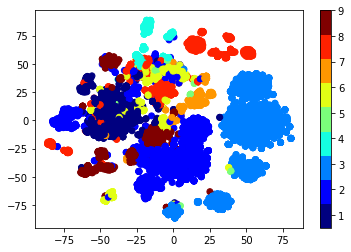

In [ ]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(data.fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=yi_v, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

#Again applying Recursive feature Elimination to get more precise features(Top 350 bigram features)

In [ ]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
selector = RFE(model, n_features_to_select=350, step=1)
selector = selector.fit(data, yi_v)

In [ ]:
ranking1 = selector.ranking_
ranking1=list(ranking1)

c=0
for k in ranking1:
  if k==1:
    c+=1

print(c)


350


In [ ]:
features_to_select_new=data.columns.tolist()

print(len(ranking1))
print(len(features_to_select_new))


new_list=[]
for i in range(len(ranking1)):
  if ranking1[i]==1:
    new_list.append(features_to_select_new[i])

data_new = data[data.columns.intersection(new_list)]

data_new

96 86     7d c9     5f c9     c0 74     59 e8     5a 52     97 86  \
0      0.015539  0.006805  0.005487  0.000472  0.000611  0.001804  0.014268   
1      0.026330  0.018713  0.006983  0.000337  0.000778  0.001412  0.013027   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.009477  0.007693  0.000722  0.000000  0.000000   
4      0.008633  0.009356  0.011971  0.000304  0.000945  0.002118  0.020471   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.002552  0.000998  0.000034  0.000056  0.000078  0.000000   
10864  0.023741  0.017012  0.006484  0.000607  0.000834  0.001020  0.014268   
10865  0.000432  0.000000  0.008978  0.005297  0.000722  0.000078  0.000000   
10866  0.005611  0.006805  0.000998  0.000304  0.000445  0.000314  0.004963   
10867  0.000000  0.000000  0.008978  0.006748  0.000778  0.000000  0.000000   

          86 fb     00 65     92 2f  ...     ff 8d     ee 00     8b 35  \
0      0.001316  0.000180  0.006794  ...  0.001381  0.000098  0.000717   
1      0.001809  0.000226  0.013587  ...  0.001240  0.000073  0.001076   
2      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000082  0.000241  0.000000  ...  0.001948  0.000098  0.001674   
4      0.001562  0.000256  0.007548  ...  0.000956  0.000155  0.000598   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000000  0.000015  0.001510  ...  0.000071  0.000024  0.000060   
10864  0.001398  0.000241  0.009813  ...  0.001204  0.000106  0.000478   
10865  0.000082  0.000180  0.000000  ...  0.004994  0.000016  0.001614   
10866  0.000576  0.001820  0.007548  ...  0.000248  0.000057  0.000359   
10867  0.000000  0.000241  0.000000  ...  0.003577  0.000041  0.002690   

          f5 67     83 f8     57 8b     b3 00     8b 46     24 95      size  
0      0.008176  0.000694  0.000556  0.000109  0.000306  0.006383  0.150520  
1      0.016352  0.000972  0.000723  0.000084  0.000306  0.005319  0.150520  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.093018  
3      0.000000  0.009234  0.003225  0.000000  0.004152  0.010638  0.006233  
4      0.010220  0.000833  0.000890  0.000151  0.000612  0.006915  0.150254  
...         ...       ...       ...       ...       ...       ...       ...  
10863  0.000000  0.000278  0.000167  0.000008  0.000044  0.001596  0.006233  
10864  0.014308  0.000555  0.000612  0.000101  0.000743  0.004787  0.150520  
10865  0.000000  0.006873  0.002391  0.006768  0.002447  0.011170  0.060807  
10866  0.005110  0.000417  0.000612  0.000109  0.000306  0.004787  0.034452  
10867  0.000000  0.009928  0.002891  0.000034  0.002316  0.010638  0.028595  

[10868 rows x 350 columns]

#Multivariate Analysis

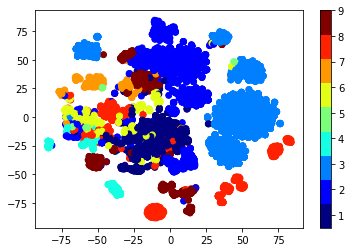

In [ ]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(data_new.fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=yi_v, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

#unigrams + bigrams (top 500) + asm image features+ asm advance features(52)

#Now combining Features

In [ ]:
data['Byte-files'] = df_byte_files['Byte-files']

#Bigram - Fetaures from Byte files

In [ ]:
data

96 86     7d c9     5f c9     c0 74     59 e8     5a 52     97 86  \
0      0.015539  0.006805  0.005487  0.000472  0.000611  0.001804  0.014268   
1      0.026330  0.018713  0.006983  0.000337  0.000778  0.001412  0.013027   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.009477  0.007693  0.000722  0.000000  0.000000   
4      0.008633  0.009356  0.011971  0.000304  0.000945  0.002118  0.020471   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.002552  0.000998  0.000034  0.000056  0.000078  0.000000   
10864  0.023741  0.017012  0.006484  0.000607  0.000834  0.001020  0.014268   
10865  0.000432  0.000000  0.008978  0.005297  0.000722  0.000078  0.000000   
10866  0.005611  0.006805  0.000998  0.000304  0.000445  0.000314  0.004963   
10867  0.000000  0.000000  0.008978  0.006748  0.000778  0.000000  0.000000   

          86 fb     00 65     92 2f  ...     83 ff     57 8b     b3 00  \
0      0.001316  0.000180  0.006794  ...  0.001770  0.000556  0.000109   
1      0.001809  0.000226  0.013587  ...  0.001028  0.000723  0.000084   
2      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000082  0.000241  0.000000  ...  0.001085  0.003225  0.000000   
4      0.001562  0.000256  0.007548  ...  0.001370  0.000890  0.000151   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000000  0.000015  0.001510  ...  0.001827  0.000167  0.000008   
10864  0.001398  0.000241  0.009813  ...  0.001313  0.000612  0.000101   
10865  0.000082  0.000180  0.000000  ...  0.013815  0.002391  0.006768   
10866  0.000576  0.001820  0.007548  ...  0.000343  0.000612  0.000109   
10867  0.000000  0.000241  0.000000  ...  0.000571  0.002891  0.000034   

          8b 46     00 a1     24 95     10 20     20 73      size  \
0      0.000306  0.000084  0.006383  0.000210  0.000576  0.150520   
1      0.000306  0.000092  0.005319  0.000210  0.000384  0.150520   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.093018   
3      0.004152  0.000306  0.010638  0.000030  0.000999  0.006233   
4      0.000612  0.000100  0.006915  0.000450  0.000346  0.150254   
...         ...       ...       ...       ...       ...       ...   
10863  0.000044  0.000521  0.001596  0.000060  0.000077  0.006233   
10864  0.000743  0.000122  0.004787  0.000360  0.000461  0.150520   
10865  0.002447  0.000253  0.011170  0.002731  0.000883  0.060807   
10866  0.000306  0.000092  0.004787  0.000300  0.000269  0.034452   
10867  0.002316  0.000329  0.010638  0.000030  0.001728  0.028595   

                     Byte-files  
0      c1X3j2Lat7Eo4I8GWFD5.txt  
1      4m1Gsx5JvMFgATY7LOz0.txt  
2      2xlhAE5LO8RFfczB6ep3.txt  
3      5y4KkCXDrLHbgTwSfdqm.txt  
4      Fznamk4GOtlcB91EK0qD.txt  
...                         ...  
10863  9N7hmb2VQnZoJBvLTWlt.txt  
10864  Hps7JhzwjlOAkMXKP92n.txt  
10865  dB90CQlLWSpv1myr45G8.txt  
10866  iBwVcOQ6hltTIaZp1SFk.txt  
10867  0XEmjdgVyY6hWfKulvCi.txt  

[10868 rows x 501 columns]

In [ ]:
data['ID']=data['Byte-files'].str.split('.').str.get(0)
data = data.drop("Byte-files",axis=1)
data

96 86     7d c9     5f c9     c0 74     59 e8     5a 52     97 86  \
0      0.015539  0.006805  0.005487  0.000472  0.000611  0.001804  0.014268   
1      0.026330  0.018713  0.006983  0.000337  0.000778  0.001412  0.013027   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.009477  0.007693  0.000722  0.000000  0.000000   
4      0.008633  0.009356  0.011971  0.000304  0.000945  0.002118  0.020471   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.002552  0.000998  0.000034  0.000056  0.000078  0.000000   
10864  0.023741  0.017012  0.006484  0.000607  0.000834  0.001020  0.014268   
10865  0.000432  0.000000  0.008978  0.005297  0.000722  0.000078  0.000000   
10866  0.005611  0.006805  0.000998  0.000304  0.000445  0.000314  0.004963   
10867  0.000000  0.000000  0.008978  0.006748  0.000778  0.000000  0.000000   

          86 fb     00 65     92 2f  ...     83 ff     57 8b     b3 00  \
0      0.001316  0.000180  0.006794  ...  0.001770  0.000556  0.000109   
1      0.001809  0.000226  0.013587  ...  0.001028  0.000723  0.000084   
2      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000082  0.000241  0.000000  ...  0.001085  0.003225  0.000000   
4      0.001562  0.000256  0.007548  ...  0.001370  0.000890  0.000151   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000000  0.000015  0.001510  ...  0.001827  0.000167  0.000008   
10864  0.001398  0.000241  0.009813  ...  0.001313  0.000612  0.000101   
10865  0.000082  0.000180  0.000000  ...  0.013815  0.002391  0.006768   
10866  0.000576  0.001820  0.007548  ...  0.000343  0.000612  0.000109   
10867  0.000000  0.000241  0.000000  ...  0.000571  0.002891  0.000034   

          8b 46     00 a1     24 95     10 20     20 73      size  \
0      0.000306  0.000084  0.006383  0.000210  0.000576  0.150520   
1      0.000306  0.000092  0.005319  0.000210  0.000384  0.150520   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.093018   
3      0.004152  0.000306  0.010638  0.000030  0.000999  0.006233   
4      0.000612  0.000100  0.006915  0.000450  0.000346  0.150254   
...         ...       ...       ...       ...       ...       ...   
10863  0.000044  0.000521  0.001596  0.000060  0.000077  0.006233   
10864  0.000743  0.000122  0.004787  0.000360  0.000461  0.150520   
10865  0.002447  0.000253  0.011170  0.002731  0.000883  0.060807   
10866  0.000306  0.000092  0.004787  0.000300  0.000269  0.034452   
10867  0.002316  0.000329  0.010638  0.000030  0.001728  0.028595   

                         ID  
0      c1X3j2Lat7Eo4I8GWFD5  
1      4m1Gsx5JvMFgATY7LOz0  
2      2xlhAE5LO8RFfczB6ep3  
3      5y4KkCXDrLHbgTwSfdqm  
4      Fznamk4GOtlcB91EK0qD  
...                     ...  
10863  9N7hmb2VQnZoJBvLTWlt  
10864  Hps7JhzwjlOAkMXKP92n  
10865  dB90CQlLWSpv1myr45G8  
10866  iBwVcOQ6hltTIaZp1SFk  
10867  0XEmjdgVyY6hWfKulvCi  

[10868 rows x 501 columns]

In [ ]:
data.rename(columns = {'size':'size_bytes_bigrams'}, inplace = True)
data

96 86     7d c9     5f c9     c0 74     59 e8     5a 52     97 86  \
0      0.015539  0.006805  0.005487  0.000472  0.000611  0.001804  0.014268   
1      0.026330  0.018713  0.006983  0.000337  0.000778  0.001412  0.013027   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.009477  0.007693  0.000722  0.000000  0.000000   
4      0.008633  0.009356  0.011971  0.000304  0.000945  0.002118  0.020471   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.002552  0.000998  0.000034  0.000056  0.000078  0.000000   
10864  0.023741  0.017012  0.006484  0.000607  0.000834  0.001020  0.014268   
10865  0.000432  0.000000  0.008978  0.005297  0.000722  0.000078  0.000000   
10866  0.005611  0.006805  0.000998  0.000304  0.000445  0.000314  0.004963   
10867  0.000000  0.000000  0.008978  0.006748  0.000778  0.000000  0.000000   

          86 fb     00 65     92 2f  ...     83 ff     57 8b     b3 00  \
0      0.001316  0.000180  0.006794  ...  0.001770  0.000556  0.000109   
1      0.001809  0.000226  0.013587  ...  0.001028  0.000723  0.000084   
2      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000082  0.000241  0.000000  ...  0.001085  0.003225  0.000000   
4      0.001562  0.000256  0.007548  ...  0.001370  0.000890  0.000151   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000000  0.000015  0.001510  ...  0.001827  0.000167  0.000008   
10864  0.001398  0.000241  0.009813  ...  0.001313  0.000612  0.000101   
10865  0.000082  0.000180  0.000000  ...  0.013815  0.002391  0.006768   
10866  0.000576  0.001820  0.007548  ...  0.000343  0.000612  0.000109   
10867  0.000000  0.000241  0.000000  ...  0.000571  0.002891  0.000034   

          8b 46     00 a1     24 95     10 20     20 73  size_bytes_bigrams  \
0      0.000306  0.000084  0.006383  0.000210  0.000576            0.150520   
1      0.000306  0.000092  0.005319  0.000210  0.000384            0.150520   
2      0.000000  0.000000  0.000000  0.000000  0.000000            0.093018   
3      0.004152  0.000306  0.010638  0.000030  0.000999            0.006233   
4      0.000612  0.000100  0.006915  0.000450  0.000346            0.150254   
...         ...       ...       ...       ...       ...                 ...   
10863  0.000044  0.000521  0.001596  0.000060  0.000077            0.006233   
10864  0.000743  0.000122  0.004787  0.000360  0.000461            0.150520   
10865  0.002447  0.000253  0.011170  0.002731  0.000883            0.060807   
10866  0.000306  0.000092  0.004787  0.000300  0.000269            0.034452   
10867  0.002316  0.000329  0.010638  0.000030  0.001728            0.028595   

                         ID  
0      c1X3j2Lat7Eo4I8GWFD5  
1      4m1Gsx5JvMFgATY7LOz0  
2      2xlhAE5LO8RFfczB6ep3  
3      5y4KkCXDrLHbgTwSfdqm  
4      Fznamk4GOtlcB91EK0qD  
...                     ...  
10863  9N7hmb2VQnZoJBvLTWlt  
10864  Hps7JhzwjlOAkMXKP92n  
10865  dB90CQlLWSpv1myr45G8  
10866  iBwVcOQ6hltTIaZp1SFk  
10867  0XEmjdgVyY6hWfKulvCi  

[10868 rows x 501 columns]

#asm image Features + asm advance features

In [ ]:
advance_features_with_image = pd.read_csv("/content/drive/MyDrive/mmd-files/asm_image+advance.csv")
advance_features_with_image

Unnamed: 0  Unnamed: 0.1                    ID   HEADER:    .text:  \
0               0             0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092   
1               1             1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230   
2               2             2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627   
3               3             3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333   
4               4             4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590   
...           ...           ...                   ...       ...       ...   
10863       10863         10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431   
10864       10864         10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167   
10865       10865         10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757   
10866       10866         10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085   
10867       10867         10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812   

       .Pav:   .idata:    .data:  .bss:   .rdata:  ...  ASM_791  ASM_792  \
0        0.0  0.000761  0.000023    0.0  0.000084  ...    109.0    111.0   
1        0.0  0.000617  0.000019    0.0  0.000000  ...     61.0     61.0   
2        0.0  0.000300  0.000017    0.0  0.000038  ...     61.0     61.0   
3        0.0  0.000258  0.000008    0.0  0.000000  ...     61.0     61.0   
4        0.0  0.000353  0.000068    0.0  0.000000  ...     61.0     61.0   
...      ...       ...       ...    ...       ...  ...      ...      ...   
10863    0.0  0.001815  0.001498    0.0  0.505305  ...     56.0     54.0   
10864    0.0  0.002744  0.184147    0.0  0.000000  ...     97.0    108.0   
10865    0.0  0.002378  0.014319    0.0  0.333759  ...     56.0     54.0   
10866    0.0  0.002720  0.334671    0.0  0.010305  ...     56.0     54.0   
10867    0.0  0.002792  0.652570    0.0  0.007149  ...     56.0     54.0   

       ASM_793  ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        100.0    101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...      ...  
10863     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     32.0     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     32.0     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 856 columns]

In [ ]:
advance_features_with_image = advance_features_with_image.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)
advance_features_with_image

ID   HEADER:    .text:  .Pav:   .idata:    .data:  \
0      01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023   
1      1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019   
2      3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017   
3      3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008   
4      46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068   
...                     ...       ...       ...    ...       ...       ...   
10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431    0.0  0.001815  0.001498   
10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167    0.0  0.002744  0.184147   
10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757    0.0  0.002378  0.014319   
10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085    0.0  0.002720  0.334671   
10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812    0.0  0.002792  0.652570   

       .bss:   .rdata:  .edata:    .rsrc:  ...  ASM_791  ASM_792  ASM_793  \
0        0.0  0.000084      0.0  0.000072  ...    109.0    111.0    100.0   
1        0.0  0.000000      0.0  0.000072  ...     61.0     61.0     61.0   
2        0.0  0.000038      0.0  0.000072  ...     61.0     61.0     61.0   
3        0.0  0.000000      0.0  0.000072  ...     61.0     61.0     61.0   
4        0.0  0.000000      0.0  0.000072  ...     61.0     61.0     61.0   
...      ...       ...      ...       ...  ...      ...      ...      ...   
10863    0.0  0.505305      0.0  0.000000  ...     56.0     54.0     32.0   
10864    0.0  0.000000      0.0  0.000000  ...     97.0    108.0     32.0   
10865    0.0  0.333759      0.0  0.000000  ...     56.0     54.0     32.0   
10866    0.0  0.010305      0.0  0.000000  ...     56.0     54.0     32.0   
10867    0.0  0.007149      0.0  0.000000  ...     56.0     54.0     32.0   

       ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...  
10863     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 854 columns]

In [ ]:
advance_features_with_image.drop(['.Pav:','.edata:'],axis=1,inplace=True)
advance_features_with_image

ID   HEADER:    .text:   .idata:    .data:  .bss:  \
0      01kcPWA9K2BOxQeS5Rju  0.107345  0.001092  0.000761  0.000023    0.0   
1      1E93CpP60RHFNiT5Qfvn  0.096045  0.001230  0.000617  0.000019    0.0   
2      3ekVow2ajZHbTnBcsDfX  0.096045  0.000627  0.000300  0.000017    0.0   
3      3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333  0.000258  0.000008    0.0   
4      46OZzdsSKDCFV8h7XWxf  0.096045  0.000590  0.000353  0.000068    0.0   
...                     ...       ...       ...       ...       ...    ...   
10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431  0.001815  0.001498    0.0   
10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167  0.002744  0.184147    0.0   
10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757  0.002378  0.014319    0.0   
10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085  0.002720  0.334671    0.0   
10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812  0.002792  0.652570    0.0   

        .rdata:    .rsrc:  .tls:  .reloc:  ...  ASM_791  ASM_792  ASM_793  \
0      0.000084  0.000072    0.0  0.00101  ...    109.0    111.0    100.0   
1      0.000000  0.000072    0.0  0.00101  ...     61.0     61.0     61.0   
2      0.000038  0.000072    0.0  0.00101  ...     61.0     61.0     61.0   
3      0.000000  0.000072    0.0  0.00101  ...     61.0     61.0     61.0   
4      0.000000  0.000072    0.0  0.00101  ...     61.0     61.0     61.0   
...         ...       ...    ...      ...  ...      ...      ...      ...   
10863  0.505305  0.000000    0.0  0.00000  ...     56.0     54.0     32.0   
10864  0.000000  0.000000    0.0  0.00000  ...     97.0    108.0     32.0   
10865  0.333759  0.000000    0.0  0.00000  ...     56.0     54.0     32.0   
10866  0.010305  0.000000    0.0  0.00000  ...     56.0     54.0     32.0   
10867  0.007149  0.000000    0.0  0.00000  ...     56.0     54.0     32.0   

       ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...  
10863     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 852 columns]

In [ ]:
advance_features_with_image.drop(['.tls:'],axis=1,inplace=True)
advance_features_with_image

ID   HEADER:    .text:   .idata:    .data:  .bss:  \
0      01kcPWA9K2BOxQeS5Rju  0.107345  0.001092  0.000761  0.000023    0.0   
1      1E93CpP60RHFNiT5Qfvn  0.096045  0.001230  0.000617  0.000019    0.0   
2      3ekVow2ajZHbTnBcsDfX  0.096045  0.000627  0.000300  0.000017    0.0   
3      3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333  0.000258  0.000008    0.0   
4      46OZzdsSKDCFV8h7XWxf  0.096045  0.000590  0.000353  0.000068    0.0   
...                     ...       ...       ...       ...       ...    ...   
10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431  0.001815  0.001498    0.0   
10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167  0.002744  0.184147    0.0   
10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757  0.002378  0.014319    0.0   
10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085  0.002720  0.334671    0.0   
10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812  0.002792  0.652570    0.0   

        .rdata:    .rsrc:  .reloc:  .BSS:  ...  ASM_791  ASM_792  ASM_793  \
0      0.000084  0.000072  0.00101    NaN  ...    109.0    111.0    100.0   
1      0.000000  0.000072  0.00101    NaN  ...     61.0     61.0     61.0   
2      0.000038  0.000072  0.00101    NaN  ...     61.0     61.0     61.0   
3      0.000000  0.000072  0.00101    NaN  ...     61.0     61.0     61.0   
4      0.000000  0.000072  0.00101    NaN  ...     61.0     61.0     61.0   
...         ...       ...      ...    ...  ...      ...      ...      ...   
10863  0.505305  0.000000  0.00000    NaN  ...     56.0     54.0     32.0   
10864  0.000000  0.000000  0.00000    NaN  ...     97.0    108.0     32.0   
10865  0.333759  0.000000  0.00000    NaN  ...     56.0     54.0     32.0   
10866  0.010305  0.000000  0.00000    NaN  ...     56.0     54.0     32.0   
10867  0.007149  0.000000  0.00000    NaN  ...     56.0     54.0     32.0   

       ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...  
10863     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 851 columns]

In [ ]:
advance_features_with_image.drop(['.bss:'],axis=1,inplace=True)
advance_features_with_image

ID   HEADER:    .text:   .idata:    .data:   .rdata:  \
0      01kcPWA9K2BOxQeS5Rju  0.107345  0.001092  0.000761  0.000023  0.000084   
1      1E93CpP60RHFNiT5Qfvn  0.096045  0.001230  0.000617  0.000019  0.000000   
2      3ekVow2ajZHbTnBcsDfX  0.096045  0.000627  0.000300  0.000017  0.000038   
3      3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333  0.000258  0.000008  0.000000   
4      46OZzdsSKDCFV8h7XWxf  0.096045  0.000590  0.000353  0.000068  0.000000   
...                     ...       ...       ...       ...       ...       ...   
10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431  0.001815  0.001498  0.505305   
10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167  0.002744  0.184147  0.000000   
10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757  0.002378  0.014319  0.333759   
10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085  0.002720  0.334671  0.010305   
10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812  0.002792  0.652570  0.007149   

         .rsrc:  .reloc:  .BSS:  .CODE  ...  ASM_791  ASM_792  ASM_793  \
0      0.000072  0.00101    NaN    NaN  ...    109.0    111.0    100.0   
1      0.000072  0.00101    NaN    NaN  ...     61.0     61.0     61.0   
2      0.000072  0.00101    NaN    NaN  ...     61.0     61.0     61.0   
3      0.000072  0.00101    NaN    NaN  ...     61.0     61.0     61.0   
4      0.000072  0.00101    NaN    NaN  ...     61.0     61.0     61.0   
...         ...      ...    ...    ...  ...      ...      ...      ...   
10863  0.000000  0.00000    NaN    NaN  ...     56.0     54.0     32.0   
10864  0.000000  0.00000    NaN    NaN  ...     97.0    108.0     32.0   
10865  0.000000  0.00000    NaN    NaN  ...     56.0     54.0     32.0   
10866  0.000000  0.00000    NaN    NaN  ...     56.0     54.0     32.0   
10867  0.000000  0.00000    NaN    NaN  ...     56.0     54.0     32.0   

       ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...  
10863     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 850 columns]

In [ ]:
advance_features_with_image.drop(['.BSS:','rtn','.CODE'],axis=1,inplace=True)
advance_features_with_image

ID   HEADER:    .text:   .idata:    .data:   .rdata:  \
0      01kcPWA9K2BOxQeS5Rju  0.107345  0.001092  0.000761  0.000023  0.000084   
1      1E93CpP60RHFNiT5Qfvn  0.096045  0.001230  0.000617  0.000019  0.000000   
2      3ekVow2ajZHbTnBcsDfX  0.096045  0.000627  0.000300  0.000017  0.000038   
3      3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333  0.000258  0.000008  0.000000   
4      46OZzdsSKDCFV8h7XWxf  0.096045  0.000590  0.000353  0.000068  0.000000   
...                     ...       ...       ...       ...       ...       ...   
10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431  0.001815  0.001498  0.505305   
10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167  0.002744  0.184147  0.000000   
10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757  0.002378  0.014319  0.333759   
10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085  0.002720  0.334671  0.010305   
10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812  0.002792  0.652570  0.007149   

         .rsrc:  .reloc:       jmp       mov  ...  ASM_791  ASM_792  ASM_793  \
0      0.000072  0.00101  0.000604  0.000597  ...    109.0    111.0    100.0   
1      0.000072  0.00101  0.000201  0.000590  ...     61.0     61.0     61.0   
2      0.000072  0.00101  0.000252  0.000490  ...     61.0     61.0     61.0   
3      0.000072  0.00101  0.000000  0.000087  ...     61.0     61.0     61.0   
4      0.000072  0.00101  0.000302  0.000127  ...     61.0     61.0     61.0   
...         ...      ...       ...       ...  ...      ...      ...      ...   
10863  0.000000  0.00000  0.002517  0.008779  ...     56.0     54.0     32.0   
10864  0.000000  0.00000  0.002366  0.006016  ...     97.0    108.0     32.0   
10865  0.000000  0.00000  0.059354  0.123880  ...     56.0     54.0     32.0   
10866  0.000000  0.00000  0.018174  0.012729  ...     56.0     54.0     32.0   
10867  0.000000  0.00000  0.002316  0.010851  ...     56.0     54.0     32.0   

       ASM_794  ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0        101.0    108.0     32.0    102.0    108.0     97.0    116.0  
1         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
3         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
4         61.0     61.0     61.0     61.0     61.0     61.0     61.0  
...        ...      ...      ...      ...      ...      ...      ...  
10863     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10864     97.0    100.0    100.0    114.0    101.0    115.0    115.0  
10865     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10866     40.0     80.0     69.0     41.0     13.0     10.0     46.0  
10867     40.0     80.0     69.0     41.0     13.0     10.0     46.0  

[10868 rows x 847 columns]

#Unigram features of Byte files

In [ ]:
Byte_unigram_features = pd.read_csv("/content/drive/MyDrive/mmd-files/result_with_size.csv")
Byte_unigram_features = Byte_unigram_features.drop("Unnamed: 0",axis=1)
Byte_unigram_features.rename(columns = {'size':'size_bytes'}, inplace = True)

# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

Byte_unigram_features = normalize(Byte_unigram_features)

In [ ]:
Byte_unigram_features

ID         0         1         2         3         4  \
0      01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1      01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2      01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3      01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4      01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   
...                     ...       ...       ...       ...       ...       ...   
10863  loIP1tiwELF9YNZQjSUO  0.002300  0.001657  0.000596  0.000659  0.000758   
10864  LOP6HaJKXpkic5dyuVnT  0.001324  0.000420  0.000138  0.000158  0.000168   
10865  LOqA6FX02GWguYrI1Zbe  0.002476  0.000311  0.000150  0.000174  0.000192   
10866  LoWgaidpb2IUM5ACcSGO  0.001588  0.000615  0.000252  0.000273  0.000313   
10867  lS0IVqXeJrN6Dzi9Pap1  0.001543  0.000525  0.000214  0.000233  0.000303   

              5         6         7         8  ...        f9        fa  \
0      0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107   
1      0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147   
2      0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777   
3      0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886   
4      0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853   
...         ...       ...       ...       ...  ...       ...       ...   
10863  0.000656  0.000644  0.001036  0.001022  ...  0.004784  0.004711   
10864  0.000121  0.000114  0.000204  0.000229  ...  0.000883  0.000825   
10865  0.000088  0.000140  0.000135  0.000232  ...  0.000695  0.001008   
10866  0.000221  0.000243  0.000375  0.000360  ...  0.001649  0.001535   
10867  0.000226  0.000222  0.000343  0.000355  ...  0.001644  0.001339   

             fb        fc        fd        fe        ff        ??  size_bytes  \
0      0.013634  0.031724  0.014549  0.014348  0.007843  0.000129    0.092219   
1      0.001329  0.087867  0.002432  0.088411  0.074851  0.000606    0.121236   
2      0.012604  0.028423  0.013080  0.013937  0.067001  0.000033    0.084499   
3      0.002272  0.013032  0.002211  0.003957  0.010904  0.000984    0.010759   
4      0.001052  0.007511  0.001038  0.001258  0.002998  0.000636    0.006233   
...         ...       ...       ...       ...       ...       ...         ...   
10863  0.004790  0.012802  0.005230  0.005757  0.001606  0.024554    0.039776   
10864  0.000946  0.002393  0.000915  0.001019  0.000458  0.001014    0.002772   
10865  0.000718  0.002864  0.000700  0.001175  0.000315  0.000804    0.002772   
10866  0.001550  0.006246  0.001695  0.001716  0.000600  0.006039    0.010226   
10867  0.001488  0.005510  0.001582  0.001820  0.000534  0.005568    0.009162   

       Class  
0          9  
1          2  
2          9  
3          1  
4          8  
...      ...  
10863      4  
10864      4  
10865      4  
10866      4  
10867      4  

[10868 rows x 260 columns]

In [ ]:
Byte_unigram_features.drop(['Class'], axis=1,inplace=True)
Byte_unigram_features

ID         0         1         2         3         4  \
0      01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1      01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2      01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3      01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4      01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   
...                     ...       ...       ...       ...       ...       ...   
10863  loIP1tiwELF9YNZQjSUO  0.002300  0.001657  0.000596  0.000659  0.000758   
10864  LOP6HaJKXpkic5dyuVnT  0.001324  0.000420  0.000138  0.000158  0.000168   
10865  LOqA6FX02GWguYrI1Zbe  0.002476  0.000311  0.000150  0.000174  0.000192   
10866  LoWgaidpb2IUM5ACcSGO  0.001588  0.000615  0.000252  0.000273  0.000313   
10867  lS0IVqXeJrN6Dzi9Pap1  0.001543  0.000525  0.000214  0.000233  0.000303   

              5         6         7         8  ...        f8        f9  \
0      0.001835  0.002058  0.002946  0.002638  ...  0.019969  0.013560   
1      0.003873  0.004747  0.006984  0.008267  ...  0.035399  0.001920   
2      0.005280  0.005078  0.002155  0.008104  ...  0.012771  0.009804   
3      0.000354  0.000310  0.000481  0.000959  ...  0.004728  0.002121   
4      0.000232  0.000148  0.000229  0.000376  ...  0.005129  0.001530   
...         ...       ...       ...       ...  ...       ...       ...   
10863  0.000656  0.000644  0.001036  0.001022  ...  0.006093  0.004784   
10864  0.000121  0.000114  0.000204  0.000229  ...  0.001148  0.000883   
10865  0.000088  0.000140  0.000135  0.000232  ...  0.001343  0.000695   
10866  0.000221  0.000243  0.000375  0.000360  ...  0.001934  0.001649   
10867  0.000226  0.000222  0.000343  0.000355  ...  0.001749  0.001644   

             fa        fb        fc        fd        fe        ff        ??  \
0      0.013107  0.013634  0.031724  0.014549  0.014348  0.007843  0.000129   
1      0.001147  0.001329  0.087867  0.002432  0.088411  0.074851  0.000606   
2      0.011777  0.012604  0.028423  0.013080  0.013937  0.067001  0.000033   
3      0.001886  0.002272  0.013032  0.002211  0.003957  0.010904  0.000984   
4      0.000853  0.001052  0.007511  0.001038  0.001258  0.002998  0.000636   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.004711  0.004790  0.012802  0.005230  0.005757  0.001606  0.024554   
10864  0.000825  0.000946  0.002393  0.000915  0.001019  0.000458  0.001014   
10865  0.001008  0.000718  0.002864  0.000700  0.001175  0.000315  0.000804   
10866  0.001535  0.001550  0.006246  0.001695  0.001716  0.000600  0.006039   
10867  0.001339  0.001488  0.005510  0.001582  0.001820  0.000534  0.005568   

       size_bytes  
0        0.092219  
1        0.121236  
2        0.084499  
3        0.010759  
4        0.006233  
...           ...  
10863    0.039776  
10864    0.002772  
10865    0.002772  
10866    0.010226  
10867    0.009162  

[10868 rows x 259 columns]

In [ ]:
asm_x = all_features_combined.drop(['ID','.BSS:','rtn','.CODE'], axis=1)

#Now Finally Combining all 3 sets of Features

In [ ]:
data = pd.merge (data,Byte_unigram_features,on='ID',how='left')
data

96 86     7d c9     5f c9     c0 74     59 e8     5a 52     97 86  \
0      0.015539  0.006805  0.005487  0.000472  0.000611  0.001804  0.014268   
1      0.026330  0.018713  0.006983  0.000337  0.000778  0.001412  0.013027   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.009477  0.007693  0.000722  0.000000  0.000000   
4      0.008633  0.009356  0.011971  0.000304  0.000945  0.002118  0.020471   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.002552  0.000998  0.000034  0.000056  0.000078  0.000000   
10864  0.023741  0.017012  0.006484  0.000607  0.000834  0.001020  0.014268   
10865  0.000432  0.000000  0.008978  0.005297  0.000722  0.000078  0.000000   
10866  0.005611  0.006805  0.000998  0.000304  0.000445  0.000314  0.004963   
10867  0.000000  0.000000  0.008978  0.006748  0.000778  0.000000  0.000000   

          86 fb     00 65     92 2f  ...        f8        f9        fa  \
0      0.001316  0.000180  0.006794  ...  0.017261  0.013722  0.012711   
1      0.001809  0.000226  0.013587  ...  0.017640  0.014224  0.013311   
2      0.000000  0.000000  0.000000  ...  0.000032  0.000022  0.000041   
3      0.000082  0.000241  0.000000  ...  0.005107  0.001049  0.000596   
4      0.001562  0.000256  0.007548  ...  0.017889  0.014150  0.012895   
...         ...       ...       ...  ...       ...       ...       ...   
10863  0.000000  0.000015  0.001510  ...  0.005010  0.001351  0.000890   
10864  0.001398  0.000241  0.009813  ...  0.017716  0.014014  0.013136   
10865  0.000082  0.000180  0.000000  ...  0.018631  0.001548  0.000686   
10866  0.000576  0.001820  0.007548  ...  0.010897  0.008614  0.008082   
10867  0.000000  0.000241  0.000000  ...  0.011471  0.011247  0.010748   

             fb        fc        fd        fe        ff        ??  size_bytes  
0      0.013823  0.037786  0.014911  0.017249  0.009293  0.105697    0.150520  
1      0.014074  0.034818  0.014873  0.017010  0.008969  0.105770    0.150520  
2      0.000018  0.000150  0.000033  0.000213  0.000477  0.102446    0.093018  
3      0.000858  0.012411  0.001460  0.003500  0.009884  0.001258    0.006233  
4      0.013929  0.036739  0.015220  0.016859  0.009654  0.105191    0.150254  
...         ...       ...       ...       ...       ...       ...         ...  
10863  0.001065  0.007063  0.001286  0.001201  0.002968  0.000711    0.006233  
10864  0.014320  0.036980  0.015202  0.016662  0.009103  0.105697    0.150520  
10865  0.000792  0.044238  0.001028  0.015554  0.064747  0.000709    0.060807  
10866  0.009165  0.021763  0.009789  0.010707  0.003617  0.001257    0.034452  
10867  0.007818  0.008305  0.002216  0.030385  0.010102  0.001264    0.028595  

[10868 rows x 759 columns]

In [ ]:
data = pd.merge (data,advance_features_with_image,on='ID',how='left')
data

96 86     7d c9     5f c9     c0 74     59 e8     5a 52     97 86  \
0      0.015539  0.006805  0.005487  0.000472  0.000611  0.001804  0.014268   
1      0.026330  0.018713  0.006983  0.000337  0.000778  0.001412  0.013027   
2      0.000432  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.009477  0.007693  0.000722  0.000000  0.000000   
4      0.008633  0.009356  0.011971  0.000304  0.000945  0.002118  0.020471   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000432  0.002552  0.000998  0.000034  0.000056  0.000078  0.000000   
10864  0.023741  0.017012  0.006484  0.000607  0.000834  0.001020  0.014268   
10865  0.000432  0.000000  0.008978  0.005297  0.000722  0.000078  0.000000   
10866  0.005611  0.006805  0.000998  0.000304  0.000445  0.000314  0.004963   
10867  0.000000  0.000000  0.008978  0.006748  0.000778  0.000000  0.000000   

          86 fb     00 65     92 2f  ...  ASM_791  ASM_792  ASM_793  ASM_794  \
0      0.001316  0.000180  0.006794  ...     61.0     61.0     61.0     61.0   
1      0.001809  0.000226  0.013587  ...     61.0     61.0     61.0     61.0   
2      0.000000  0.000000  0.000000  ...     61.0     61.0     61.0     61.0   
3      0.000082  0.000241  0.000000  ...     97.0    108.0     32.0     97.0   
4      0.001562  0.000256  0.007548  ...    109.0    111.0    100.0    101.0   
...         ...       ...       ...  ...      ...      ...      ...      ...   
10863  0.000000  0.000015  0.001510  ...     61.0     61.0     61.0     61.0   
10864  0.001398  0.000241  0.009813  ...     61.0     61.0     61.0     61.0   
10865  0.000082  0.000180  0.000000  ...     32.0     32.0     58.0     32.0   
10866  0.000576  0.001820  0.007548  ...     61.0     61.0     61.0     61.0   
10867  0.000000  0.000241  0.000000  ...     97.0    108.0     32.0     97.0   

       ASM_795  ASM_796  ASM_797  ASM_798  ASM_799  ASM_800  
0         61.0     61.0     61.0     61.0     61.0     61.0  
1         61.0     61.0     61.0     61.0     61.0     61.0  
2         61.0     61.0     61.0     61.0     61.0     61.0  
3        100.0    100.0    114.0    101.0    115.0    115.0  
4        108.0     32.0    102.0    108.0     97.0    116.0  
...        ...      ...      ...      ...      ...      ...  
10863     61.0     61.0     61.0     61.0     61.0     61.0  
10864     61.0     61.0     61.0     61.0     61.0     61.0  
10865     80.0    111.0    114.0    116.0     97.0     98.0  
10866     61.0     61.0     61.0     61.0     61.0     61.0  
10867    100.0    100.0    114.0    101.0    115.0    115.0  

[10868 rows x 1605 columns]

In [ ]:
yi_v

0        3
1        3
2        7
3        2
4        3
        ..
10863    8
10864    3
10865    2
10866    6
10867    2
Name: Class, Length: 10868, dtype: int64

#Multivarirate Analysis

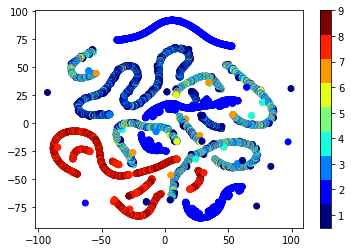

In [ ]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=40)
results=xtsne.fit_transform(data.drop(['ID'],axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=yi_v, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [ ]:

import pickle as pkl
with open('yi_v.pkl','wb') as f:          # dumping everything in a pickle file 
    pkl.dump(yi_v,f)

!cp yi_v.pkl /content/drive/MyDrive/mmd-files-new # Copying it to drive

data.to_csv('data.csv')
!cp data.csv /content/drive/MyDrive/mmd-files-new # Copying it to drive

#Now Splitting the data into train and test

In [ ]:
asm_y = yi_v 
asm_x = data.drop(['ID'],axis=1)

X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

#Random Forest

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=10,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=50,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=500,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=2000,
                                                             n_jobs=-1,
                                                             random_state=42))

RandomForestClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=3000,
                                                             n_jobs=-1,
                                                             random_state=42))

log_loss for c =  10 is 0.0195627020231789
log_loss for c =  50 is 0.015291331543719729
log_loss for c =  100 is 0.015084697110824889
log_loss for c =  500 is 0.015696225666002116
log_loss for c =  1000 is 0.015439792874424652
log_loss for c =  2000 is 0.0153584424864761
log_loss for c =  3000 is 0.015328933135265062


Text(10, 0.0195627020231789, '(10, 0.02)')

Text(50, 0.015291331543719729, '(50, 0.015)')

Text(100, 0.015084697110824889, '(100, 0.015)')

Text(500, 0.015696225666002116, '(500, 0.016)')

Text(1000, 0.015439792874424652, '(1000, 0.015)')

Text(2000, 0.0153584424864761, '(2000, 0.015)')

Text(3000, 0.015328933135265062, '(3000, 0.015)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

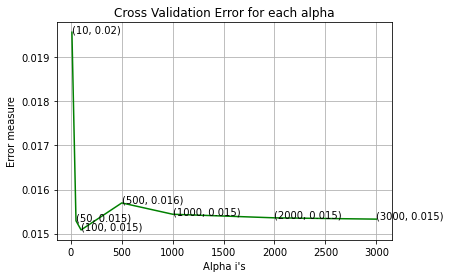

RandomForestClassifier(n_jobs=-1, random_state=42)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_jobs=-1,
                                                             random_state=42))

log loss for train data 0.00991523504079128
log loss for cv data 0.015084697110824889
log loss for test data 0.014238429616485849
Number of misclassified points  0.18399264029438822
-------------------------------------------------- Confusion matrix --------------------------------------------------


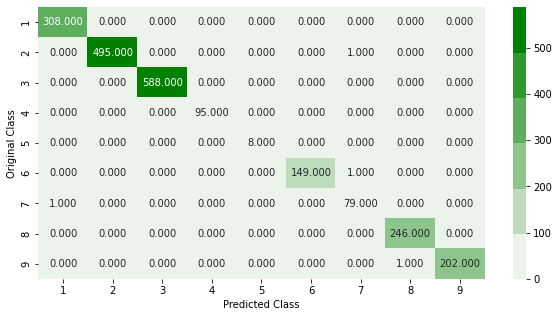

-------------------------------------------------- Precision matrix --------------------------------------------------


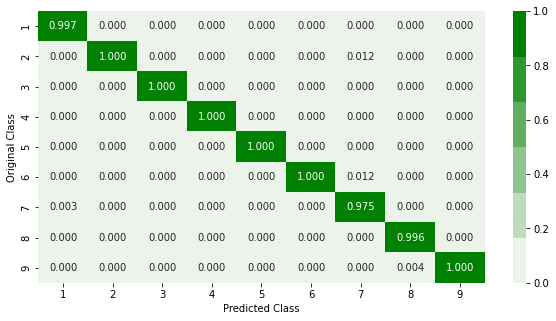

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


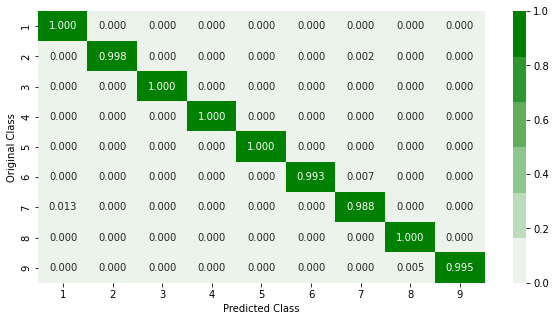

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

In [ ]:
pip uninstall xgboost


Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/xgboost-0.90.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xgboost/*
    /usr/local/xgboost/libxgboost.so
Proceed (y/n)? y
  Successfully uninstalled xgboost-0.90


In [ ]:
pip install xgboost

     |████████████████████████████████| 192.9 MB 72 kB/s 


In [ ]:
pip install scikit-learn==0.23.2

     |████████████████████████████████| 6.8 MB 23.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


#XGBoost

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/mmd-files-new/data.csv")


In [ ]:
import pickle as pkl
f = open('/content/drive/MyDrive/mmd-files-new/yi_v.pkl', 'rb')
yi_v = pkl.load(f)

In [ ]:
xgb_x = data.drop(['ID'],axis=1)
xgb_y = asm_y-1


X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(xgb_x,xgb_y ,stratify=xgb_y,test_size=0.20)
X_train_xgb, X_cv_xgb, y_train_xgb, y_cv_xgb = train_test_split(X_train_xgb, y_train_xgb,stratify=y_train_xgb,test_size=0.20)

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_xgb,y_train_xgb)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   verbose=10)

{'subsample': 1, 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.03, 'colsample_bytree': 1}


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000,subsample=1,learning_rate=0.03,colsample_bytree=1,max_depth=5)
x_cfl.fit(X_train_xgb,y_train_xgb)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_xgb,y_train_xgb)

predict_y = c_cfl.predict_proba(X_train_xgb)
print ('train loss',log_loss(y_train_xgb, predict_y))
predict_y = c_cfl.predict_proba(X_cv_xgb)
print ('cv loss',log_loss(y_cv_xgb, predict_y))
predict_y = c_cfl.predict_proba(X_test_xgb)
print ('test loss',log_loss(y_test_xgb, predict_y))
#plot_confusion_matrix(y_test_xgb,sig_clf.predict(X_test_xgb))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

train loss 0.007361381715639254
cv loss 0.011386674997553522
test loss 0.010654842500485739


NameError: ignored

Number of misclassified points  0.045998160073597055
-------------------------------------------------- Confusion matrix --------------------------------------------------


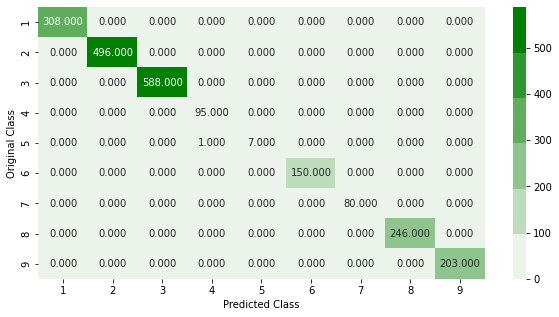

-------------------------------------------------- Precision matrix --------------------------------------------------


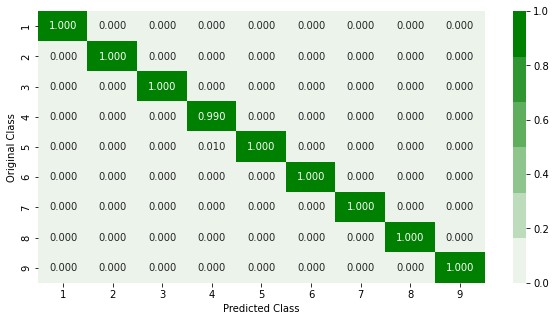

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


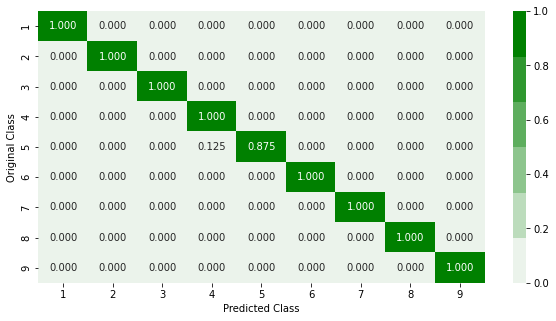

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_xgb,c_cfl.predict(X_test_xgb))

# Final Conclusion :
# At last by combining Unigrams + Bigrams (Filtered 500 Features using RFE ) + ASM image features + ASM Advance Features, we got the test log loss of 0.01 using Xgboost 

In [3]:
from prettytable import PrettyTable


print ("Data : Byte files (Byte Unigrams)")
x1 = PrettyTable()
x1.field_names = ["Model", "Best-Hyperparameter", "# Of Misclassified Points", "Test Log Loss"]
x1.add_row(["Random Model", "-", 88.5, 2.485])
x1.add_row(["KNN", 1, 4.5, 0.24 ])
x1.add_row(["Logistic Regression", 100, 12.33, 0.528])
x1.add_row(["Random-Forest-Classifier", 1000, 2.023, 0.085])
x1.add_row(["XGBoost-Classifier", 500, 1.241, 0.079 ])
print(x1)
print("\n")


print ("Data : Asm file Features(52 keywords)")
x1 = PrettyTable()
x1.field_names = ["Model", "Best-Hyperparameter", "# Of Misclassified Points", "Test Log Loss"]
x1.add_row(["KNN", 3, 2.023, 0.089 ])
x1.add_row(["Logistic Regression", 1000, 9.61, 0.415])
x1.add_row(["Random-Forest-Classifier", 3000, 1.15, 0.057])
x1.add_row(["XGBoost-Classifier", 100, 0.87, 0.048 ])
print(x1)
print("\n")


print ("Data : ASM files (ASM Image Features + ASM Advance Features(52))")
x2 = PrettyTable()
x2.field_names = ["Model", "Best-Hyperparameter", "# Of Misclassified Points", "Test Log Loss"]
x2.add_row(["KNN", 1, 45.99, 0.036 ])
x2.add_row(["Logistic Regression", 0.001, 32.47, 0.719])
x2.add_row(["Random-Forest-Classifier", 100, 50.59, 0.026])
x2.add_row(["XGBoost-Classifier", 1000, 10, 0.02 ])
print(x2)
print("\n")



print ("Data : Unigram Byte features + asm pixel intensity features(800) + asm advance features")
x3 = PrettyTable()
x3.field_names = ["Model", "Best-Hyperparameter", "# Of Misclassified Points", "Test Log Loss"]
x3.add_row(["Random-Forest-Classifier", 3000, 36.79, 0.021])
x3.add_row(["XGBoost-Classifier", 200, 37, 0.023 ])
print(x3)
print("\n")

print ("Data : ( Unigrams + bigrams(Top 2000 usig Random Forest) + asm image features(800)+ asm advance features (52) )")
print(" and then applying RFE on Top of it to get top 2450 Features")
x4 = PrettyTable()
x4.field_names = ["Model", "Best-Hyperparameter", "# Of Misclassified Points", "Test Log Loss"]
x4.add_row(["Random-Forest-Classifier", 10, 22.99, 0.02])
x4.add_row(["XGBoost-Classifier", 1000, 25, 0.03 ])
print(x4)
print("\n")

print ("Data : Unigrams + bigrams (top 500 using RFE (model:Random forest)) + asm image features+ asm advance features(52)")
x5 = PrettyTable()
x5.field_names = ["Model", "Best-Hyperparameter", "# Of Misclassified Points", "Test Log Loss"]
x5.add_row(["Random-Forest-Classifier", 100, 18.399, 0.014])
x5.add_row(["XGBoost-Classifier", 2000, 4.599, 0.010 ])
print(x5)
print("\n")



Data : Byte files (Byte Unigrams)
+--------------------------+---------------------+---------------------------+---------------+
|          Model           | Best-Hyperparameter | # Of Misclassified Points | Test Log Loss |
+--------------------------+---------------------+---------------------------+---------------+
|       Random Model       |          -          |            88.5           |     2.485     |
|           KNN            |          1          |            4.5            |      0.24     |
|   Logistic Regression    |         100         |           12.33           |     0.528     |
| Random-Forest-Classifier |         1000        |           2.023           |     0.085     |
|    XGBoost-Classifier    |         500         |           1.241           |     0.079     |
+--------------------------+---------------------+---------------------------+---------------+


Data : Asm file Features(52 keywords)
+--------------------------+---------------------+---------------------

# To overall conclude , we can say that XGBoost was the best Classifier .Including this, applying RFE(Recursive Features Elimination) was crucial in selecting top 500 Bigram Features.
#Finally ,overall test log loss was reduced to 0.01 by combining Unigram + Bigrams + ASM image features + ASM advance Features